# Black Friday Sales EDA

### Problem Statement

The Management team at ABC Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?
And Also Analyzing spending Habits with respect to marital status and age groups using Central limit theorem amd Confidence interval Concepts

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import math

In [ ]:
data = pd.read_csv("walmart_data.csv")

In [ ]:
data

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                               2               0                 1     15200  
2                               2               0                12      1422  
3                               2               0                12      1057  
4                              4+               0                 8      7969  
...                           ...             ...               ...       ...  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  

[550068 rows x 10 columns]

In [ ]:
data.shape

(550068, 10)

There are 550068 Sample Records and for each record there are 10 feature

In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

The 10 Features are
1. User_ID
2. Product_ID
3. Gender
4. Age
5. Occupation
6. City_Category
7. Stay_In_Current_City_Years
8. Marital_Status
9. Product_Category
10. Purchase

In [ ]:
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

From the above data we can say that there are total 5891 unique users.<br>
3631 Number of unique products, For gender, Age, City_Category,  Stay_In_Current_City_Years, Marital_Status we can convert it to category data type.<br>
For Occupation and Product_Category there are total 21 and 20 unique values respectively.<br>

In [ ]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no null values in the given dataset

In [ ]:
data.duplicated().sum()

0

In [ ]:
categoricalCols = ['Gender', 'Age', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category' ]
for x in categoricalCols:
    data[x] = data[x].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), int64(3), object(1)
memory usage: 19.9+ MB


In [ ]:
data.describe(include='all')

User_ID Product_ID  Gender     Age     Occupation City_Category  \
count   5.500680e+05     550068  550068  550068  550068.000000        550068   
unique           NaN       3631       2       7            NaN             3   
top              NaN  P00265242       M   26-35            NaN             B   
freq             NaN       1880  414259  219587            NaN        231173   
mean    1.003029e+06        NaN     NaN     NaN       8.076707           NaN   
std     1.727592e+03        NaN     NaN     NaN       6.522660           NaN   
min     1.000001e+06        NaN     NaN     NaN       0.000000           NaN   
25%     1.001516e+06        NaN     NaN     NaN       2.000000           NaN   
50%     1.003077e+06        NaN     NaN     NaN       7.000000           NaN   
75%     1.004478e+06        NaN     NaN     NaN      14.000000           NaN   
max     1.006040e+06        NaN     NaN     NaN      20.000000           NaN   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  \
count                      550068        550068.0          550068.0   
unique                          5             2.0              20.0   
top                             1             0.0               5.0   
freq                       193821        324731.0          150933.0   
mean                          NaN             NaN               NaN   
std                           NaN             NaN               NaN   
min                           NaN             NaN               NaN   
25%                           NaN             NaN               NaN   
50%                           NaN             NaN               NaN   
75%                           NaN             NaN               NaN   
max                           NaN             NaN               NaN   

             Purchase  
count   550068.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean      9263.968713  
std       5023.065394  
min         12.000000  
25%       5823.000000  
50%       8047.000000  
75%      12054.000000  
max      23961.000000

From the above records we can't make any comment on Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status as all these data depends on User_ID which is repeating. User_ID and Product_ID together forms Unique record.<br>

Though we can comment on Product Category and Purchase.<br>
1. There are 20 Unique Product Categories, and Category 5 is the most selling category for the given sample
2. For the given sample 9264 is average Purchase

In [ ]:
for x in data.columns:
    if data[x].dtype.name == "category":
        print(x, "-----" ,data[x].unique())


Gender ----- ['F', 'M']
Categories (2, object): ['F', 'M']
Age ----- ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
City_Category ----- ['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']
Stay_In_Current_City_Years ----- ['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+']
Marital_Status ----- [0, 1]
Categories (2, int64): [0, 1]
Product_Category ----- [3, 1, 12, 8, 5, ..., 10, 17, 9, 20, 19]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 17, 18, 19, 20]


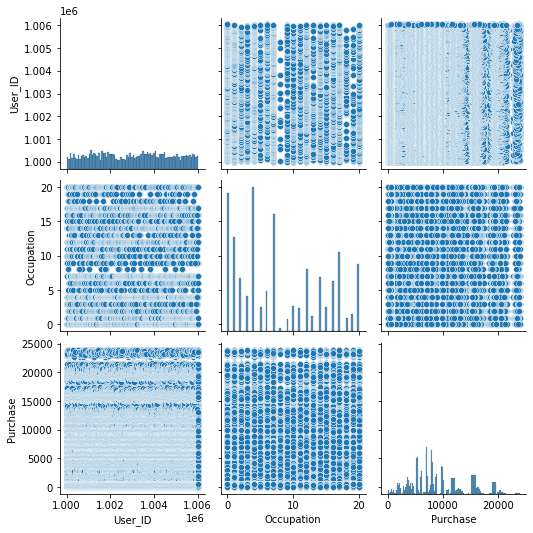

In [ ]:
sns.pairplot(data)

# Customer Analysis

### Based on Gender

In [ ]:
 data2 = data.drop_duplicates(subset = 'User_ID', keep = 'first')

In [ ]:
data2

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
5       1000003  P00193542      M  26-35          15             A   
6       1000004  P00184942      M  46-50           7             B   
9       1000005  P00274942      M  26-35          20             A   
...         ...        ...    ...    ...         ...           ...   
185450  1004588  P00260042      F  26-35           4             C   
187076  1004871  P00242742      M  18-25          12             C   
221494  1004113  P00351842      M  36-45          17             C   
229480  1005391  P00339342      M  26-35           7             A   
243533  1001529  P00000242      M  18-25           4             C   

       Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                               2              0                3      8370  
4                              4+              0                8      7969  
5                               3              0                1     15227  
6                               2              1                1     19215  
9                               1              1                8      7871  
...                           ...            ...              ...       ...  
185450                          0              0                5      8707  
187076                          2              0                1     15389  
221494                          3              0                5      5183  
229480                          0              0                1     15831  
243533                         4+              1                2      9888  

[5891 rows x 10 columns]

In [ ]:
values = data2['Gender'].value_counts()
normalized = data2['Gender'].value_counts(normalize= True).round(2)
print('\033[1m' + "Value counts for Gender:" + '\033[0m')
print(values)
print("--------------------------------------------------------------------------------------------------------------------------")
print('\033[1m' +"Normalized counts for Gender:" + '\033[0m')
print(normalized)

Value counts for Gender:
M    4225
F    1666
Name: Gender, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
Normalized counts for Gender:
M    0.72
F    0.28
Name: Gender, dtype: float64


### Based on Age Group

In [ ]:
data2['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [ ]:
data2['Age'].describe()

count      5891
unique        7
top       26-35
freq       2053
Name: Age, dtype: object

In [ ]:
values = data2['Age'].value_counts()
normalized = data2['Age'].value_counts(normalize= True).round(2)
print('\033[1m' + "Value counts for Age:" + '\033[0m')
print(values)
print('\033[1m' + "--------------------------------------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' +"Normalized counts for Age:" + '\033[0m')
print(normalized)

Value counts for Age:
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
Normalized counts for Age:
26-35    0.35
36-45    0.20
18-25    0.18
46-50    0.09
51-55    0.08
55+      0.06
0-17     0.04
Name: Age, dtype: float64


### Based on City Category

In [ ]:
data2['City_Category'].unique()

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

In [ ]:
data2['City_Category'].describe()

count     5891
unique       3
top          C
freq      3139
Name: City_Category, dtype: object

In [ ]:
values = data2['City_Category'].value_counts()
normalized = data2['City_Category'].value_counts(normalize= True).round(2)
print('\033[1m' + "Value counts for City Category:" + '\033[0m')
print(values)
print('\033[1m' + "--------------------------------------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' +"Normalized counts for City Category:" + '\033[0m')
print(normalized)

Value counts for City Category:
C    3139
B    1707
A    1045
Name: City_Category, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
Normalized counts for City Category:
C    0.53
B    0.29
A    0.18
Name: City_Category, dtype: float64


### Based on Stay in Current City

In [ ]:
data2['Stay_In_Current_City_Years'].unique()

['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+']

In [ ]:
data2['Stay_In_Current_City_Years'].value_counts()

1     2086
2     1145
3      979
4+     909
0      772
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
values = data2['Stay_In_Current_City_Years'].value_counts()
normalized = data2['Stay_In_Current_City_Years'].value_counts(normalize= True).round(2)
print('\033[1m' + "Value counts for Stay In Current City Years:" + '\033[0m')
print(values)
print('\033[1m' + "--------------------------------------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' +"Normalized counts for Stay In Current City Years:" + '\033[0m')
print(normalized)

Value counts for Stay In Current City Years:
1     2086
2     1145
3      979
4+     909
0      772
Name: Stay_In_Current_City_Years, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
Normalized counts for Stay In Current City Years:
1     0.35
2     0.19
3     0.17
4+    0.15
0     0.13
Name: Stay_In_Current_City_Years, dtype: float64


### Based on Marital Status

In [ ]:
data2['Marital_Status'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
data2['Marital_Status'].describe()

count     5891
unique       2
top          0
freq      3417
Name: Marital_Status, dtype: int64

In [ ]:
values = data2['Marital_Status'].value_counts()
normalized = data2['Marital_Status'].value_counts(normalize= True).round(2)
print('\033[1m' + "Value counts for Marital Status:" + '\033[0m')
print(values)
print('\033[1m' + "--------------------------------------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' +"Normalized counts for Marital Status:" + '\033[0m')
print(normalized)

Value counts for Marital Status:
0    3417
1    2474
Name: Marital_Status, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
Normalized counts for Marital Status:
0    0.58
1    0.42
Name: Marital_Status, dtype: float64


### Based on Occupation

In [ ]:
values = data2['Occupation'].value_counts()
normalized = data2['Occupation'].value_counts(normalize= True).round(2)
print('\033[1m' + "Value counts for Occupation:" + '\033[0m')
print(values)
print('\033[1m' + "--------------------------------------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' +"Normalized counts for Occupation:" + '\033[0m')
print(normalized)

Value counts for Occupation:
4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: Occupation, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
Normalized counts for Occupation:
4     0.13
0     0.12
7     0.11
1     0.09
17    0.08
12    0.06
14    0.05
20    0.05
2     0.04
16    0.04
6     0.04
10    0.03
3     0.03
15    0.02
13    0.02
11    0.02
5     0.02
9     0.01
19    0.01
18    0.01
8     0.00
Name: Occupation, dtype: float64


In [ ]:
data2['Occupation'].describe()

count    5891.000000
mean        8.153285
std         6.323140
min         0.000000
25%         3.000000
50%         7.000000
75%        14.000000
max        20.000000
Name: Occupation, dtype: float64

## Analysis Based On Product Category

In [ ]:
data['Product_Category'].unique()

[3, 1, 12, 8, 5, ..., 10, 17, 9, 20, 19]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 17, 18, 19, 20]

In [ ]:
data['Product_Category'].describe()

count     550068
unique        20
top            5
freq      150933
Name: Product_Category, dtype: int64

In [ ]:
values = data['Product_Category'].value_counts()
normalized = data['Product_Category'].value_counts(normalize= True).round(2)
print('\033[1m' + "Value counts for Product Category:" + '\033[0m')
print(values)
print('\033[1m' + "--------------------------------------------------------------------------------------------------------------------------"+ '\033[0m')
print('\033[1m' +"Normalized counts for Product Category:" + '\033[0m')
print(normalized)

Value counts for Product Category:
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64
--------------------------------------------------------------------------------------------------------------------------
Normalized counts for Product Category:
5     0.27
1     0.26
8     0.21
11    0.04
2     0.04
6     0.04
3     0.04
4     0.02
16    0.02
15    0.01
13    0.01
10    0.01
12    0.01
7     0.01
18    0.01
20    0.00
19    0.00
14    0.00
17    0.00
9     0.00
Name: Product_Category, dtype: float64


In [ ]:
data['Product_ID'].describe()

count        550068
unique         3631
top       P00265242
freq           1880
Name: Product_ID, dtype: object

## Graphical Analysis

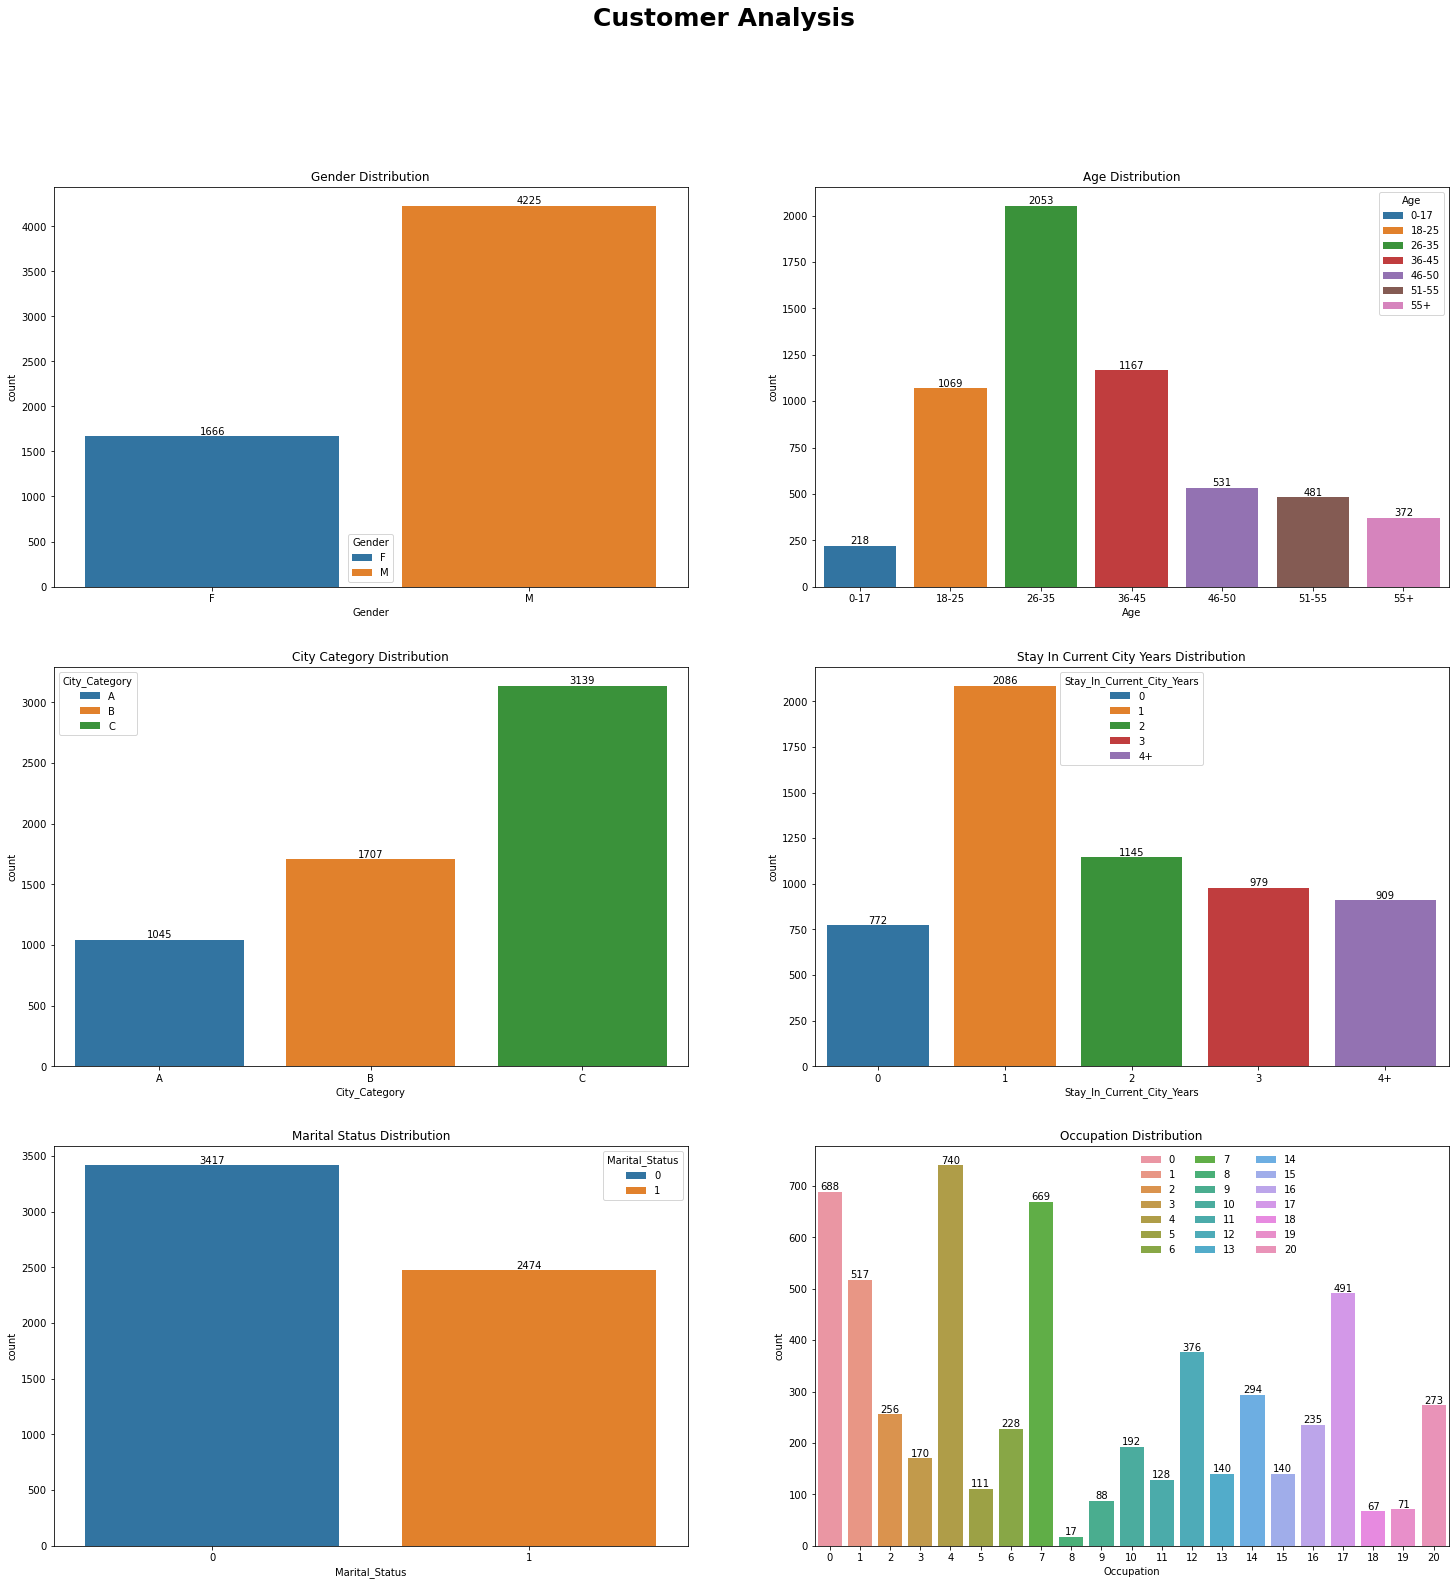

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(25, 25), sharey=False)
fig.suptitle("Customer Analysis " , fontsize=25, fontweight='bold')
graph = sns.countplot(x = 'Gender', hue= 'Gender', data= data2, dodge = False , ax = axs[0, 0])
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Gender Distribution", fontsize = 12)
graph2 = sns.countplot(x = 'Age', hue = 'Age', data = data2 , dodge=False, ax = axs[0, 1])
for i in graph2.containers:
    graph2.bar_label(i,)
graph2.set_title("Age Distribution", fontsize = 12)
graph3 = sns.countplot(x = 'City_Category', hue = 'City_Category' ,data = data2 , dodge=False, ax = axs[1, 0])
for i in graph3.containers:
    graph3.bar_label(i,)
graph3.set_title("City Category Distribution", fontsize = 12)
graph4 = sns.countplot(x = 'Stay_In_Current_City_Years', hue= 'Stay_In_Current_City_Years', data= data2, dodge = False , ax = axs[1, 1])
for i in graph4.containers:
    graph4.bar_label(i,)
graph4.set_title("Stay In Current City Years Distribution", fontsize = 12)
graph5 = sns.countplot(x = 'Marital_Status', hue = 'Marital_Status', data = data2 , dodge=False, ax = axs[2, 0])
for i in graph5.containers:
    graph5.bar_label(i,)
graph5.set_title("Marital Status Distribution", fontsize = 12)
graph6 = sns.countplot(x = 'Occupation', hue = 'Occupation' ,data = data2 , dodge=False, ax = axs[2, 1])
sns.move_legend(graph6, "upper left", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
for i in graph6.containers:
    graph6.bar_label(i,)
graph6.set_title("Occupation Distribution", fontsize = 12)
plt.show()

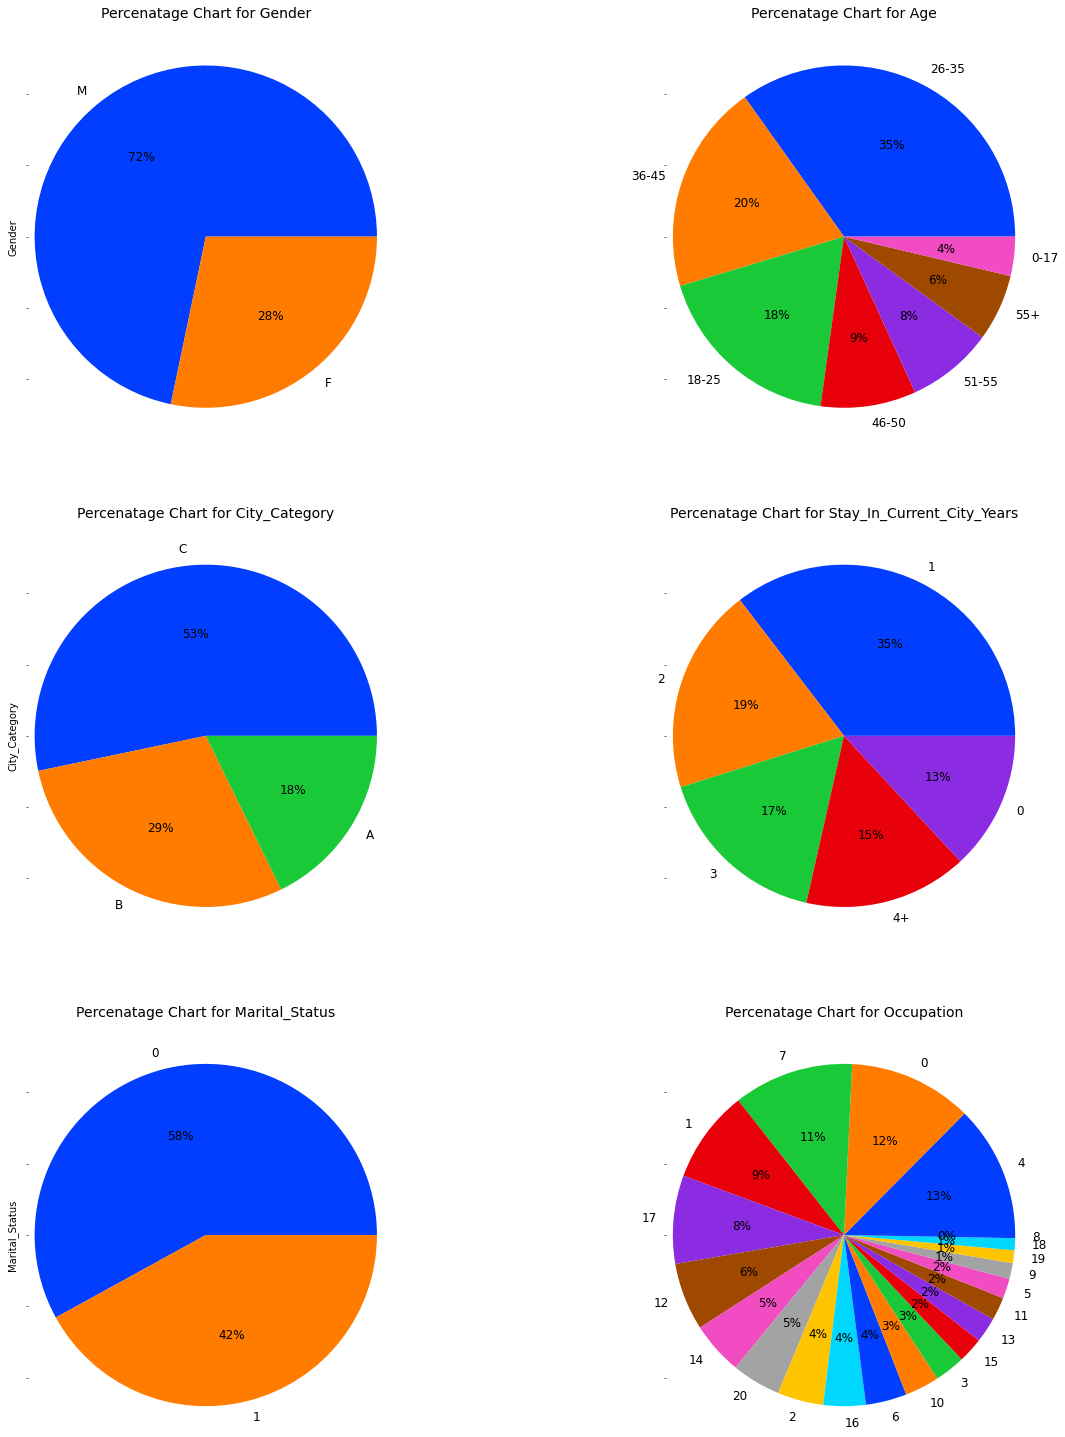

In [ ]:
fig, axs = plt.subplots(3, 2,figsize=(20, 20), sharey=True)
colors = sns.color_palette('bright')

data2.Gender.value_counts().plot(kind='pie', autopct='%.0f%%',ax = axs[0][0], colors=colors, textprops={'fontsize': 12}, radius = 1.2)
axs[0][0].set_title(label = 'Percenatage Chart for Gender', y=1.1, pad=5, fontsize = 14)
data2.Age.value_counts().plot(kind='pie', autopct='%.0f%%',ax = axs[0][1], colors=colors, textprops={'fontsize': 12},  radius = 1.2)
axs[0][1].set_title(label = 'Percenatage Chart for Age', y=1.1, pad= 5, fontsize = 14)
data2.City_Category.value_counts().plot(kind='pie', autopct='%.0f%%',ax = axs[1][0], colors=colors, textprops={'fontsize': 12}, radius = 1.2)
axs[1][0].set_title(label = 'Percenatage Chart for City_Category', y=1.1, pad=5, fontsize = 14)
data2.Stay_In_Current_City_Years.value_counts().plot(kind='pie', autopct='%.0f%%',ax = axs[1][1], colors=colors, textprops={'fontsize': 12},  radius = 1.2)
axs[1][1].set_title(label = 'Percenatage Chart for Stay_In_Current_City_Years', y=1.1, pad=5, fontsize = 14)
data2.Marital_Status.value_counts().plot(kind='pie', autopct='%.0f%%',ax = axs[2][0], colors=colors, textprops={'fontsize': 12}, radius = 1.2)
axs[2][0].set_title(label = 'Percenatage Chart for Marital_Status', y=1.1, pad=5, fontsize = 14)
data2.Occupation.value_counts().plot(kind='pie', autopct='%.0f%%',ax = axs[2][1], colors=colors, textprops={'fontsize': 12},  radius = 1.2)
axs[2][1].set_title(label = 'Percenatage Chart for Occupation', y=1.1, pad=5, fontsize = 14)
fig.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

#### From the given sample
1. Around 28 % Females and 72 % are male customers
2. 35% Customers belongs to 26-35 age group <br>
   20% Customers belongs to 36-45 age group <br>
   18% Customers belongs to 18-25 age group <br>
   But only 4 and 6 Percent customers belongs to 0-17 and 55+ Age groups Respectively <br>

3. 53% Customers are from C type City, 29% are from B type City and Remaining 18% are from A type City

4. Around 35% Customers are staying in current city for 2 years.
5. 58% Customers are unmarried while 42% customers are married.

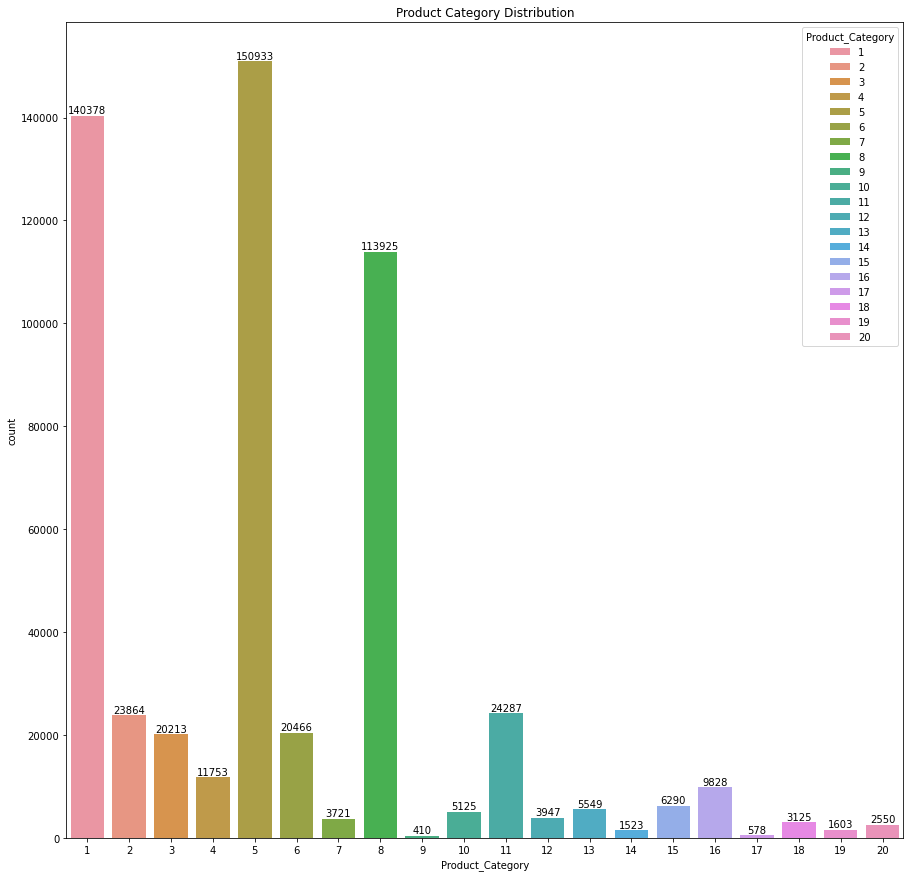

In [ ]:
plt.figure(figsize=(15,15))
graph = sns.countplot(x = 'Product_Category', hue= 'Product_Category', data= data, dodge = False)
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Product Category Distribution", fontsize = 12)
plt.show()

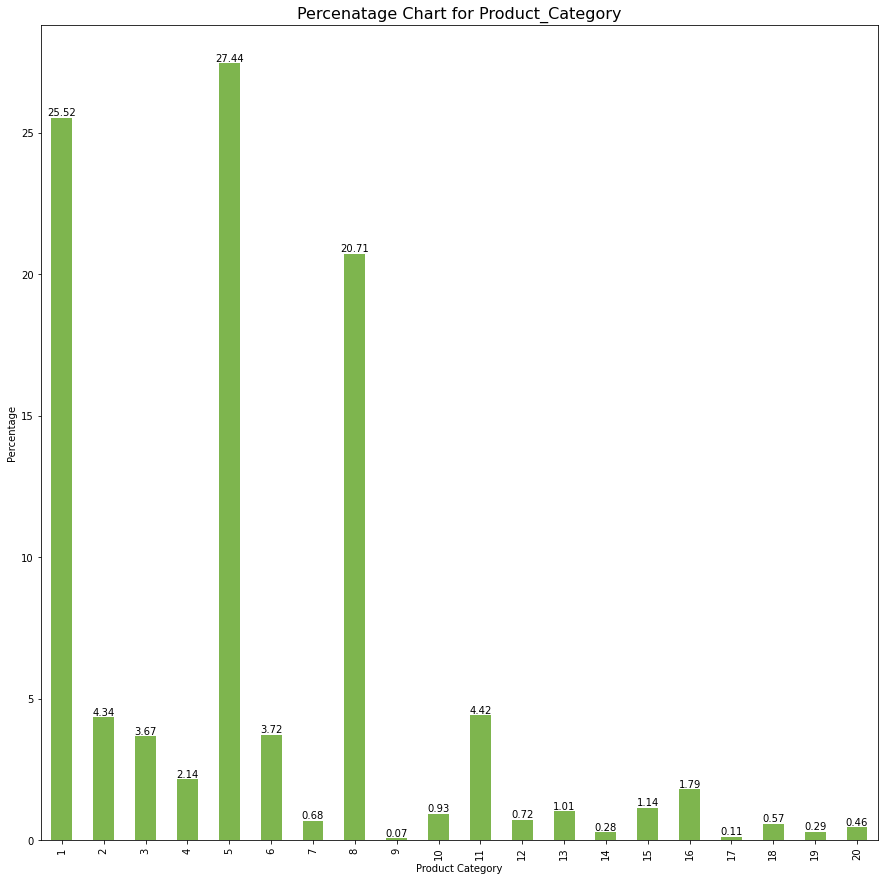

In [ ]:
plt.figure(figsize=(15,15))
graph = (data['Product_Category'].value_counts(normalize= True).round(4)*100).sort_index(ascending = True).plot(kind = "bar",xlabel ="Product Category", ylabel = 'Percentage', color = "#7eb54e")
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Percenatage Chart for Product_Category", fontsize = 16)
plt.show()

#### From the Product Category Distribution
1. Product 5, 8 and 1 is highly selling Product Category
2. Product Category 9 and 17 has very less percentage of selling i.e., 0.07 and 0.11 Percentage respectively

## Purchase Analysis

In [ ]:
data['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
Q3, Q1 = np.percentile(data['Purchase'], [75 ,25])
IQR = Q3 - Q1
maxExcludingOutlier = Q3 + 1.5 * IQR
minExcludingOutlier = Q1 - 1.5 * IQR
mean = round(data['Purchase'].mean(),2)
median = round(data['Purchase'].median(),2)
mode = round(data['Purchase'].mode(), 2)
print("For the given sample Purchase Analysis is as Follows: ")
print("Q1: ", Q1)
print("Q3: ", Q3)
print("Mean: ", round(data['Purchase'].mean(),2))
print("Median: ", data['Purchase'].median())
print("Mode: " , round(data['Purchase'].mode(), 2))
print("IQR: " , IQR)
print("Maximum Purchase Excluding Outlier: " , maxExcludingOutlier)
print("Minimum Purchase Excluding Outlier: " , minExcludingOutlier)


For the given sample Purchase Analysis is as Follows: 
Q1:  5823.0
Q3:  12054.0
Mean:  9263.97
Median:  8047.0
Mode:  0    7011
dtype: int64
IQR:  6231.0
Maximum Purchase Excluding Outlier:  21400.5
Minimum Purchase Excluding Outlier:  -3523.5


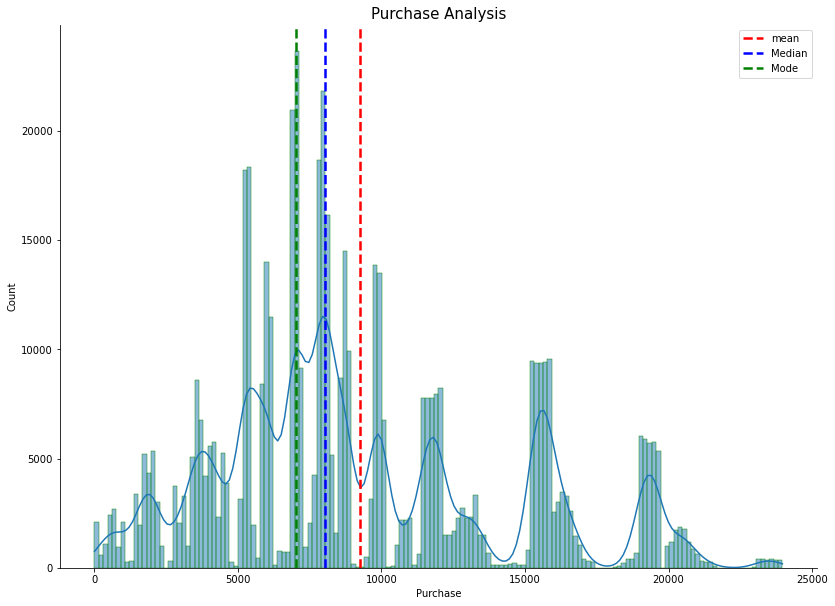

In [ ]:
ax = sns.displot(data['Purchase'], kde = True, edgecolor='green', height=8.27, aspect=11.7/8.27)
plt.axvline(data['Purchase'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
plt.axvline(data['Purchase'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
plt.axvline(data['Purchase'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
plt.legend()
plt.title("Purchase Analysis", fontsize = 15)
plt.show()

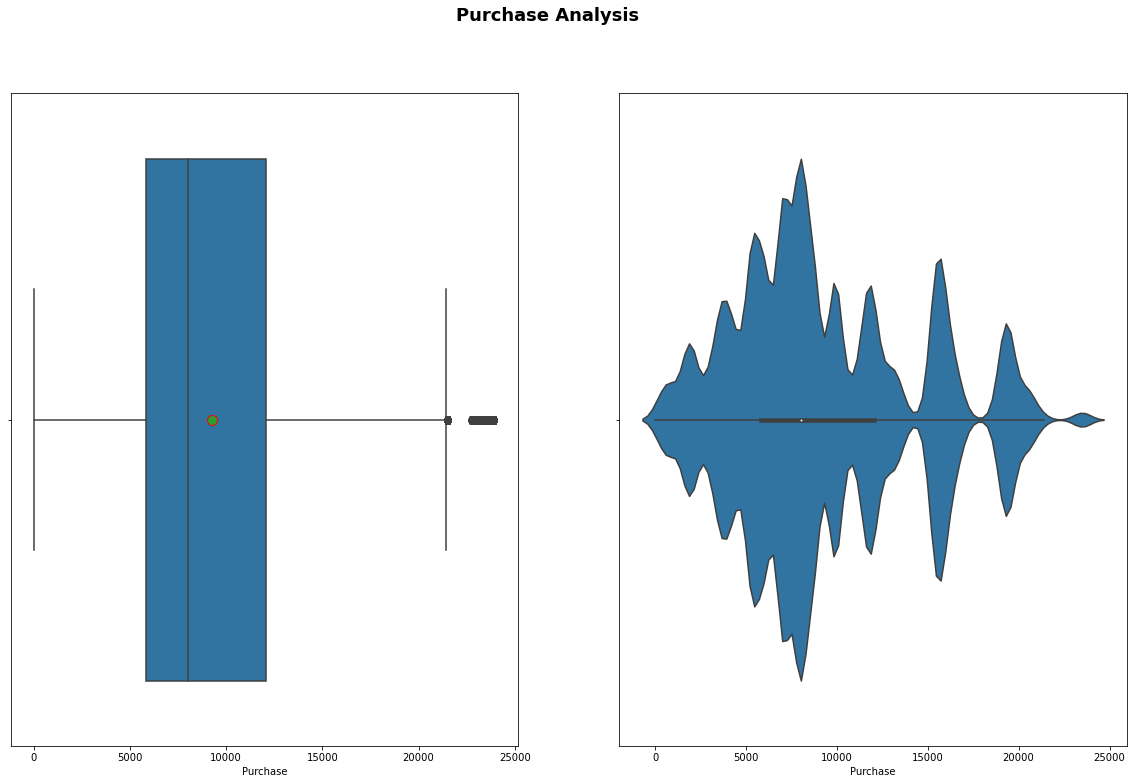

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,12))
fig.suptitle("Purchase Analysis " , fontsize=18, fontweight='bold')
sns.boxplot(data = data, x = "Purchase", showmeans = True, ax = axes[0], dodge=True, meanprops={"marker": ".", "markeredgecolor": "red","markersize": "20"})
sns.violinplot(data = data, x = "Purchase", showmeans = True, ax = axes[1], dodge=True, meanprops={"marker": ".", "markeredgecolor": "red","markersize": "20"})
plt.xlabel("Purchase")
plt.show()

Purchase Distribution "right-skewed / Log normal Distribution" . <br>
Majority of Customers purchase in the range 5,000 - 20,000.

In [ ]:
data.groupby(['Gender'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [ ]:
data.groupby(['Age'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

In [ ]:
data.groupby(['City_Category'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
City_Category                                                             
A              147720.0  8911.939216  4892.115238  12.0  5403.0  7931.0   
B              231173.0  9151.300563  4955.496566  12.0  5460.0  8005.0   
C              171175.0  9719.920993  5189.465121  12.0  6031.5  8585.0   

                   75%      max  
City_Category                    
A              11786.0  23961.0  
B              11986.0  23960.0  
C              13197.0  23961.0

In [ ]:
data.groupby(['Stay_In_Current_City_Years'])['Purchase'].describe()

count         mean          std   min     25%  \
Stay_In_Current_City_Years                                                     
0                            74398.0  9180.075123  4990.479940  12.0  5480.0   
1                           193821.0  9250.145923  5027.476933  12.0  5500.0   
2                           101838.0  9320.429810  5044.588224  12.0  5846.0   
3                            95285.0  9286.904119  5020.343541  12.0  5832.0   
4+                           84726.0  9275.598872  5017.627594  12.0  5844.0   

                               50%      75%      max  
Stay_In_Current_City_Years                            
0                           8025.0  11990.0  23960.0  
1                           8041.0  12042.0  23961.0  
2                           8072.0  12117.0  23961.0  
3                           8047.0  12075.0  23961.0  
4+                          8052.0  12038.0  23958.0

In [ ]:
data.groupby(['Marital_Status'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
0               324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
1               225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                    75%      max  
Marital_Status                    
0               12061.0  23961.0  
1               12042.0  23961.0

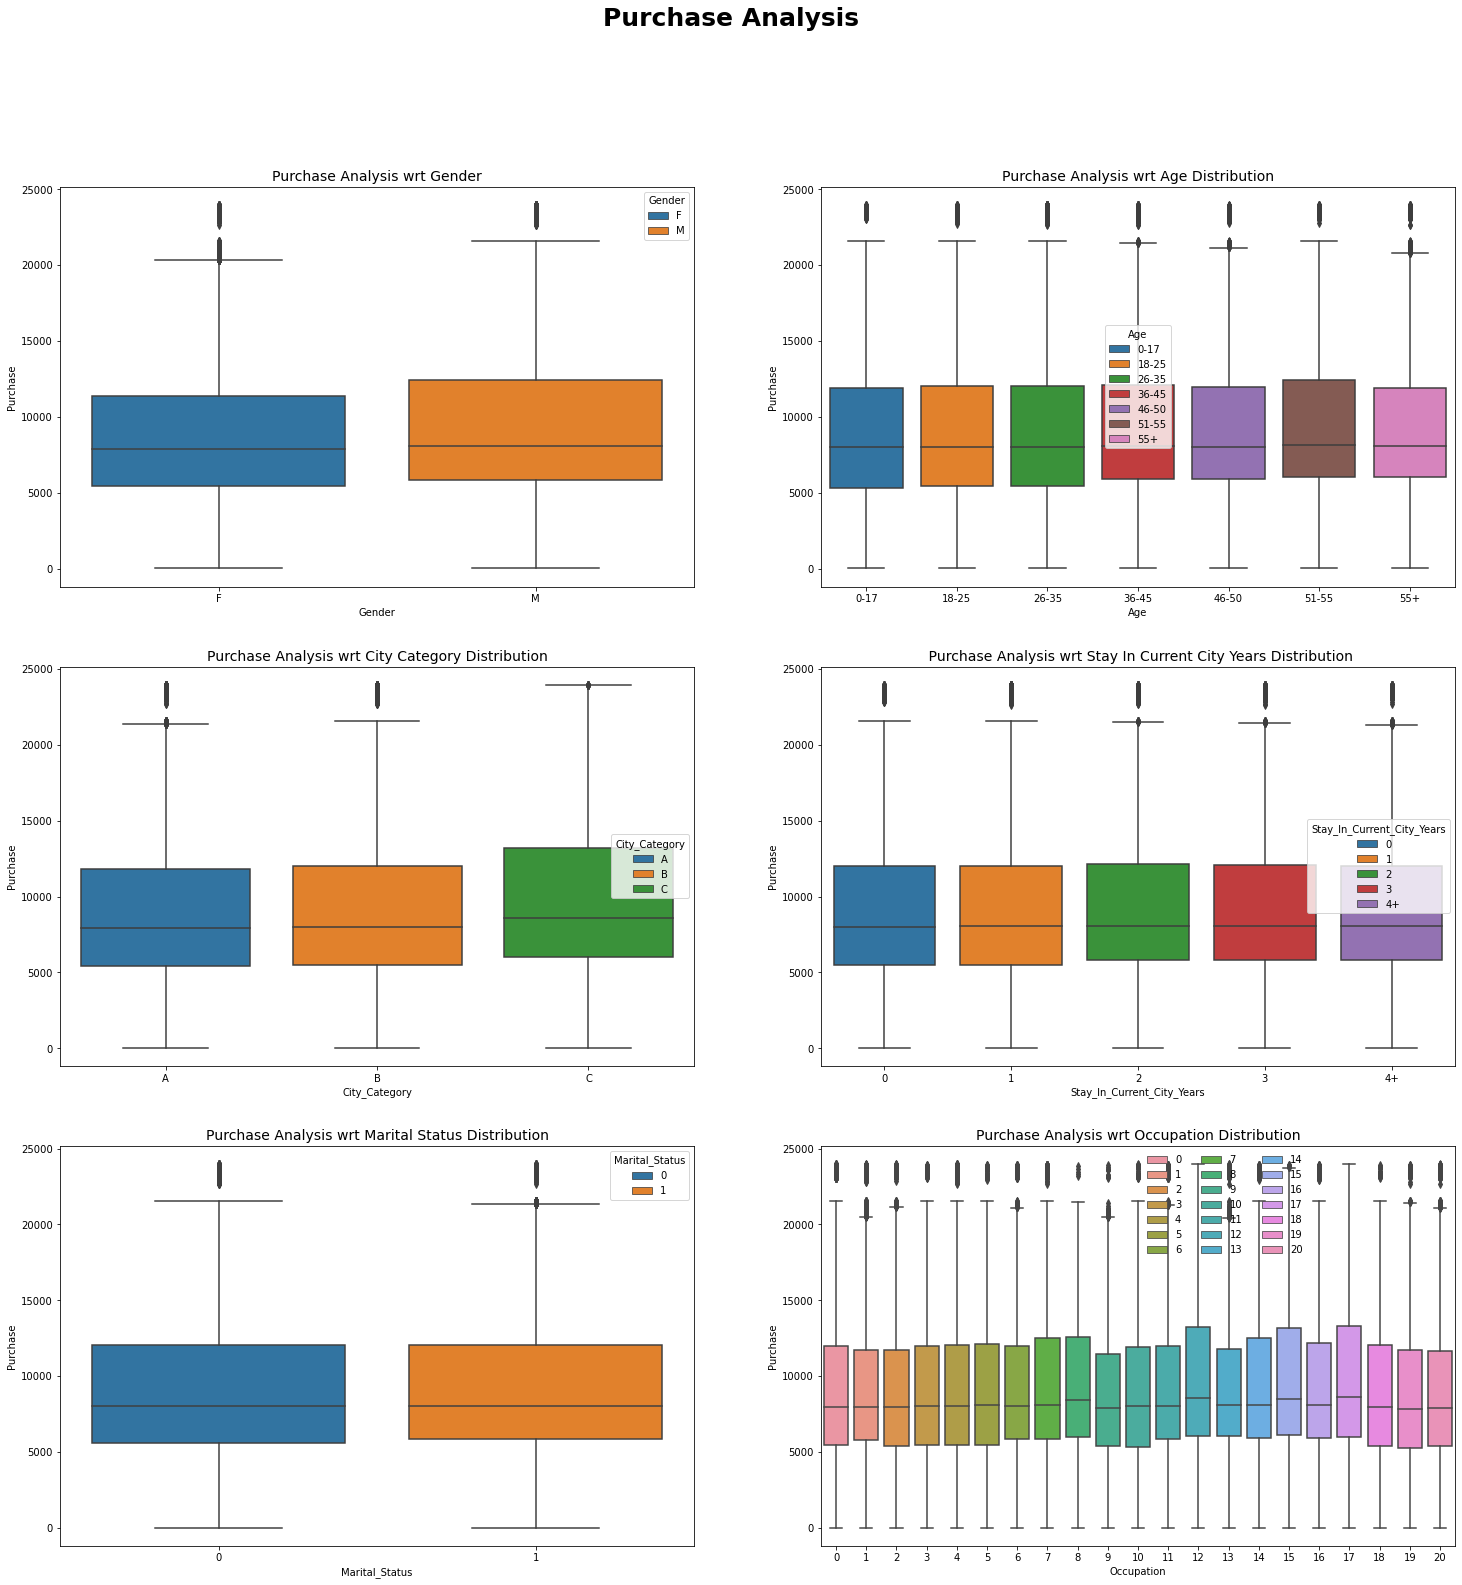

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(25, 25), sharey=False)
fig.suptitle("Purchase Analysis " , fontsize=25, fontweight='bold')
graph = sns.boxplot(x = 'Gender', y = 'Purchase', hue= 'Gender', data= data, dodge = False , ax = axs[0, 0])
graph.set_title("Purchase Analysis wrt Gender", fontsize = 14)
graph2 = sns.boxplot(x = 'Age',y = 'Purchase', hue = 'Age', data = data , dodge=False, ax = axs[0, 1])
graph2.set_title("Purchase Analysis wrt Age Distribution", fontsize = 14)
graph3 = sns.boxplot(x = 'City_Category',y = 'Purchase', hue = 'City_Category' ,data = data , dodge=False, ax = axs[1, 0])
graph3.set_title("Purchase Analysis wrt City Category Distribution", fontsize = 14)
graph4 = sns.boxplot(x = 'Stay_In_Current_City_Years', y = 'Purchase', hue= 'Stay_In_Current_City_Years', data= data, dodge = False , ax = axs[1, 1])
graph4.set_title(" Purchase Analysis wrt Stay In Current City Years Distribution", fontsize = 14)
graph5 = sns.boxplot(x = 'Marital_Status',y = 'Purchase', hue = 'Marital_Status', data = data , dodge=False, ax = axs[2, 0])
graph5.set_title("Purchase Analysis wrt Marital Status Distribution", fontsize = 14)
graph6 = sns.boxplot(x = 'Occupation', y = 'Purchase', hue = 'Occupation' ,data = data , dodge=False, ax = axs[2, 1])
sns.move_legend(graph6, "upper left", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
graph6.set_title("Purchase Analysis wrt Occupation Distribution", fontsize = 14)
plt.show()

### From the Given Sample:
1. We can see Median purchase for Male and Female are nearly same. We can see many outliers here for Female Customers.
2. For age groups as well we can see sNearly equal Median Purchase with some Outiers
3. For C type city we rarely see any outliers for purchases as compared to A and B type of city
4. For Married People there are more people as compared to Unmarried.

But we can't conclude anything here as this if for Sample

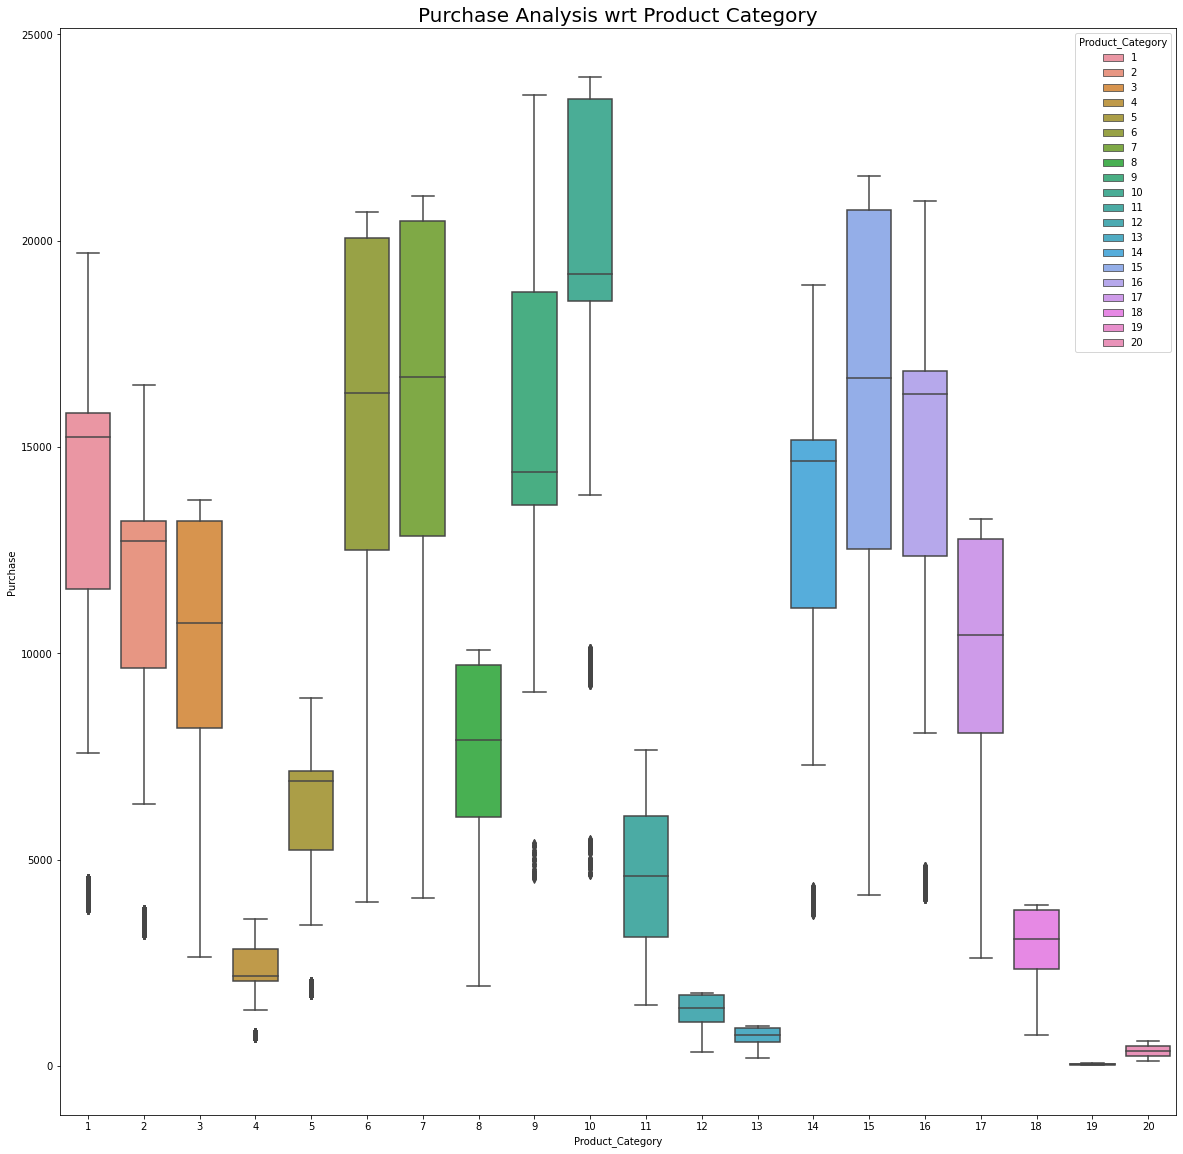

In [ ]:
plt.figure(figsize=(20,20))
graph = sns.boxplot(x = 'Product_Category', y = 'Purchase', hue= 'Product_Category', data= data, dodge = False )
graph.set_title("Purchase Analysis wrt Product Category", fontsize = 20)
plt.show()

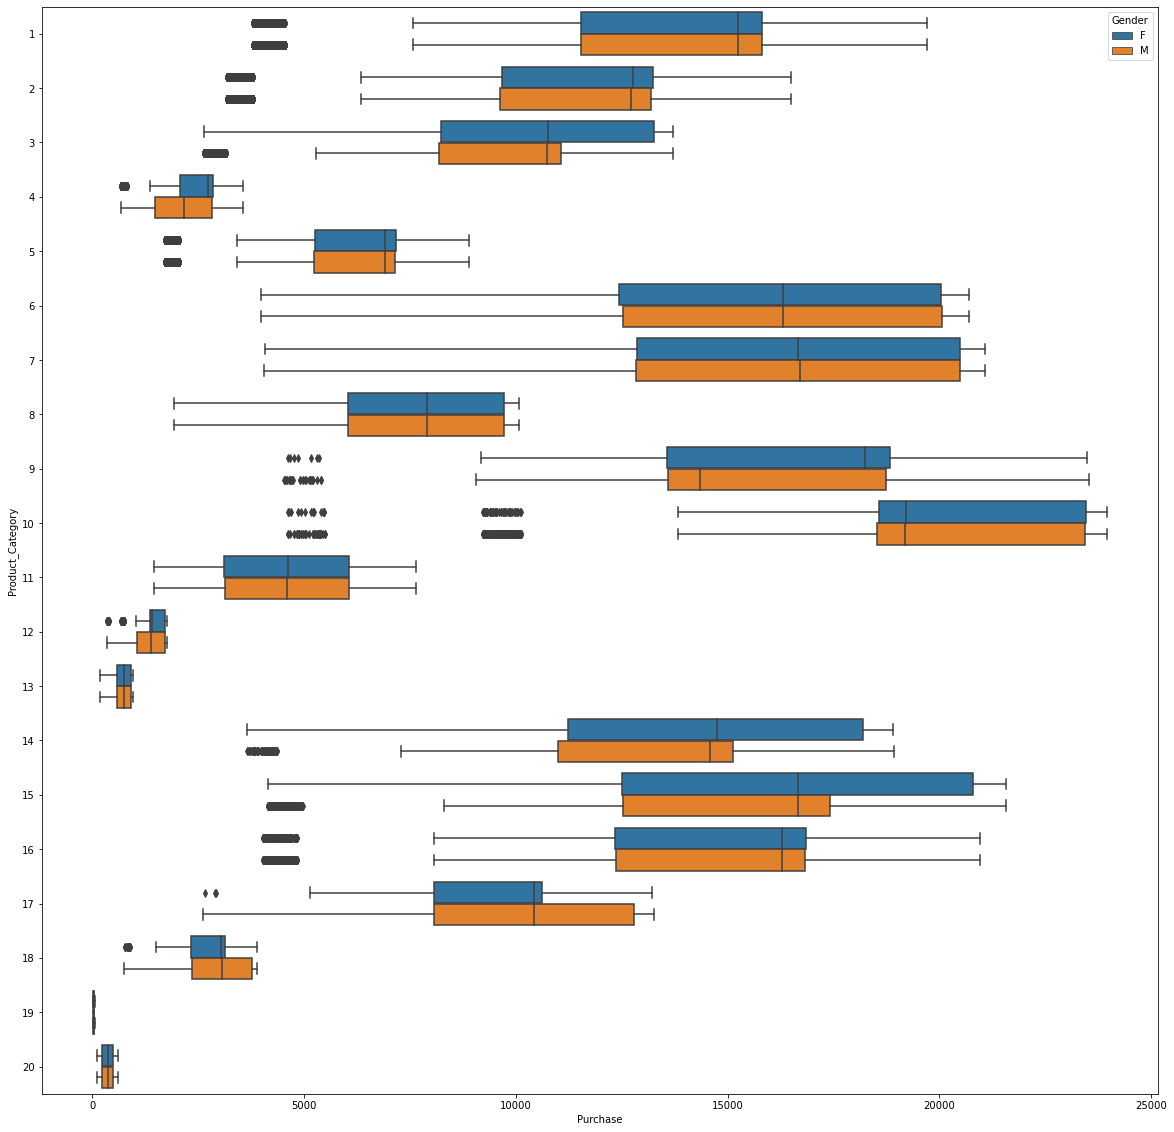

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(y = 'Product_Category', x = 'Purchase', hue= 'Gender', data= data, dodge = True , orient = "h")
# graph.set_title("Purchase Analysis wrt Product Category", fontsize = 20)
plt.show()

Product Category 6, 7 and 10 seems to be more popular among the Customers which pays high

In [ ]:
data['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

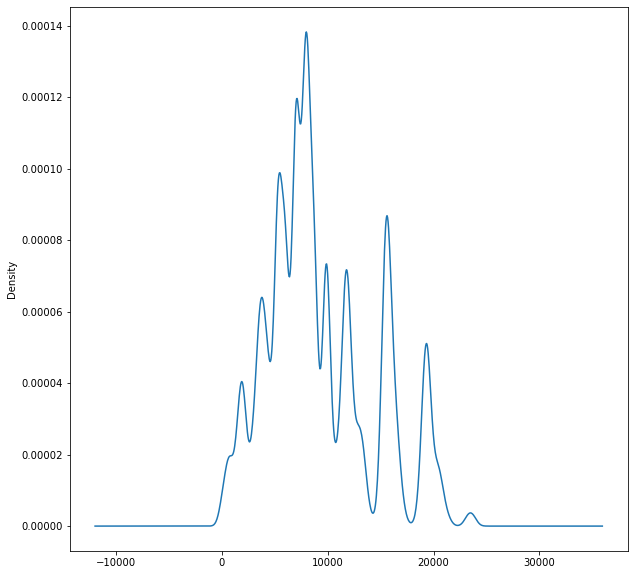

In [ ]:
plt.figure(figsize=(10,10))
data['Purchase'].plot(kind = "kde")
plt.show()

The above KDE plot seems to be Right skewed or we can say Log normal Distribution

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


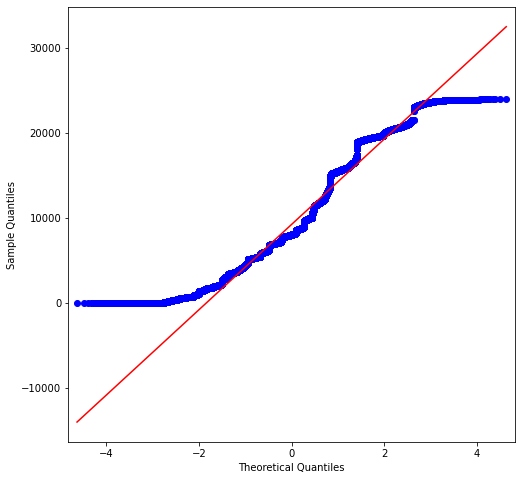

In [ ]:
plt.rc("figure", figsize=(8,8))
sm.qqplot(data['Purchase'], dist=stats.norm, line='s');
plt.show()

## Functions

In [ ]:
def IQRAnalysis(data):
    Q3, Q1 = np.percentile(data, [75 ,25])
    IQR = Q3 - Q1
    maxExcludingOutlier = Q3 + 1.5 * IQR
    minExcludingOutlier = Q1 - 1.5 * IQR
    mean = round(data.mean(),2)
    median = round(data.median(),2)
    mode = round(data.mode(), 2)
    print("Q1: ", Q1)
    print("Q3: ", Q3)
    print("Mean: ", mean)
    print("Median: ", median)
    print("Mode: " , mode)
    print("IQR: " , IQR)
    print("Maximum Purchase Excluding Outlier: " , maxExcludingOutlier)
    print("Minimum Purchase Excluding Outlier: " , minExcludingOutlier)

In [ ]:
def simulate_clt(d, sample_size):
    means = []
    for i in range(1000):
        means.append(d.sample(sample_size, replace = True).mean())
    sns.displot(pd.Series(means), kde = True)
    title = "CLT for Sample Size: ", str(sample_size)
    plt.title(title, fontsize = 14)
    return pd.Series(means)

In [ ]:
def plotCofidenceInterval(d, sample_size, CI):
    means = []
    for i in range(1000):
        means.append(d.sample(sample_size).mean())

    sampleMean = np.mean(means)
    alpha = (1 - CI)/2
    z_critical = stats.norm.ppf(1 - alpha)
    stdDev = data['Purchase'].std()
    std_dev = z_critical * (stdDev / math.sqrt(sample_size))
    confidence_interval = [sampleMean - std_dev , sampleMean + std_dev]
    plt.figure(figsize=(20,10))
    sns.kdeplot(pd.Series(means), color = "g", fill = True)
    plt.axvline(sampleMean, label = ("Mean: ", np.round(sampleMean, 2)))
    plt.axvline(confidence_interval[0], color = "r", label =("Lower Limit: ", np.round(confidence_interval[0], 2)))
    plt.axvline(confidence_interval[1], color = "r", label = ("Upper Limit: ", np.round(confidence_interval[1], 2)))
    plt.legend(loc = "best")
    plt.show()

In [ ]:
def plotCofidenceIntervalAll(d, sample_size):
    GivenSampleStdDev = d.std()
    means = []
    for i in range(1000):
        means.append(d.sample(sample_size , replace = True).mean())

    sampleMean = np.round(np.mean(means), 2)
    alpha90 = (1 - 0.90)/2
    alpha95 = (1 - 0.95)/2
    alpha99 = (1 - 0.99)/2

    z_cr90 = stats.norm.ppf(1 - alpha90)
    z_cr95 = stats.norm.ppf(1 - alpha95)
    z_cr99 = stats.norm.ppf(1 - alpha99)

    std_dev90 = z_cr90 * np.std(means)
    std_dev95 = z_cr95 * np.std(means)
    std_dev99 = z_cr99 * np.std(means)
    confidence_interval90 = [sampleMean - std_dev90 , sampleMean + std_dev90]
    confidence_interval95 = [sampleMean - std_dev95 , sampleMean + std_dev95]
    confidence_interval99 = [sampleMean - std_dev99 , sampleMean + std_dev99]
    plt.figure(figsize=(20,10))
    sns.kdeplot(pd.Series(means), color = "m", fill = True )
    a = plt.axvline(sampleMean, label = ("Mean: ", sampleMean), color = "navy", linewidth = 4)
    b = plt.axvline(confidence_interval90[0], color = "r",linewidth = 3, linestyle = "solid", label =("Lower Limit 90% CI: ", np.round(confidence_interval90[0], 2)))
    c = plt.axvline(confidence_interval90[1], color = "r", linewidth = 3, linestyle = "solid", label = ("Upper Limit 90% CI: ", np.round(confidence_interval90[1], 2)))
    d = plt.axvline(confidence_interval95[0], color = "g",linewidth = 3, linestyle = "--", label =("Lower Limit 95% CI: ", np.round(confidence_interval95[0], 2)))
    e = plt.axvline(confidence_interval95[1], color = "g", linewidth = 3, linestyle = "--", label = ("Upper Limit 95% CI: ", np.round(confidence_interval95[1], 2)))
    f = plt.axvline(confidence_interval99[0], color = "#36454f", linewidth = 3, linestyle = "-.",  label =("Lower Limit 99% CI: ", np.round(confidence_interval99[0], 2)))
    g = plt.axvline(confidence_interval99[1], color = "#36454f", linewidth = 3, linestyle = "-.", label = ("Upper Limit 99% CI: ", np.round(confidence_interval99[1], 2)))
    plt.legend(loc = "best")
    title = "CLT Distribution For Purchases with confidence Intervals for Sample size " + str(sample_size)
    plt.title(title, fontsize = 16)
    plt.show()

In [ ]:
def CIUsingIQRMethod(d, sample_size):
    means = []
    for i in range(1000):
        means.append(d.sample(sample_size, replace = True).mean())

    Ninty_percent_CI = np.percentile(means, [5, 95])
    NintyFive_percent_CI = np.percentile(means, [2.5, 97.5])
    NintyNine_percent_CI = np.percentile(means, [0.5, 99.5])

    print("90 Percent Confidence Interval for Given data with " + str(sample_size) +" Sample size is " + str(Ninty_percent_CI) )
    print("95 Percent Confidence Interval for Given data with " + str(sample_size) +" Sample size is " + str(NintyFive_percent_CI) )
    print("99 Percent Confidence Interval for Given data with " + str(sample_size) +" Sample size is " + str(NintyNine_percent_CI) )

In [ ]:
sample_sizeArray = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]

##  Male vs Female Purchases

In [ ]:
data.groupby('Gender')['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [ ]:
MaleData = data[data['Gender'] == "M"]

In [ ]:
MaleData.head()

User_ID Product_ID Gender    Age  Occupation City_Category  \
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
4                         4+              0                8      7969  
5                          3              0                1     15227  
6                          2              1                1     19215  
7                          2              1                1     15854  
8                          2              1                1     15686

In [ ]:
MaleData['Purchase'].describe()

count    414259.00000
mean       9437.52604
std        5092.18621
min          12.00000
25%        5863.00000
50%        8098.00000
75%       12454.00000
max       23961.00000
Name: Purchase, dtype: float64

For male customers from the given sample mean Purchase is 9438

<AxesSubplot:ylabel='Density'>

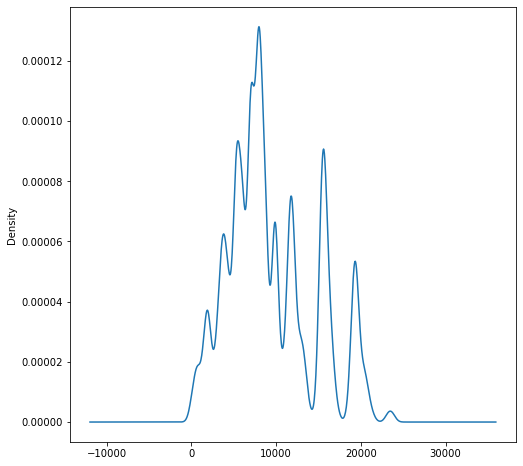

In [ ]:
MaleData["Purchase"].plot(kind = "kde")

In [ ]:
print("\033[1mIQR Analysis for Men \033[0m")
IQRAnalysis(MaleData['Purchase'])

IQR Analysis for Men 
Q1:  5863.0
Q3:  12454.0
Mean:  9437.53
Median:  8098.0
Mode:  0    6855
dtype: int64
IQR:  6591.0
Maximum Purchase Excluding Outlier:  22340.5
Minimum Purchase Excluding Outlier:  -4023.5


Purchase Analysis for Male Customers  



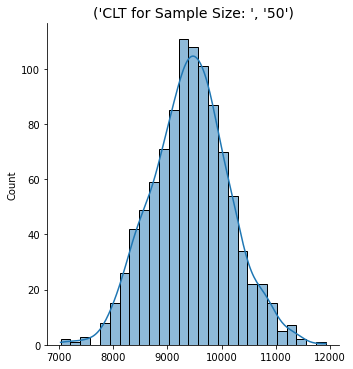

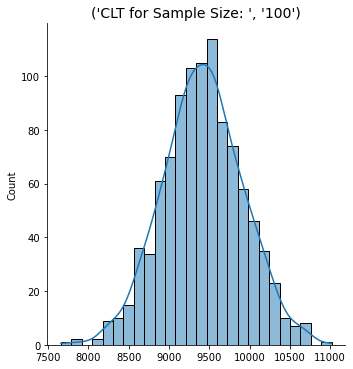

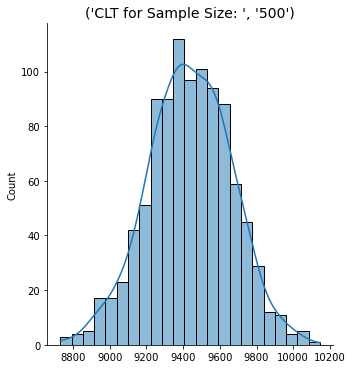

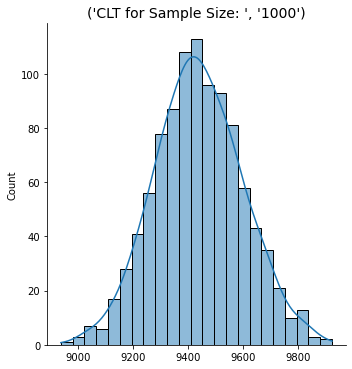

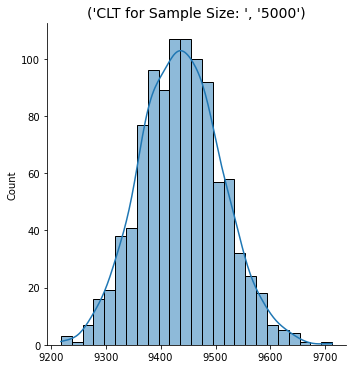

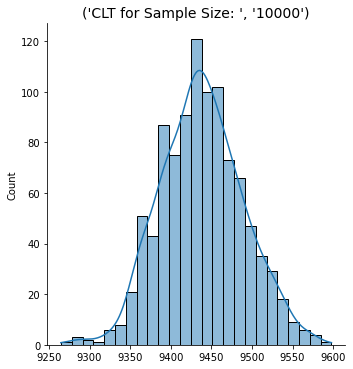

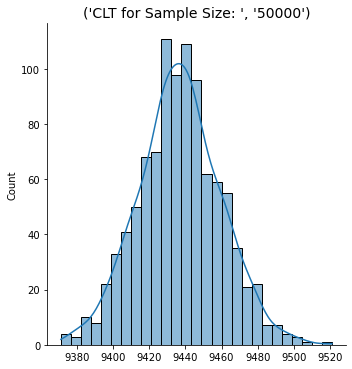

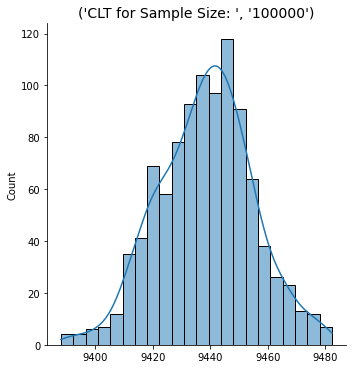

In [ ]:
print('\033[1mPurchase Analysis for Male Customers  \033[0m')
print()
for x in sample_sizeArray:
    simulate_clt(MaleData['Purchase'], x)


Purchase Analysis for Male Customers  



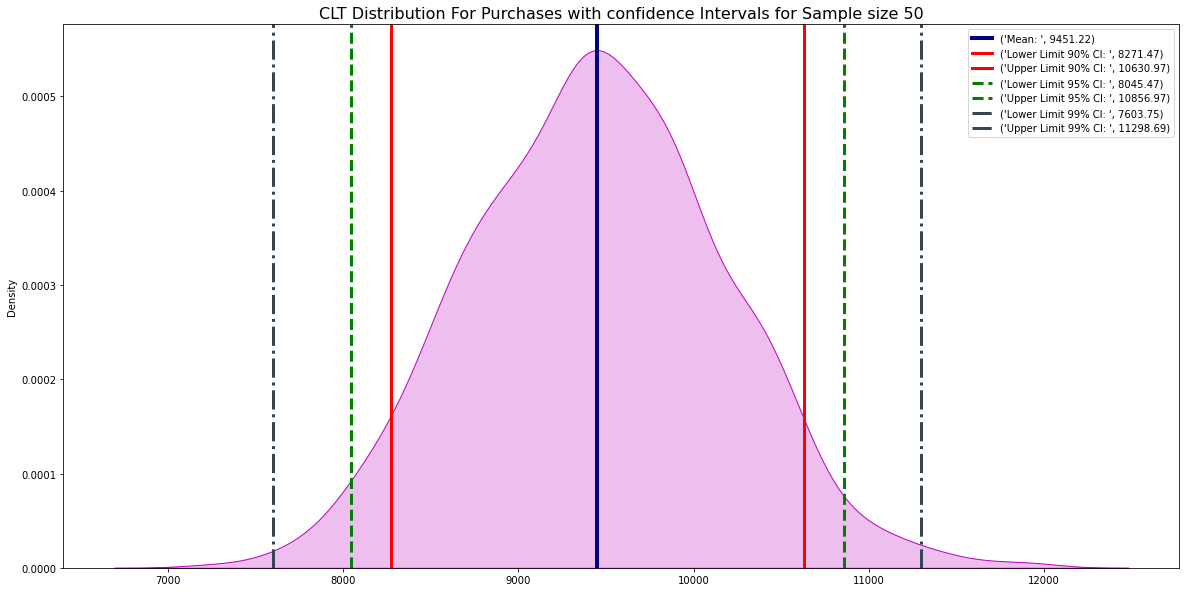


------------------------------------------------------------------------------------------------------------------------


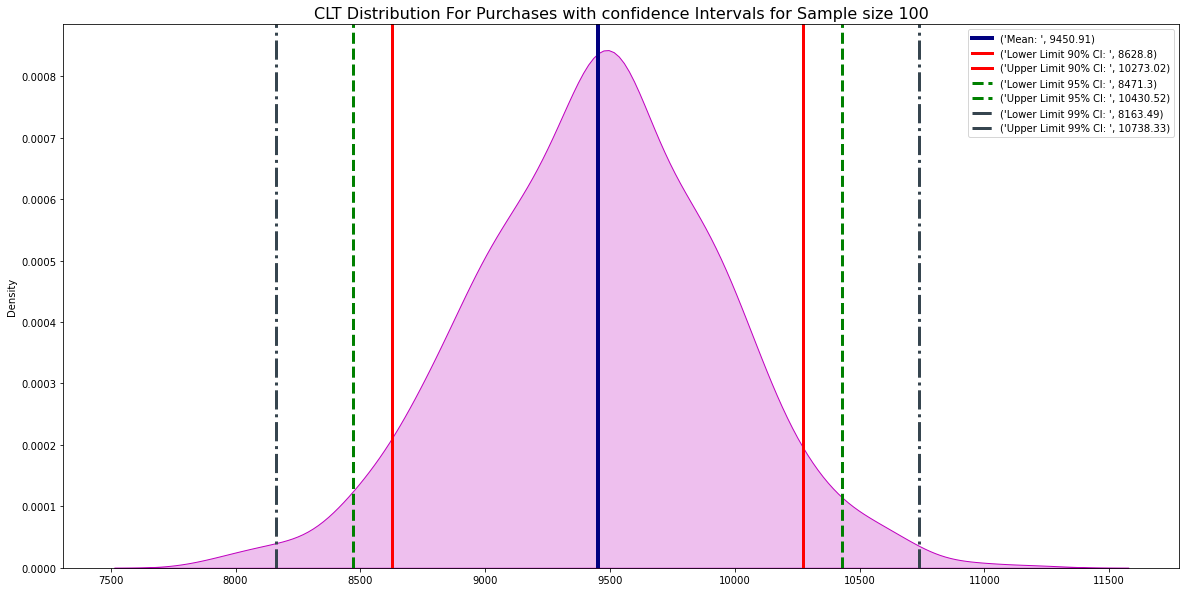


------------------------------------------------------------------------------------------------------------------------


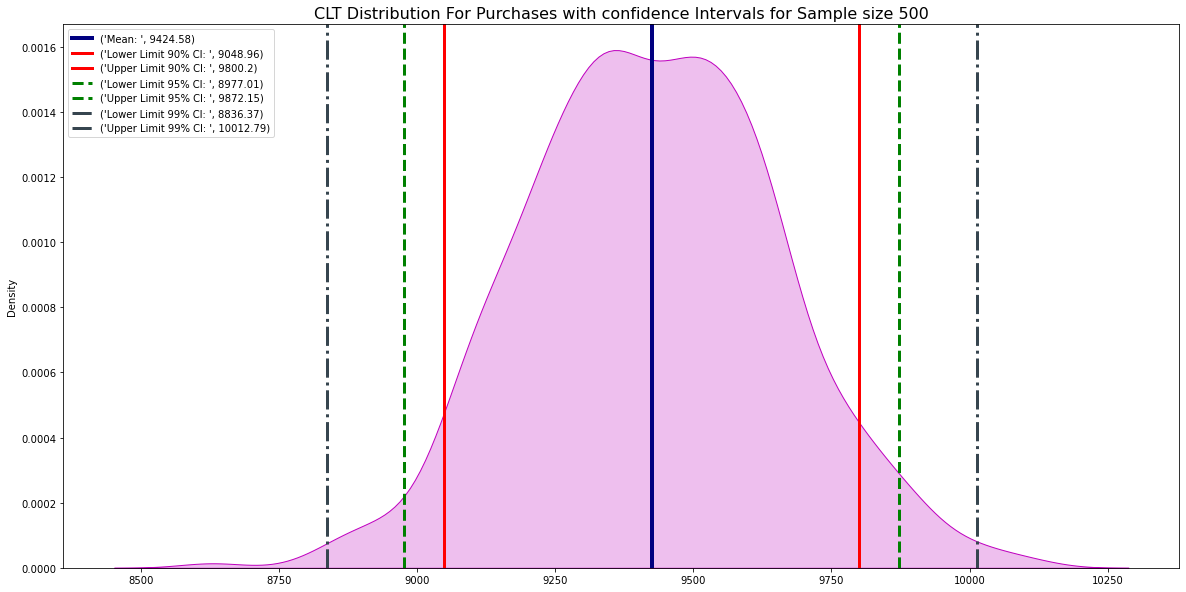


------------------------------------------------------------------------------------------------------------------------


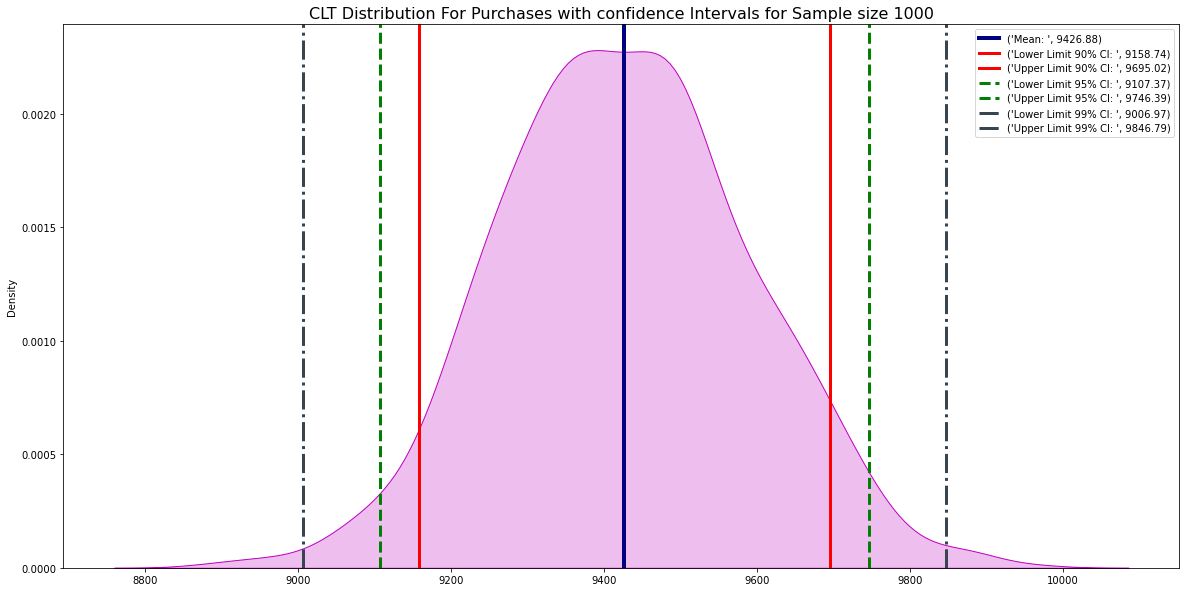


------------------------------------------------------------------------------------------------------------------------


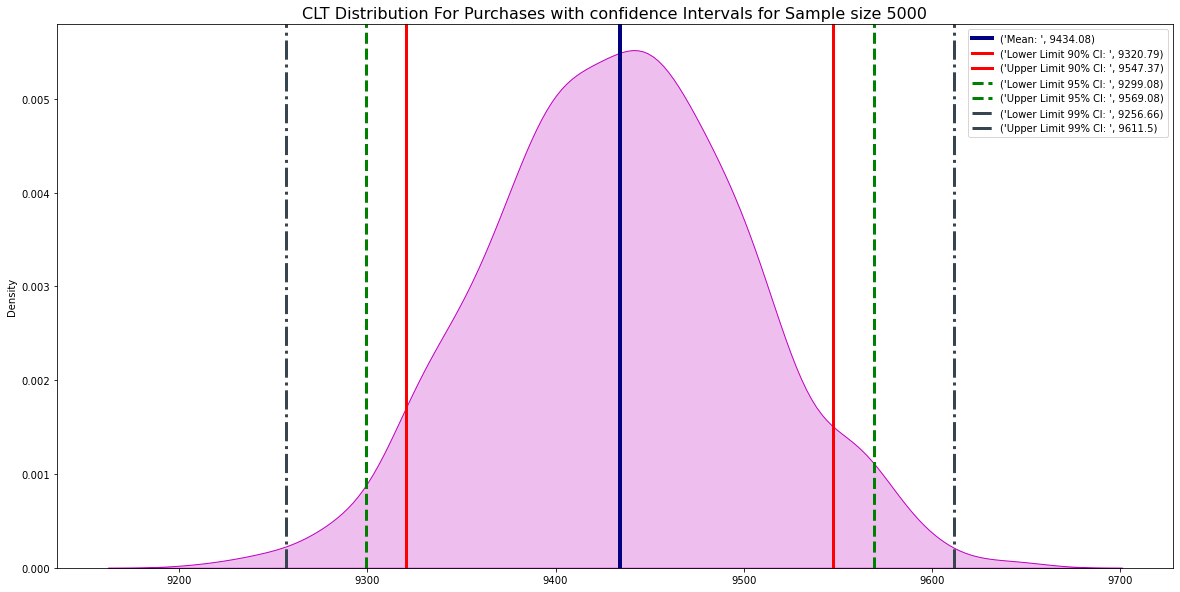


------------------------------------------------------------------------------------------------------------------------


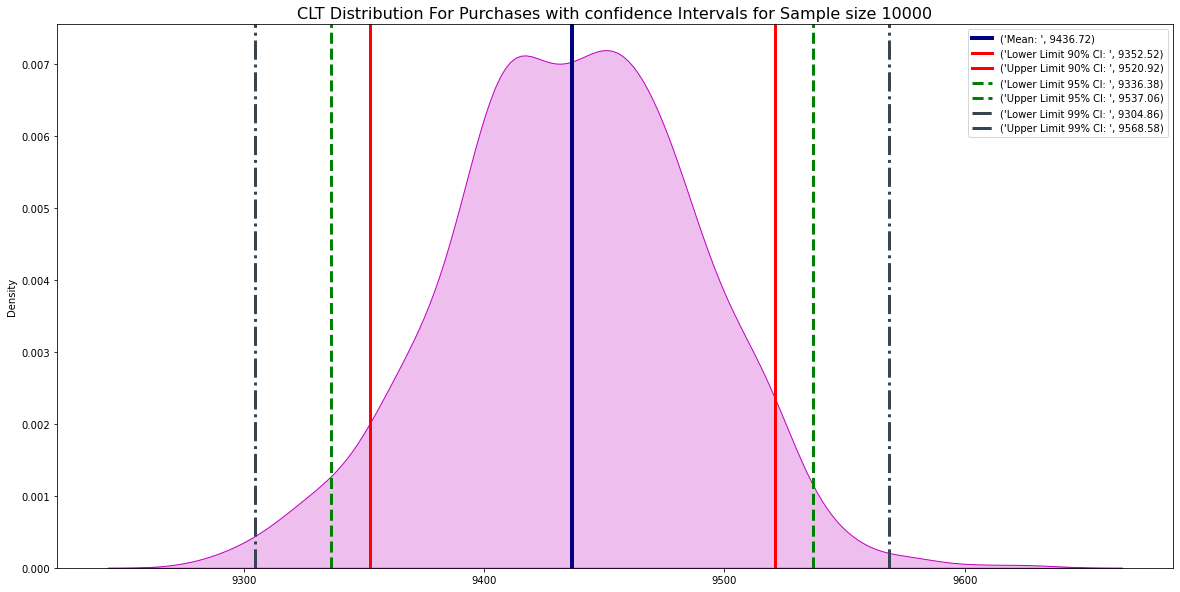


------------------------------------------------------------------------------------------------------------------------


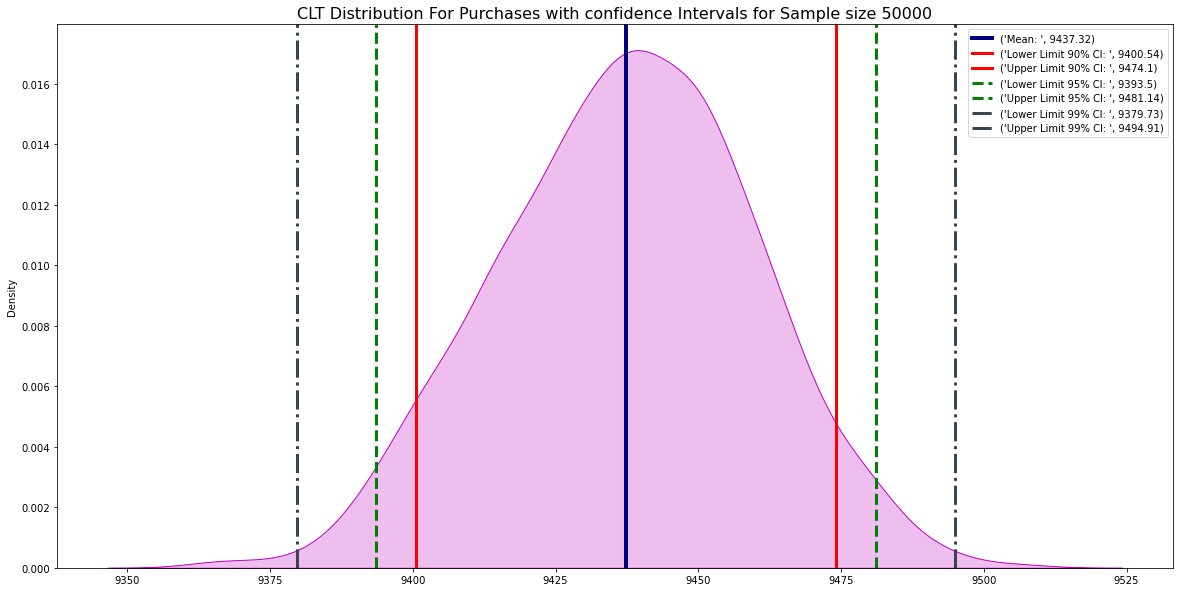


------------------------------------------------------------------------------------------------------------------------


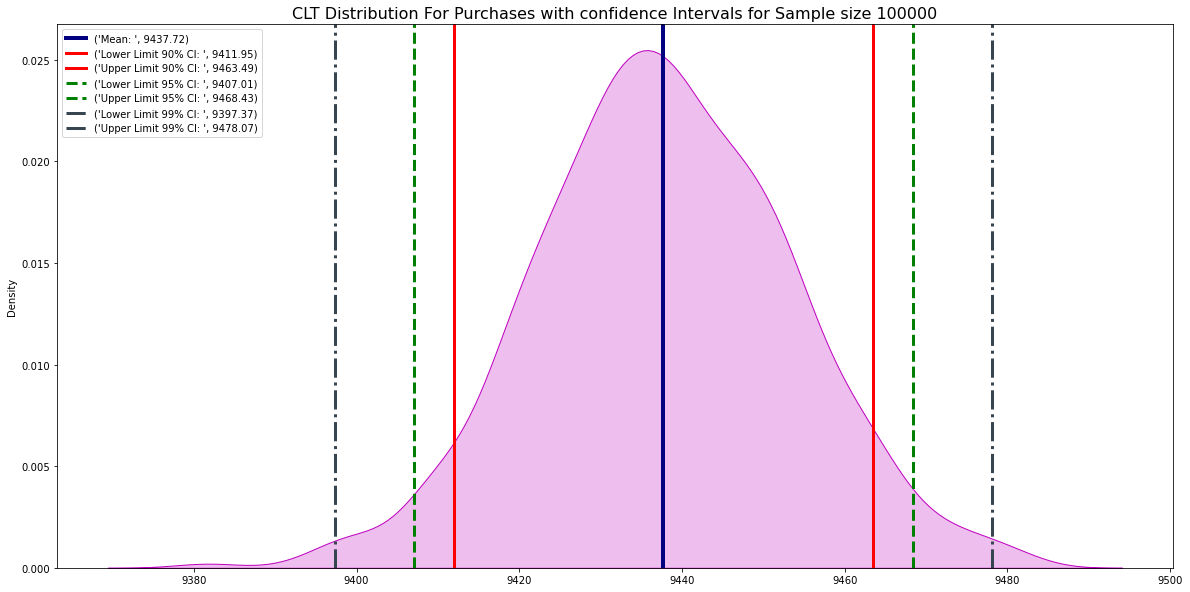


------------------------------------------------------------------------------------------------------------------------


In [ ]:
print('\033[1mPurchase Analysis for Male Customers  \033[0m')
print()
for x in sample_sizeArray:
    plotCofidenceIntervalAll(MaleData['Purchase'], x)
    print()
    print("------------------------------------------------------------------------------------------------------------------------")

In [ ]:
print('\033[1mPurchase Analysis for Male Customers  \033[0m')
print()
for x in sample_sizeArray:
    CIUsingIQRMethod(MaleData['Purchase'], x)
    print()
    print("------------------------------------------------------------------------------------------------------------------------")

Purchase Analysis for Male Customers  

90 Percent Confidence Interval for Given data with 50 Sample size is [ 8279.88  10680.983]
95 Percent Confidence Interval for Given data with 50 Sample size is [ 8069.5675 10905.4125]
99 Percent Confidence Interval for Given data with 50 Sample size is [ 7779.3825 11252.7852]

------------------------------------------------------------------------------------------------------------------------
90 Percent Confidence Interval for Given data with 100 Sample size is [ 8625.1735 10331.0405]
95 Percent Confidence Interval for Given data with 100 Sample size is [ 8485.28225 10501.22675]
99 Percent Confidence Interval for Given data with 100 Sample size is [ 8149.3678  10763.07525]

------------------------------------------------------------------------------------------------------------------------
90 Percent Confidence Interval for Given data with 500 Sample size is [9074.9736 9810.0366]
95 Percent Confidence Interval for Given data with 500 Sample

1. As the sample size increases, We can see the difference between previous and current lower range and Upper range started decreasing which means it is stabalizing
2. For Male (sample size 100000) range for mean purchase with
  1. confidence interval 90% is [9410.82, 9464.75]
  2. confidence interval 95% is [9405.78 , 9470.06]
  3. confidence interval 99% is [9394.84 ,  9479.77]

In [ ]:
FemaleData = data[data['Gender'] == "F"]

In [ ]:
FemaleData.head()

User_ID Product_ID Gender    Age  Occupation City_Category  \
0   1000001  P00069042      F   0-17          10             A   
1   1000001  P00248942      F   0-17          10             A   
2   1000001  P00087842      F   0-17          10             A   
3   1000001  P00085442      F   0-17          10             A   
14  1000006  P00231342      F  51-55           9             A   

   Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                           2              0                3      8370  
1                           2              0                1     15200  
2                           2              0               12      1422  
3                           2              0               12      1057  
14                          1              0                5      5378

In [ ]:
FemaleData['Purchase'].describe()

count    135809.000000
mean       8734.565765
std        4767.233289
min          12.000000
25%        5433.000000
50%        7914.000000
75%       11400.000000
max       23959.000000
Name: Purchase, dtype: float64

<AxesSubplot:ylabel='Density'>

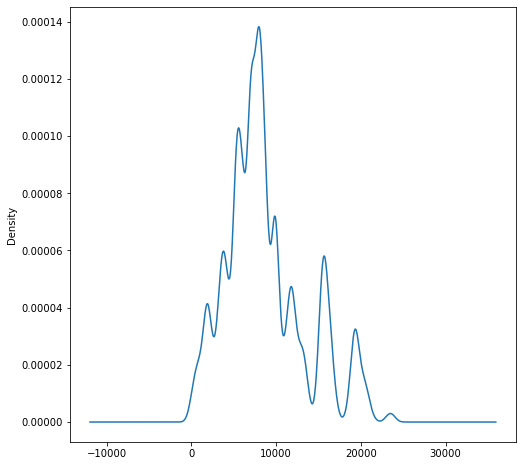

In [ ]:
FemaleData["Purchase"].plot(kind = "kde")

In [ ]:
print("\033[1mIQR Analysis for Female \033[0m")
IQRAnalysis(FemaleData['Purchase'])

IQR Analysis for Female 
Q1:  5433.0
Q3:  11400.0
Mean:  8734.57
Median:  7914.0
Mode:  0    7108
dtype: int64
IQR:  5967.0
Maximum Purchase Excluding Outlier:  20350.5
Minimum Purchase Excluding Outlier:  -3517.5


Purchase Analysis for Female Customers  



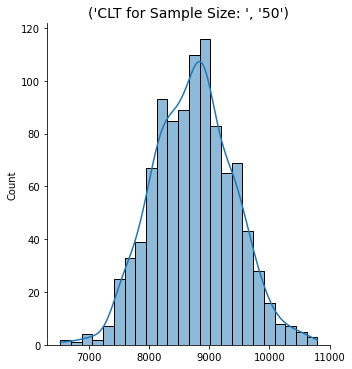

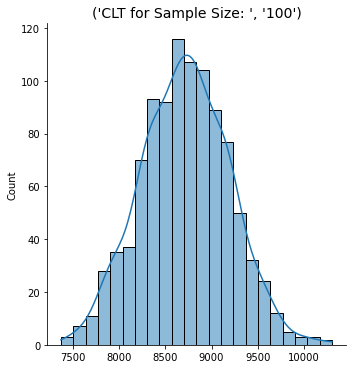

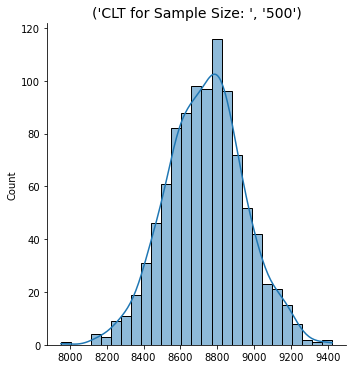

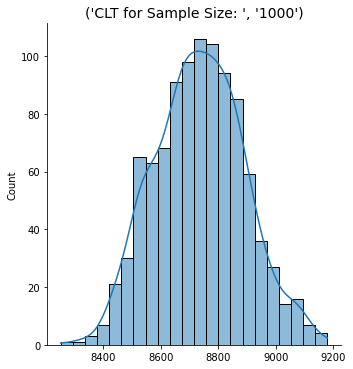

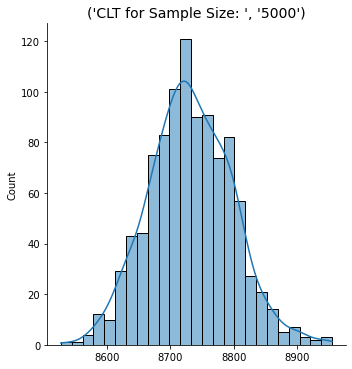

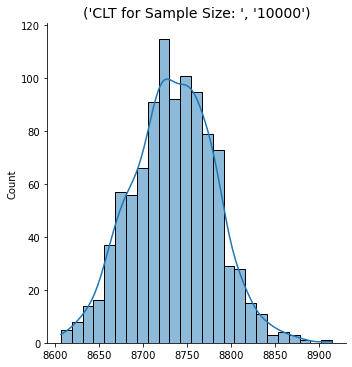

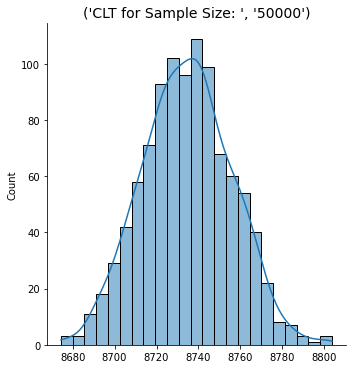

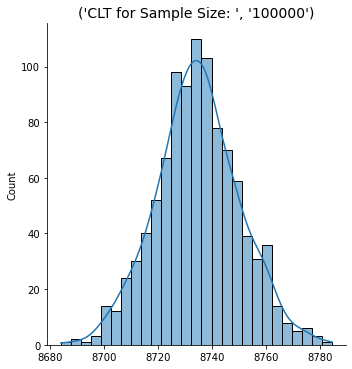

In [ ]:
print('\033[1mPurchase Analysis for Female Customers  \033[0m')
print()
for x in sample_sizeArray:
    simulate_clt(FemaleData['Purchase'], x)

Purchase Analysis for Female Customers  



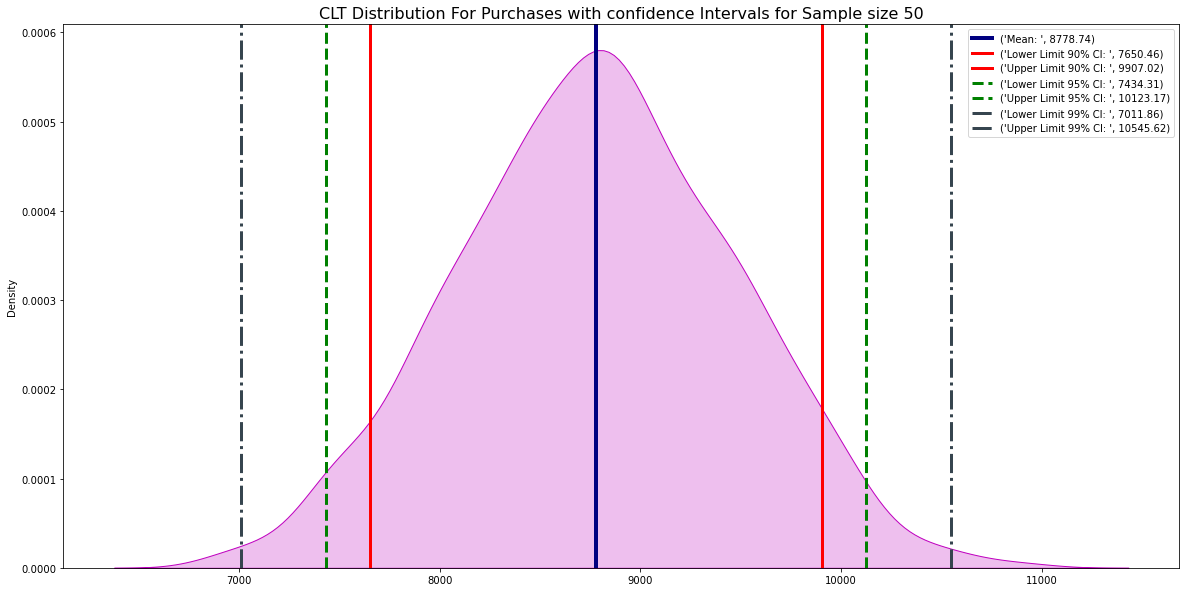


------------------------------------------------------------------------------------------------------------------------


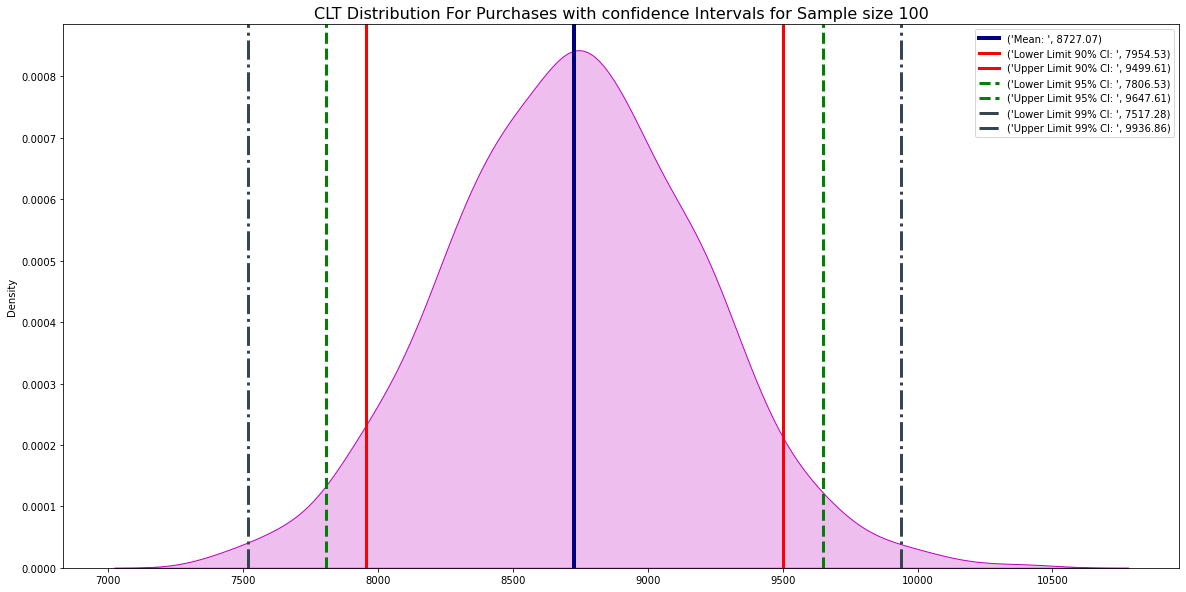


------------------------------------------------------------------------------------------------------------------------


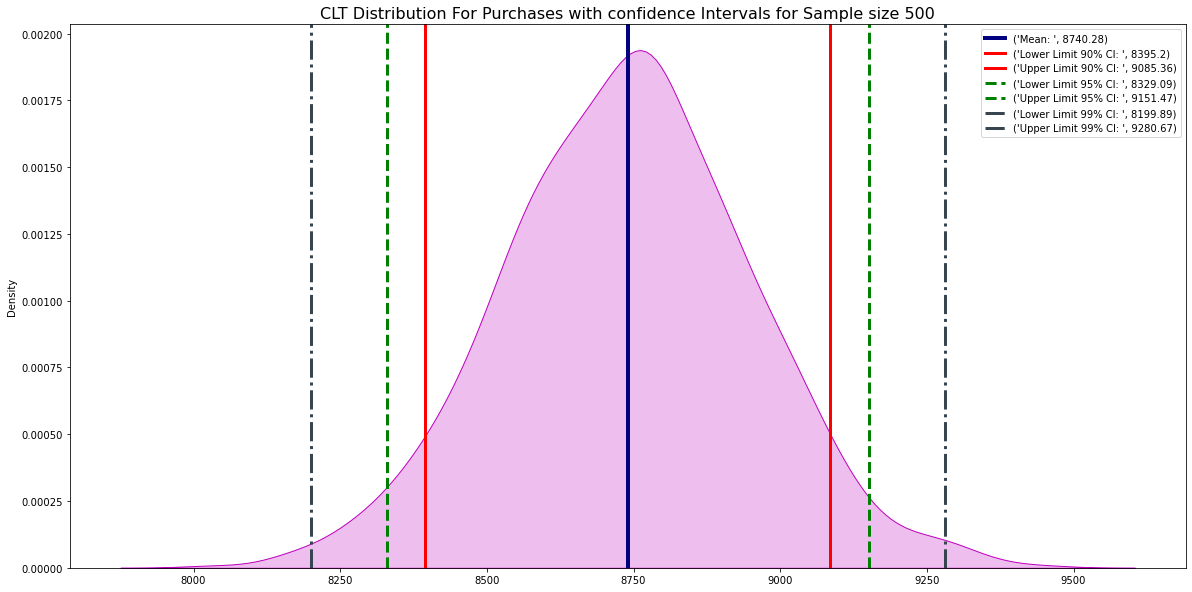


------------------------------------------------------------------------------------------------------------------------


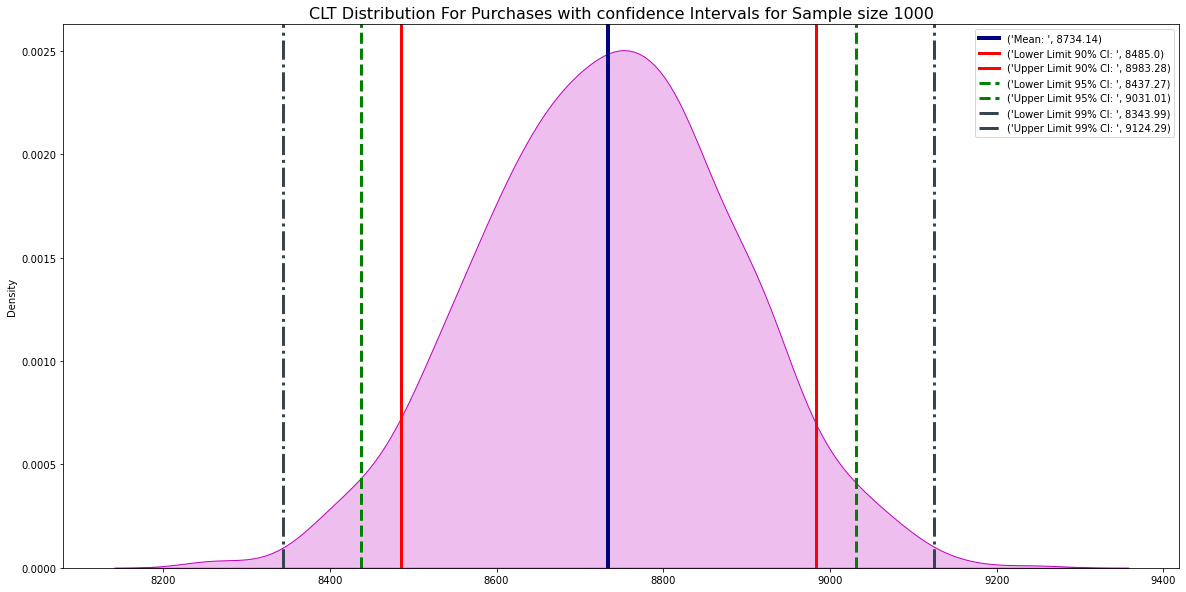


------------------------------------------------------------------------------------------------------------------------


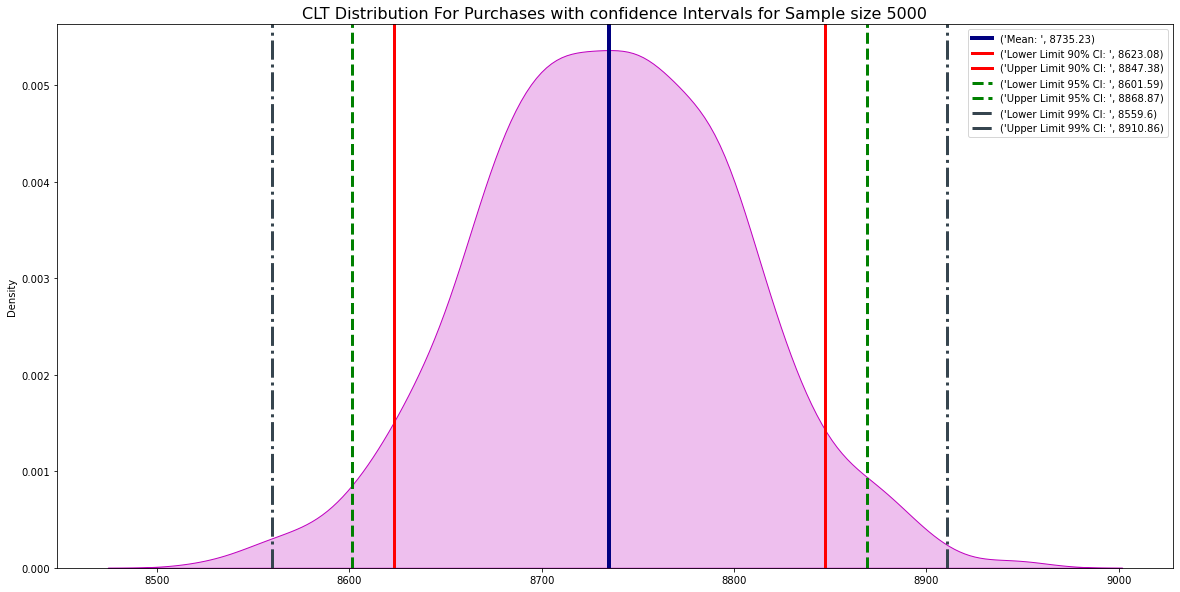


------------------------------------------------------------------------------------------------------------------------


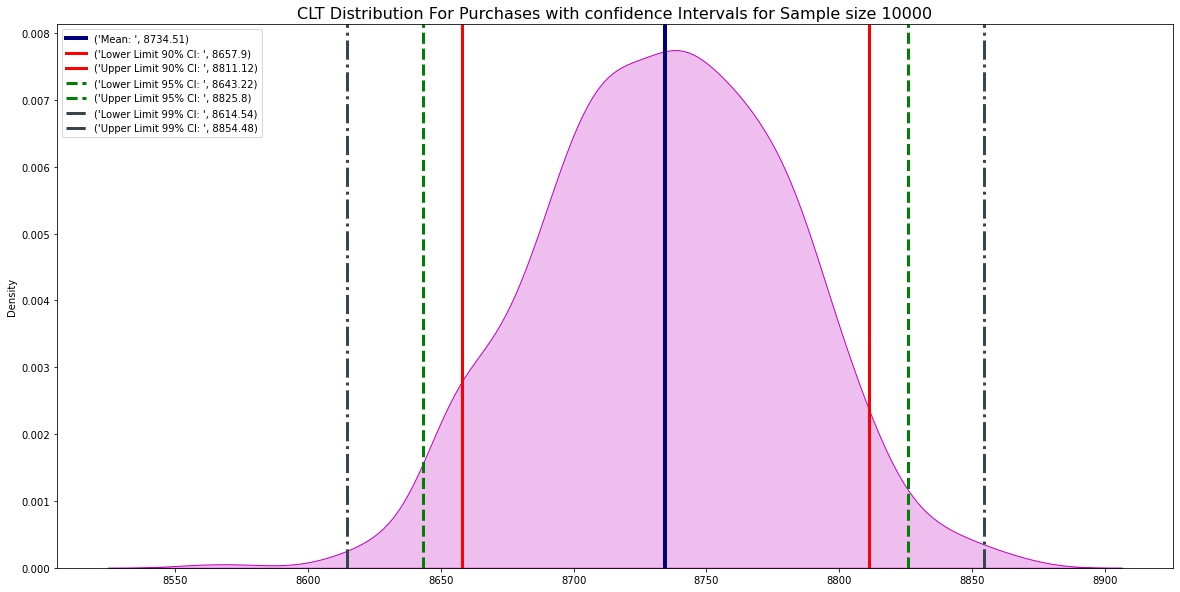


------------------------------------------------------------------------------------------------------------------------


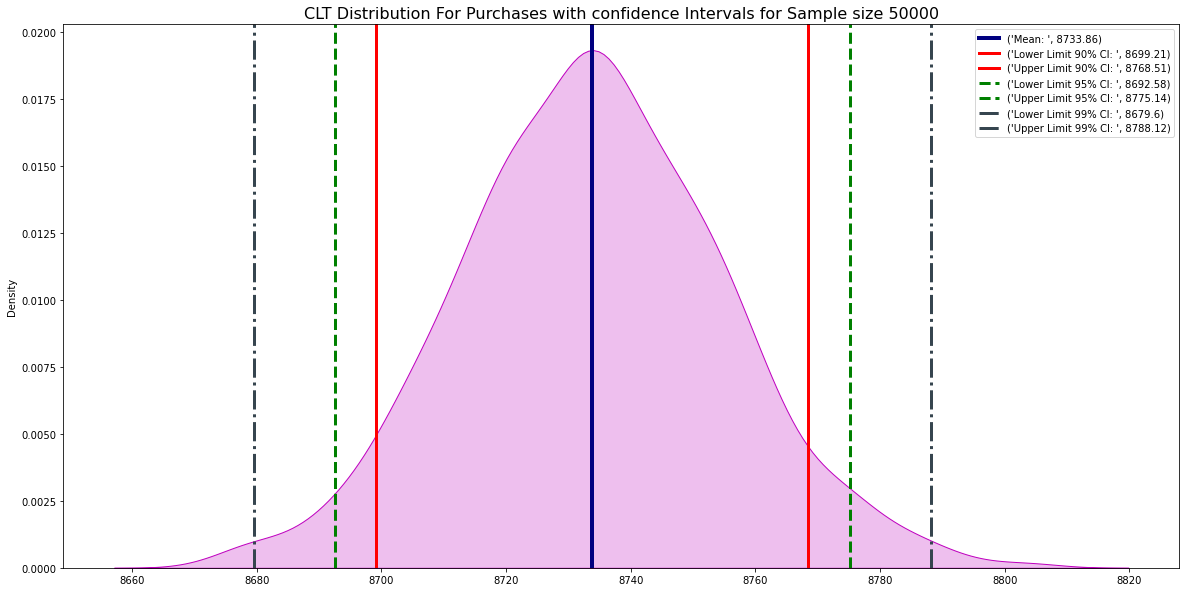


------------------------------------------------------------------------------------------------------------------------


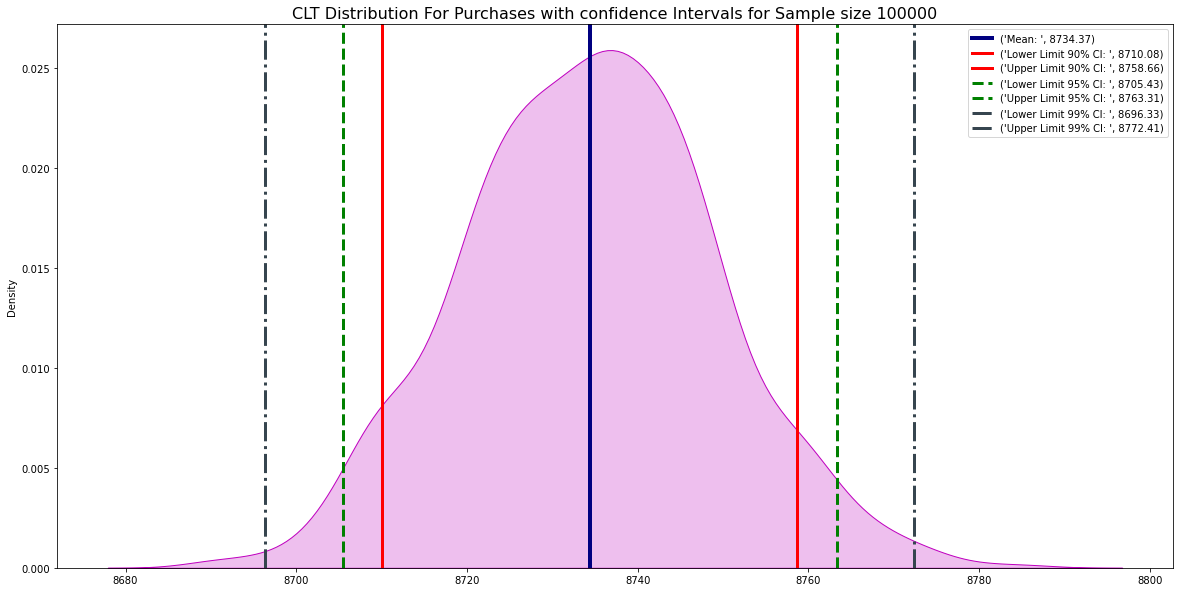


------------------------------------------------------------------------------------------------------------------------


In [ ]:
print('\033[1mPurchase Analysis for Female Customers  \033[0m')
print()
for x in sample_sizeArray:
    plotCofidenceIntervalAll(FemaleData['Purchase'], x)
    print()
    print("------------------------------------------------------------------------------------------------------------------------")

In [ ]:
print('\033[1mPurchase Analysis for Female Customers  \033[0m')
print()
for x in sample_sizeArray:
    CIUsingIQRMethod(FemaleData['Purchase'], x)
    print()
    print("------------------------------------------------------------------------------------------------------------------------")

Purchase Analysis for Female Customers  

90 Percent Confidence Interval for Given data with 50 Sample size is [7541.239 9837.092]
95 Percent Confidence Interval for Given data with 50 Sample size is [ 7379.37  10029.151]
99 Percent Confidence Interval for Given data with 50 Sample size is [ 7120.7876 10419.4863]

------------------------------------------------------------------------------------------------------------------------
90 Percent Confidence Interval for Given data with 100 Sample size is [7985.166 9554.835]
95 Percent Confidence Interval for Given data with 100 Sample size is [7840.9395 9651.5655]
99 Percent Confidence Interval for Given data with 100 Sample size is [7599.3316 9936.7545]

------------------------------------------------------------------------------------------------------------------------
90 Percent Confidence Interval for Given data with 500 Sample size is [8385.4623 9088.1706]
95 Percent Confidence Interval for Given data with 500 Sample size is [8330

1. As the sample size increases, We can see the difference between previous and current lower range and Upper range started decreasing which means it is stabalizing, as sample size increases variance decreases
2. For Female (sample size 100000) range for mean purchase with
  1. confidence interval 90% is [8709.64 , 8759.64]
  2. confidence interval 95% is [8703.46 , 8764.35]
  3. confidence interval 99% is [8693.72 ,  8774.83]

In [ ]:
def maleFemalePurchaseComparison(sample_size):
    mean1 = []
    for i in range(1000):
        mean1.append(MaleData['Purchase'].sample(sample_size , replace = True).mean())
    sampleMean = np.round(np.mean(mean1), 2)
    alpha90 = (1 - 0.90)/2
    z_cr90 = stats.norm.ppf(1 - alpha90)
    std_dev90 = z_cr90 * np.std(mean1)
    confidence_interval90 = [sampleMean - std_dev90 , sampleMean + std_dev90]
    alpha95 = (1 - 0.95)/2
    z_cr95 = stats.norm.ppf(1 - alpha95)
    std_dev95 = z_cr95 * np.std(mean1)
    confidence_interval95 = [sampleMean - std_dev95 , sampleMean + std_dev95]
    alpha99 = (1 - 0.99)/2
    z_cr99 = stats.norm.ppf(1 - alpha99)
    std_dev99 = z_cr99 * np.std(mean1)
    confidence_interval99 = [sampleMean - std_dev99 , sampleMean + std_dev99]
    plt.figure(figsize=(20,10))
    sns.kdeplot(pd.Series(mean1), color = "#00FFFF", fill = True )
    plt.axvline(sampleMean, label = ("Mean for male: ", sampleMean), color = "navy", linewidth = 3)
    plt.axvline(confidence_interval90[0], color = "r",linewidth = 2, linestyle = "solid", label =("Lower Limit 90% CI for Male: ", np.round(confidence_interval90[0], 2)))
    plt.axvline(confidence_interval90[1], color = "r", linewidth = 2, linestyle = "solid", label = ("Upper Limit 90% CI for Male: ", np.round(confidence_interval90[1], 2)))
    plt.axvline(confidence_interval95[0], color = "g",linewidth = 2, linestyle = "solid", label =("Lower Limit 95% CI for Male: ", np.round(confidence_interval95[0], 2)))
    plt.axvline(confidence_interval95[1], color = "g", linewidth = 2, linestyle = "solid", label = ("Upper Limit 95% CI for Male: ", np.round(confidence_interval95[1], 2)))
    plt.axvline(confidence_interval99[0], color = "#36454f", linewidth = 2, linestyle = "solid",  label =("Lower Limit 99% CI for Male: ", np.round(confidence_interval99[0], 2)))
    plt.axvline(confidence_interval99[1], color = "#36454f", linewidth = 2, linestyle = "solid", label = ("Upper Limit 99% CI for Male: ", np.round(confidence_interval99[1], 2)))

    mean2 = []
    for i in range(1000):
        mean2.append(FemaleData['Purchase'].sample(sample_size , replace = True).mean())
    sampleMean2 = np.round(np.mean(mean2), 2)
    alpha902 = (1 - 0.90)/2
    z_cr902 = stats.norm.ppf(1 - alpha902)
    std_dev902 = z_cr902 * np.std(mean2)
    confidence_interval902 = [sampleMean2 - std_dev902 , sampleMean2 + std_dev902]
    alpha952 = (1 - 0.95)/2
    z_cr952 = stats.norm.ppf(1 - alpha952)
    std_dev952 = z_cr952 * np.std(mean2)
    confidence_interval952 = [sampleMean2 - std_dev952 , sampleMean2 + std_dev952]
    alpha992 = (1 - 0.99)/2
    z_cr992 = stats.norm.ppf(1 - alpha992)
    std_dev992 = z_cr992 * np.std(mean2)
    confidence_interval992 = [sampleMean2 - std_dev992 , sampleMean2 + std_dev992]
    sns.kdeplot(pd.Series(mean2), color = "g", fill = True )
    plt.axvline(sampleMean2, label = ("Mean for Female: ", sampleMean2), color = "navy", linewidth = 3, linestyle = "--")
    plt.axvline(confidence_interval902[0], color = "r",linewidth = 2, linestyle = "--", label =("Lower Limit 90% CI for female: ", np.round(confidence_interval902[0], 2)))
    plt.axvline(confidence_interval902[1], color = "r", linewidth = 2, linestyle ="--", label = ("Upper Limit 90% CI for female: ", np.round(confidence_interval902[1], 2)))
    plt.axvline(confidence_interval952[0], color = "g",linewidth = 2, linestyle = "--", label =("Lower Limit 95% CI for female: ", np.round(confidence_interval952[0], 2)))
    plt.axvline(confidence_interval952[1], color = "g", linewidth = 2, linestyle ="--", label = ("Upper Limit 95% CI for female: ", np.round(confidence_interval952[1], 2)))
    plt.axvline(confidence_interval992[0], color = "#36454f",linewidth = 2, linestyle = "--", label =("Lower Limit 99% CI for female: ", np.round(confidence_interval992[0], 2)))
    plt.axvline(confidence_interval992[1], color = "#36454f", linewidth = 2, linestyle ="--", label = ("Upper Limit 99% CI for female: ", np.round(confidence_interval992[1], 2)))

    plt.legend(loc = 'best')
    plt.title("Male And Female Comparison for Purchases")
    plt.show()

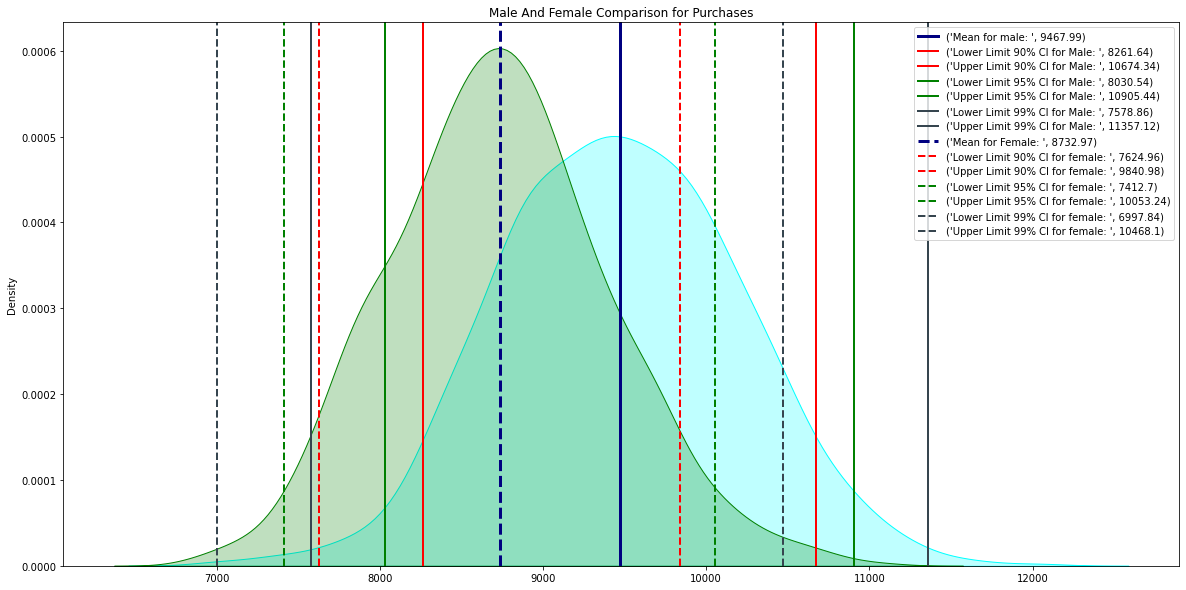

Sample size:  50
-----------------------------------------------------------------------------------------------------------------------------


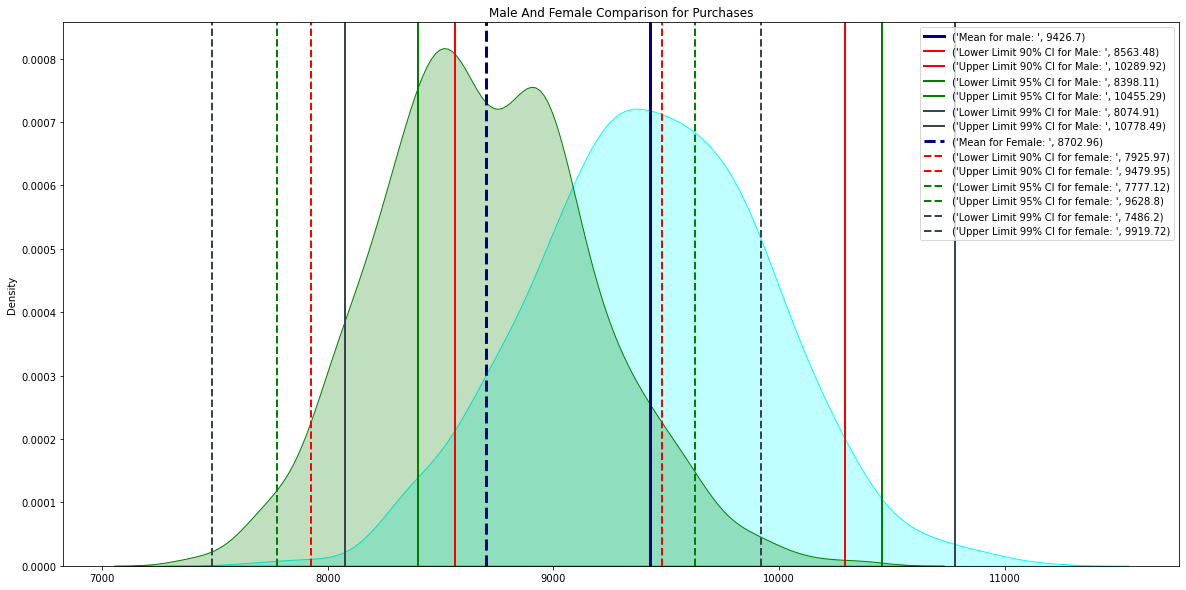

Sample size:  100
-----------------------------------------------------------------------------------------------------------------------------


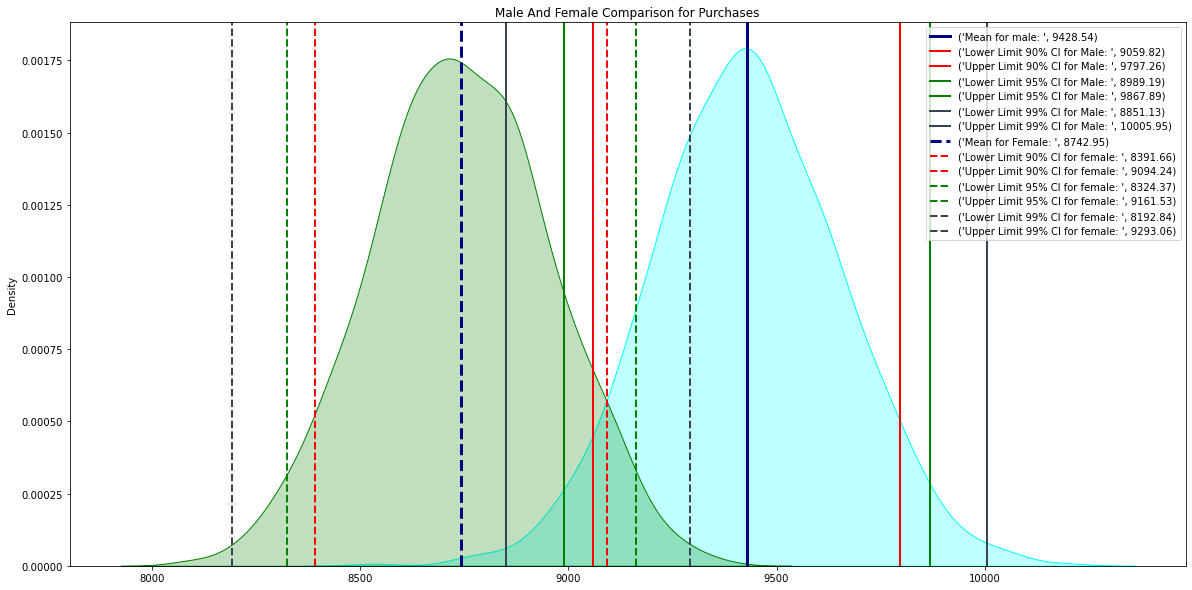

Sample size:  500
-----------------------------------------------------------------------------------------------------------------------------


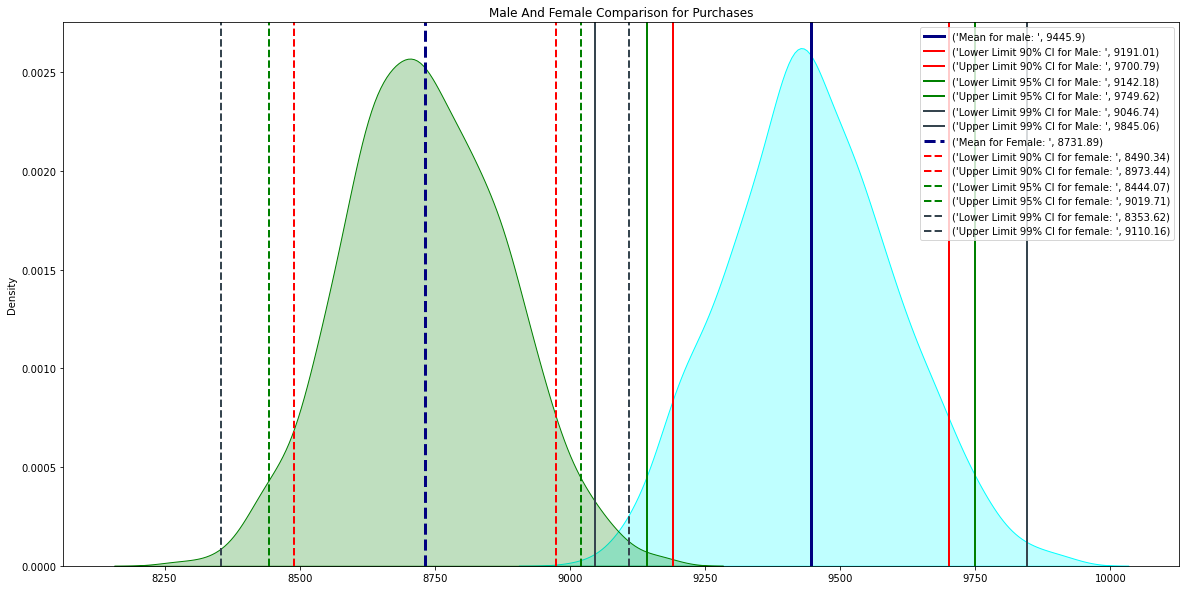

Sample size:  1000
-----------------------------------------------------------------------------------------------------------------------------


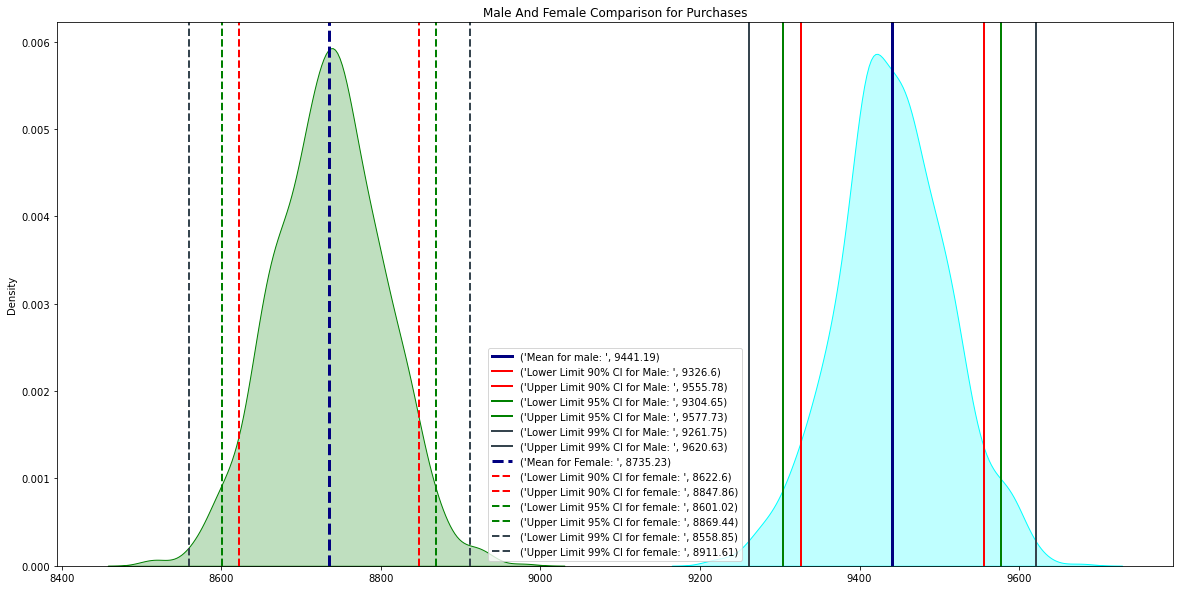

Sample size:  5000
-----------------------------------------------------------------------------------------------------------------------------


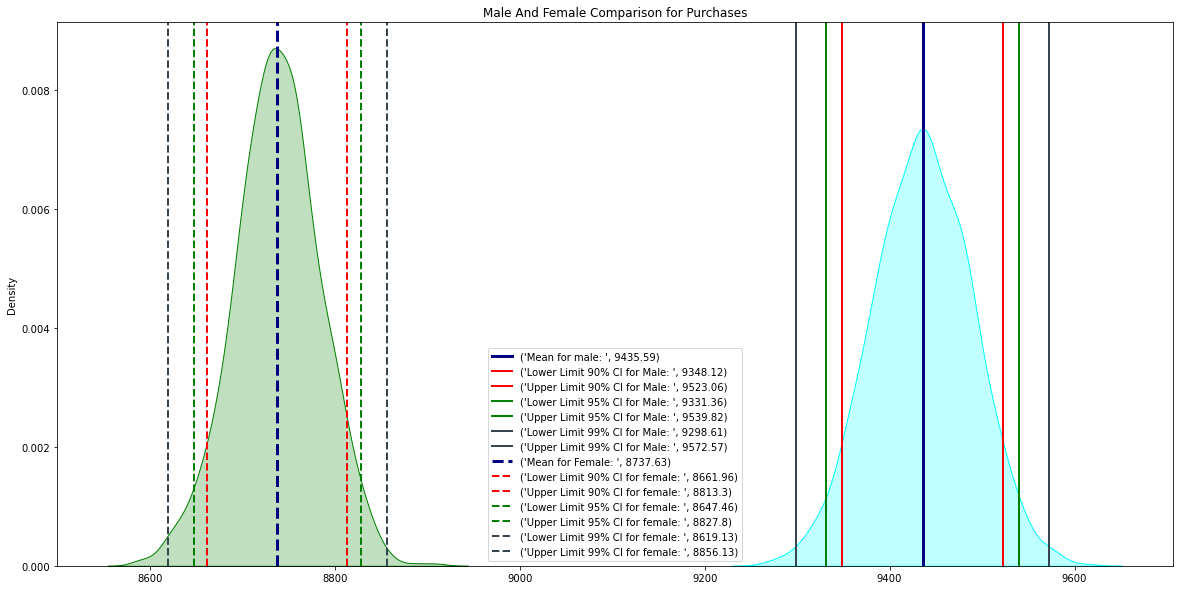

Sample size:  10000
-----------------------------------------------------------------------------------------------------------------------------


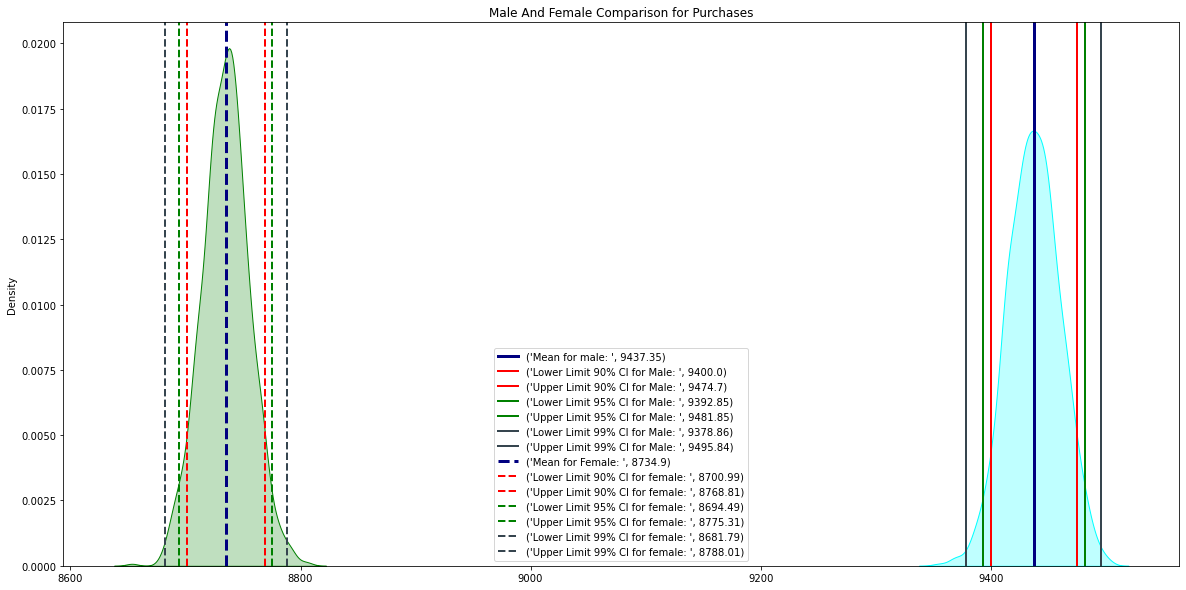

Sample size:  50000
-----------------------------------------------------------------------------------------------------------------------------


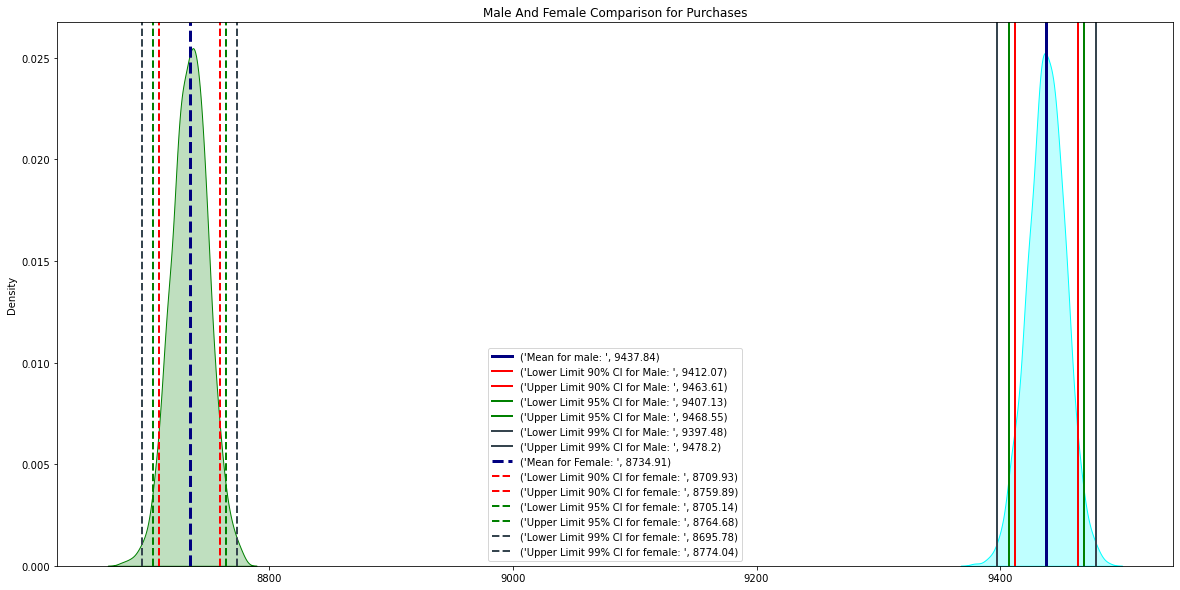

Sample size:  100000
-----------------------------------------------------------------------------------------------------------------------------


In [ ]:
for x in sample_sizeArray:
    maleFemalePurchaseComparison(x)
    print("Sample size: ", x)
    print("-----------------------------------------------------------------------------------------------------------------------------")

As sample size increases the two plots(For Male and Female) started to become distinct With Confidence level as mentioned in the image

### Recommendation
From the observations female customers spend less than males on average, so Walmart need to give attention on increasing sale from female customers. They can run campaigns for female customers, can give special discounts for them and also Provide some offers which gives free gifts.

## Married vs Unmarried Purchases

In [ ]:
data.groupby('Marital_Status')['Purchase'].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
0               324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
1               225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                    75%      max  
Marital_Status                    
0               12061.0  23961.0  
1               12042.0  23961.0

In [ ]:
UnmarriedData = data[data['Marital_Status'] == 0]

In [ ]:
UnmarriedData.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2              0                3      8370  
1                          2              0                1     15200  
2                          2              0               12      1422  
3                          2              0               12      1057  
4                         4+              0                8      7969

In [ ]:
UnmarriedData['Purchase'].describe()

count    324731.000000
mean       9265.907619
std        5027.347859
min          12.000000
25%        5605.000000
50%        8044.000000
75%       12061.000000
max       23961.000000
Name: Purchase, dtype: float64

<AxesSubplot:ylabel='Density'>

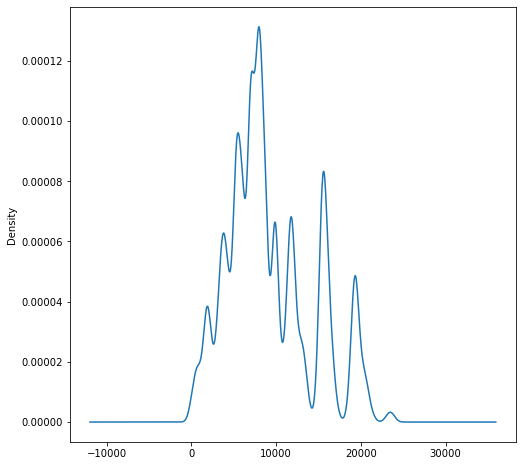

In [ ]:
UnmarriedData["Purchase"].plot(kind = "kde")

In [ ]:
print("\033[1mIQR Analysis for Unmarried \033[0m")
IQRAnalysis(UnmarriedData['Purchase'])

IQR Analysis for Unmarried 
Q1:  5605.0
Q3:  12061.0
Mean:  9265.91
Median:  8044.0
Mode:  0    7159
dtype: int64
IQR:  6456.0
Maximum Purchase Excluding Outlier:  21745.0
Minimum Purchase Excluding Outlier:  -4079.0


Purchase Analysis for Unmarried Customers  



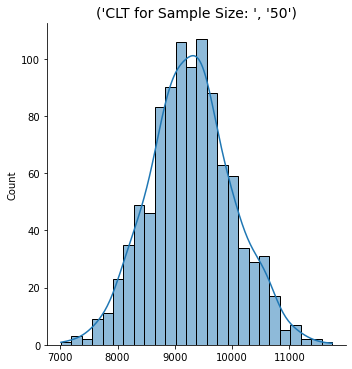

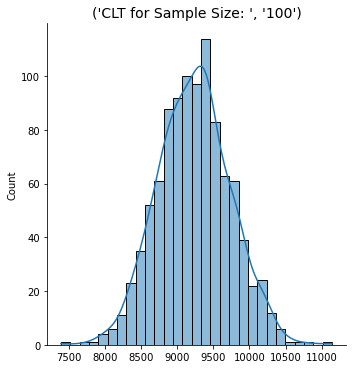

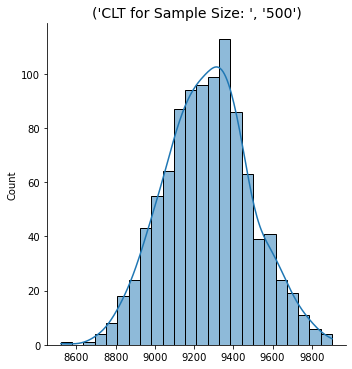

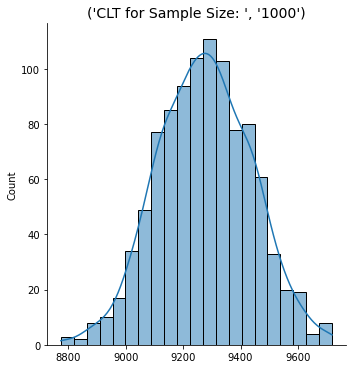

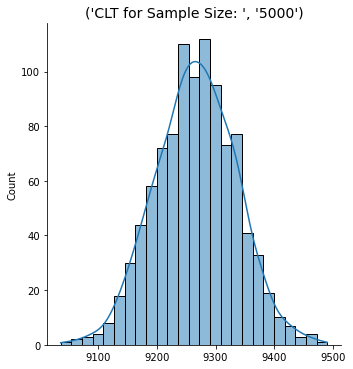

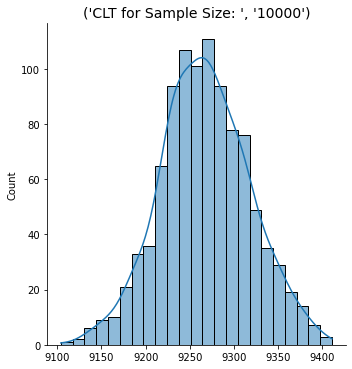

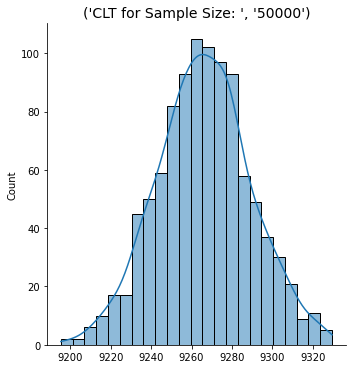

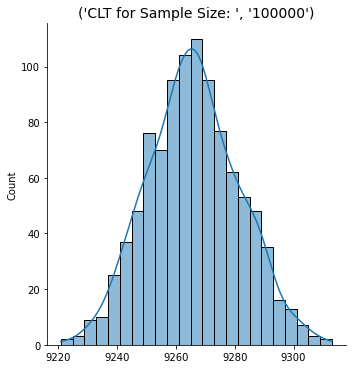

In [ ]:
print('\033[1mPurchase Analysis for Unmarried Customers  \033[0m')
print()
for x in sample_sizeArray:
    simulate_clt(UnmarriedData['Purchase'], x)

Purchase Analysis for Unmarried Customers  



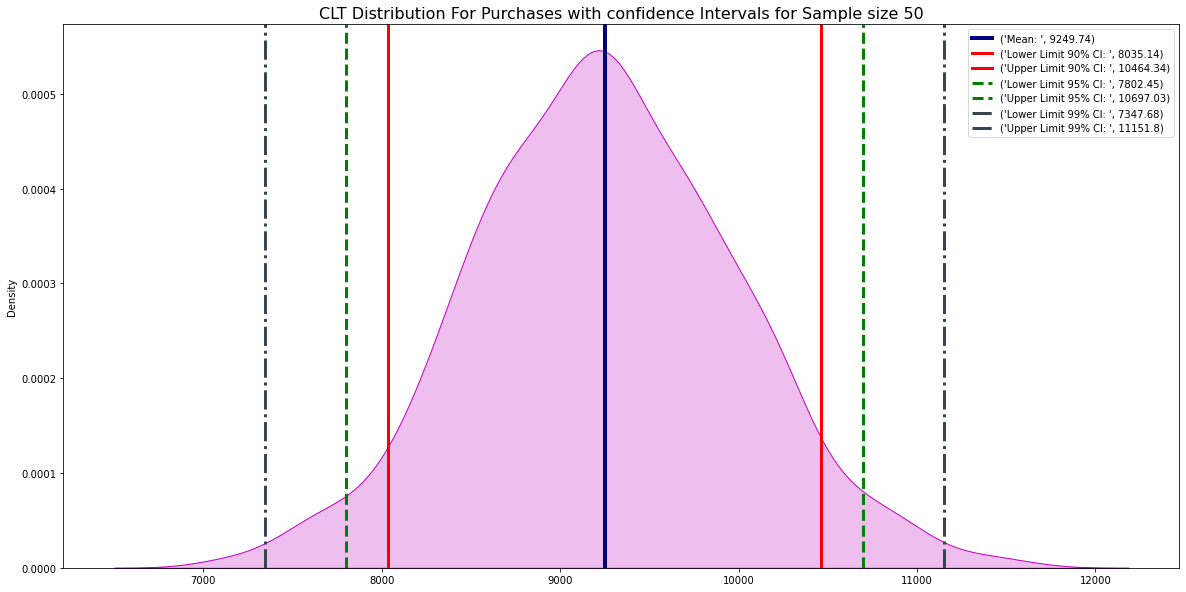


------------------------------------------------------------------------------------------------------------------------


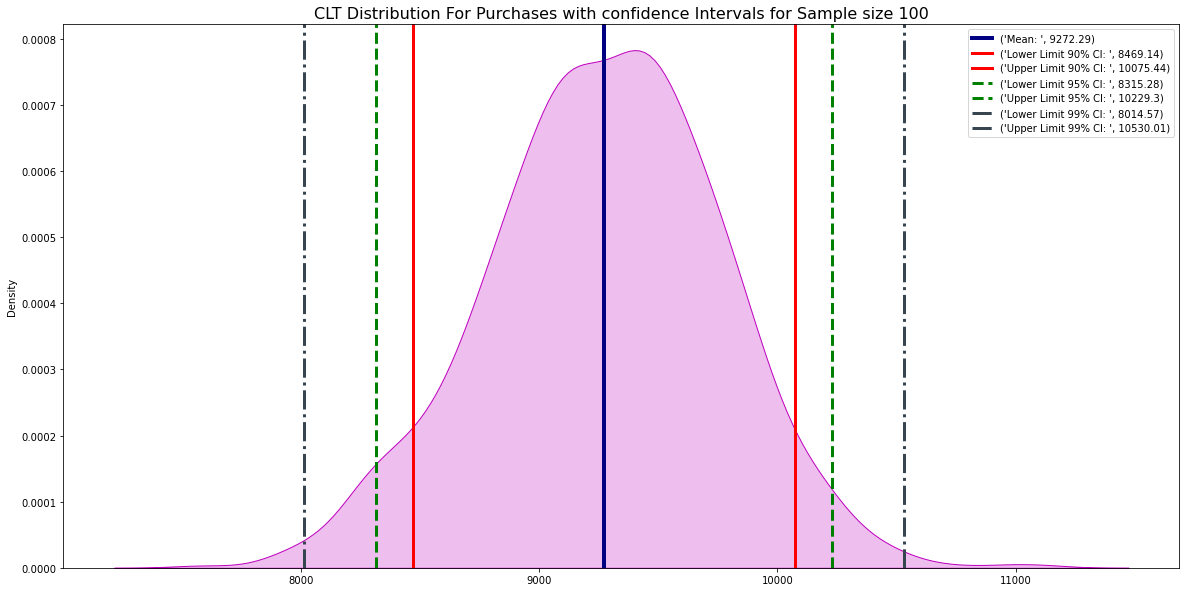


------------------------------------------------------------------------------------------------------------------------


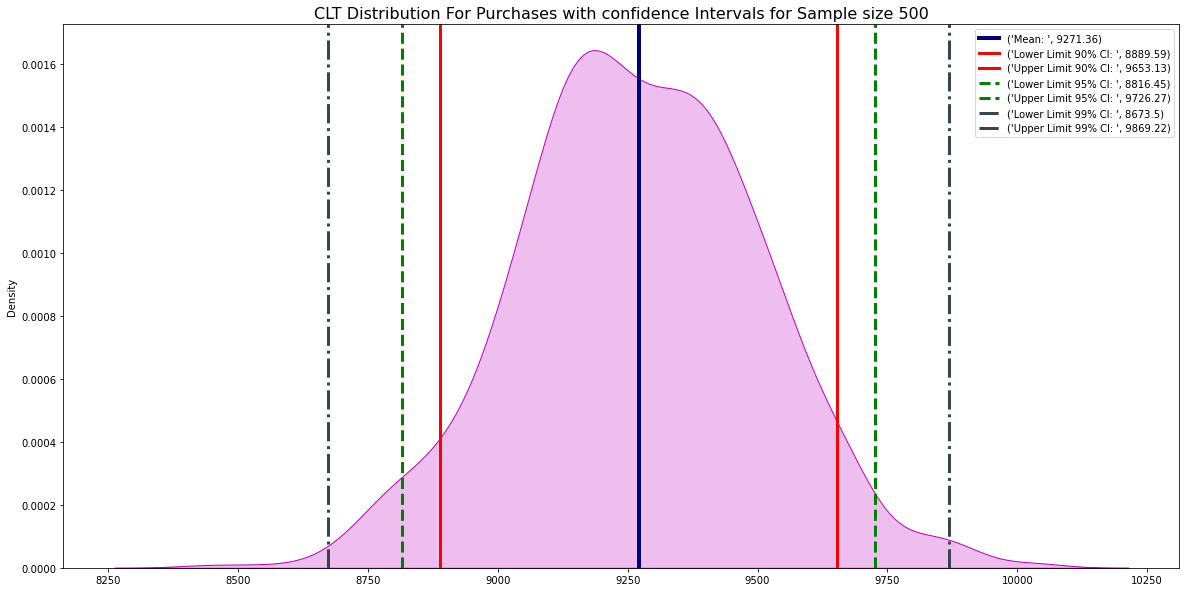


------------------------------------------------------------------------------------------------------------------------


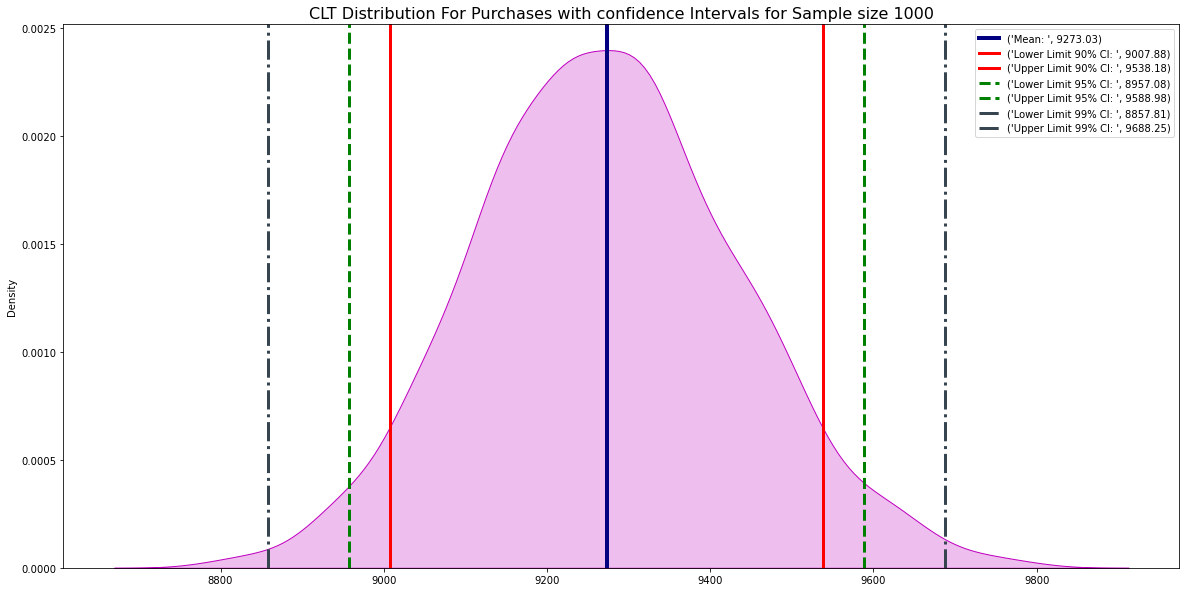


------------------------------------------------------------------------------------------------------------------------


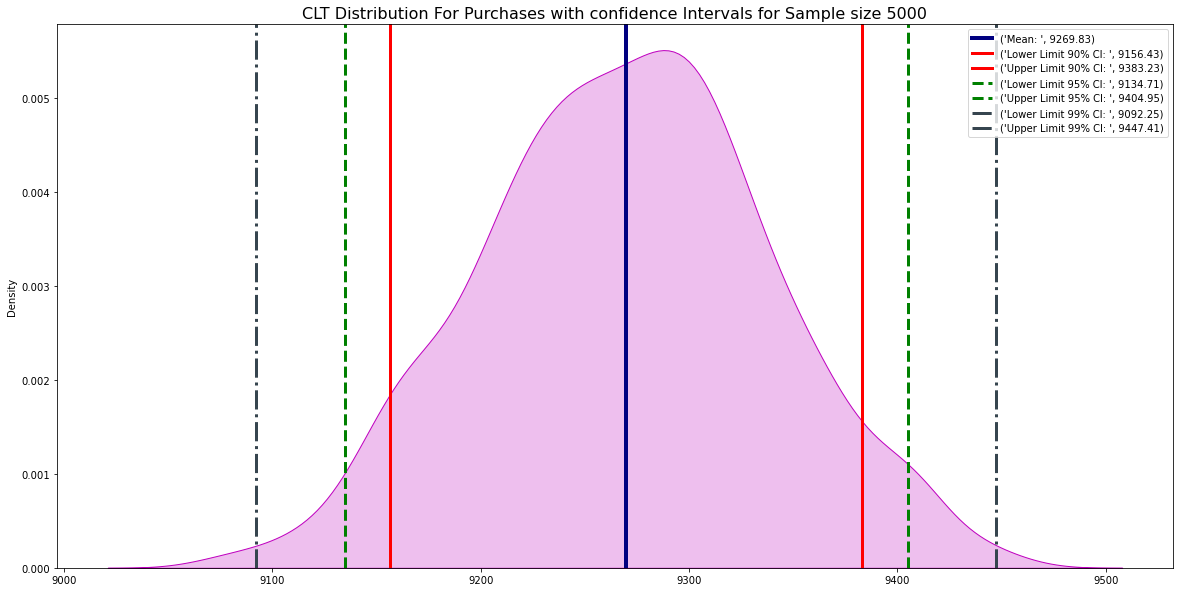


------------------------------------------------------------------------------------------------------------------------


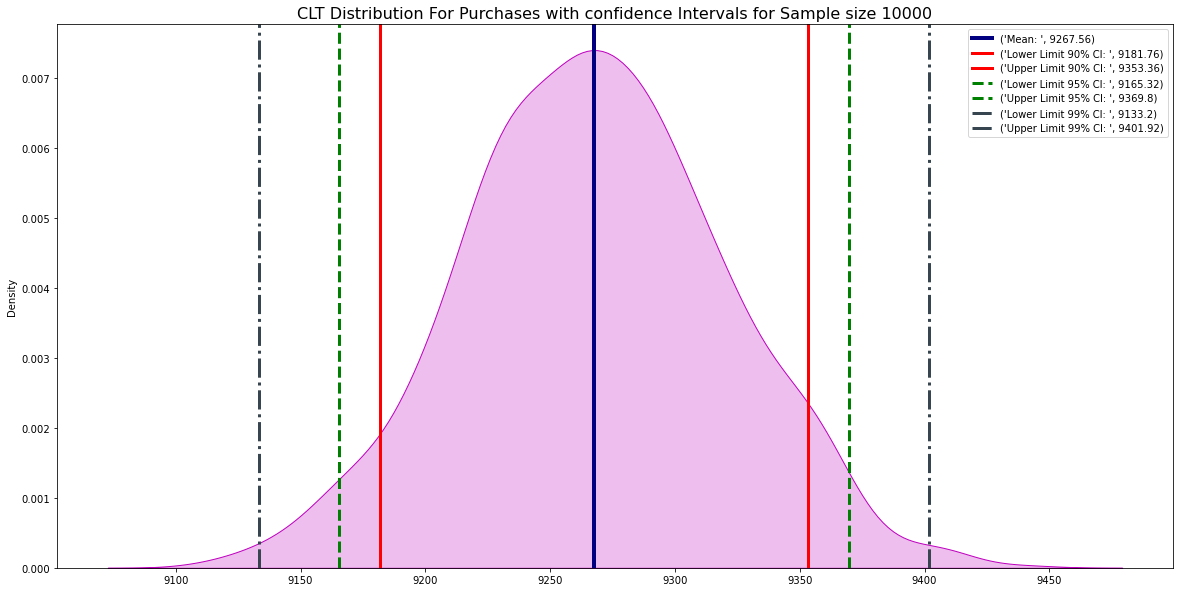


------------------------------------------------------------------------------------------------------------------------


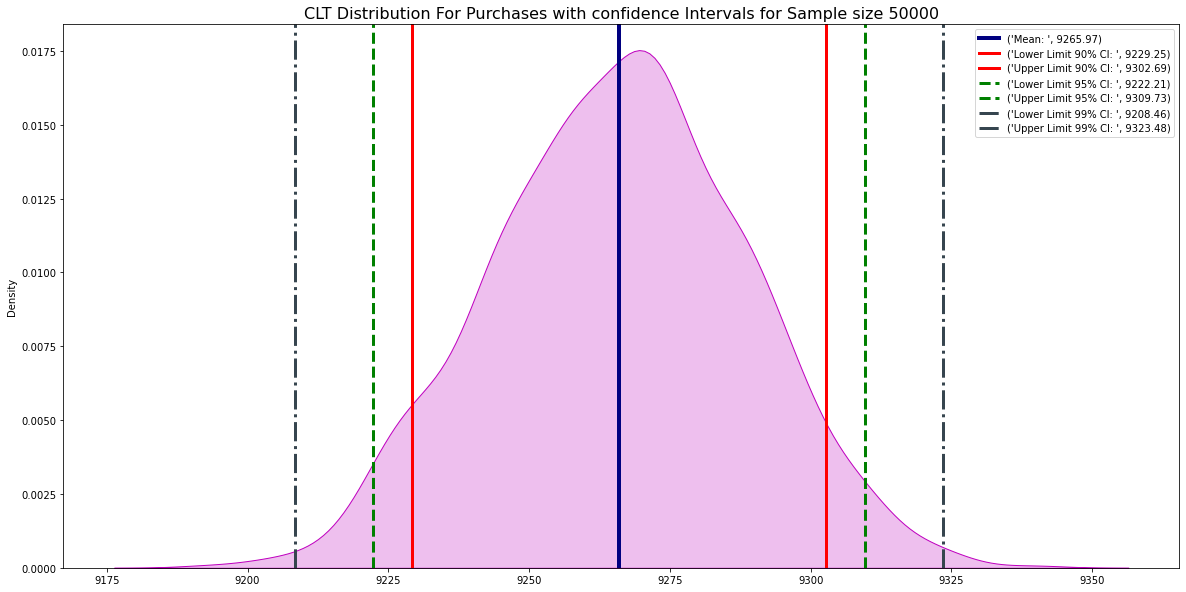


------------------------------------------------------------------------------------------------------------------------


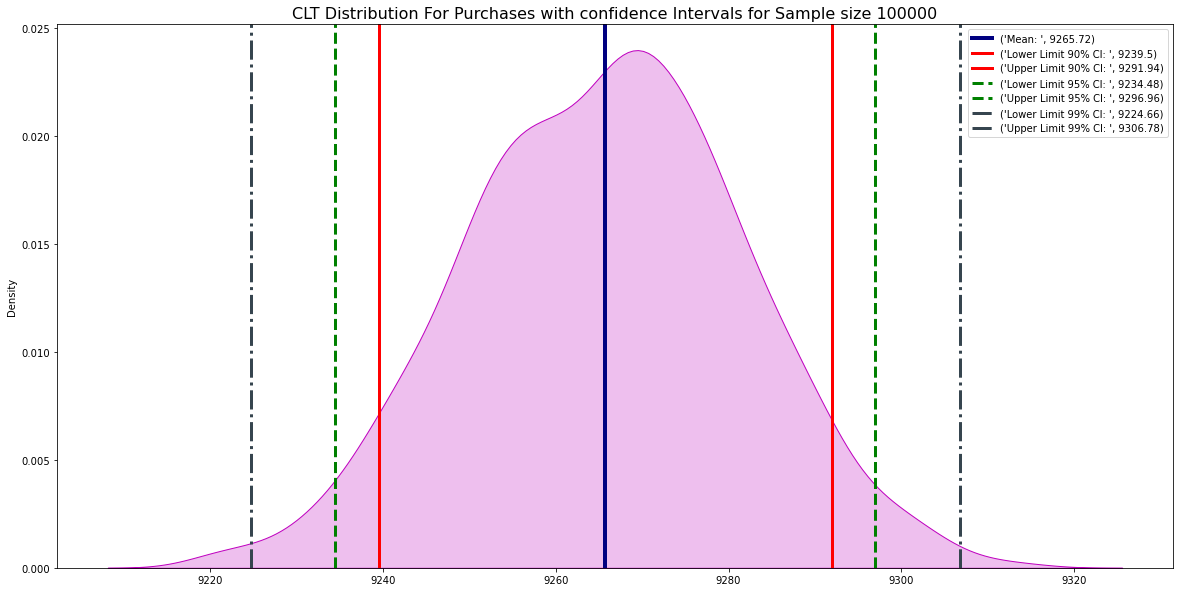


------------------------------------------------------------------------------------------------------------------------


In [ ]:
print('\033[1mPurchase Analysis for Unmarried Customers  \033[0m')
print()
for x in sample_sizeArray:
    plotCofidenceIntervalAll(UnmarriedData['Purchase'], x)
    print()
    print("------------------------------------------------------------------------------------------------------------------------")

In [ ]:
print('\033[1mPurchase Analysis for Unmarried Customers  \033[0m')
print()
for x in sample_sizeArray:
    CIUsingIQRMethod(UnmarriedData['Purchase'], x)
    print()
    print("------------------------------------------------------------------------------------------------------------------------")

Purchase Analysis for Unmarried Customers  

90 Percent Confidence Interval for Given data with 50 Sample size is [ 8100.714 10523.287]
95 Percent Confidence Interval for Given data with 50 Sample size is [ 7940.058 10765.185]
99 Percent Confidence Interval for Given data with 50 Sample size is [ 7544.2307 11235.6237]

------------------------------------------------------------------------------------------------------------------------
90 Percent Confidence Interval for Given data with 100 Sample size is [ 8388.755 10078.753]
95 Percent Confidence Interval for Given data with 100 Sample size is [ 8231.34225 10246.48825]
99 Percent Confidence Interval for Given data with 100 Sample size is [ 7870.1835 10649.1362]

------------------------------------------------------------------------------------------------------------------------
90 Percent Confidence Interval for Given data with 500 Sample size is [8909.9048 9636.8547]
95 Percent Confidence Interval for Given data with 500 Sample 

1. As the sample size increases, variance decreases
2. For Unmarried (sample size 100000) range for mean purchase with
  1. confidence interval 90% is [9239.52 , 9291.02]
  2. confidence interval 95% is [9234.91 , 9296.32]
  3. confidence interval 99% is [9227.77 , 9306.91]

In [ ]:
MarriedData = data[data['Marital_Status'] == 1]

In [ ]:
MarriedData.head()

User_ID Product_ID Gender    Age  Occupation City_Category  \
6   1000004  P00184942      M  46-50           7             B   
7   1000004  P00346142      M  46-50           7             B   
8   1000004   P0097242      M  46-50           7             B   
9   1000005  P00274942      M  26-35          20             A   
10  1000005  P00251242      M  26-35          20             A   

   Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
6                           2              1                1     19215  
7                           2              1                1     15854  
8                           2              1                1     15686  
9                           1              1                8      7871  
10                          1              1                5      5254

In [ ]:
MarriedData['Purchase'].describe()

count    225337.000000
mean       9261.174574
std        5016.897378
min          12.000000
25%        5843.000000
50%        8051.000000
75%       12042.000000
max       23961.000000
Name: Purchase, dtype: float64

<AxesSubplot:ylabel='Density'>

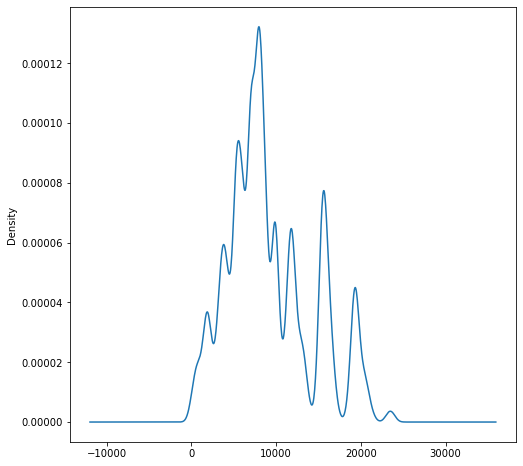

In [ ]:
MarriedData["Purchase"].plot(kind = "kde")

In [ ]:
print("\033[1mIQR Analysis for Married \033[0m")
IQRAnalysis(MarriedData['Purchase'])

IQR Analysis for Married 
Q1:  5843.0
Q3:  12042.0
Mean:  9261.17
Median:  8051.0
Mode:  0    6868
dtype: int64
IQR:  6199.0
Maximum Purchase Excluding Outlier:  21340.5
Minimum Purchase Excluding Outlier:  -3455.5


Purchase Analysis for Married Customers  



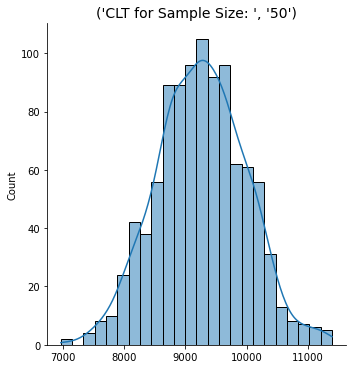

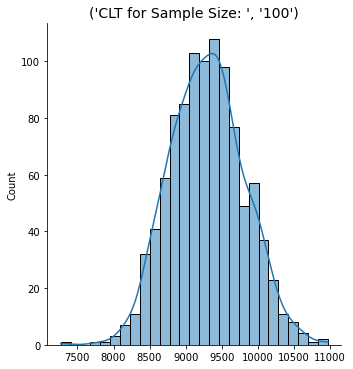

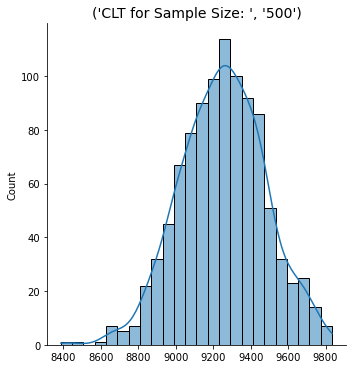

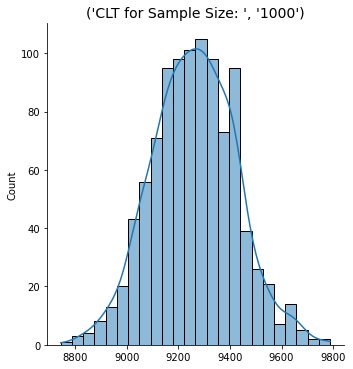

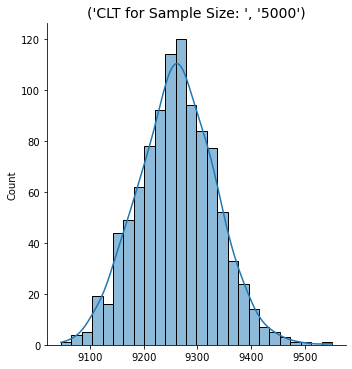

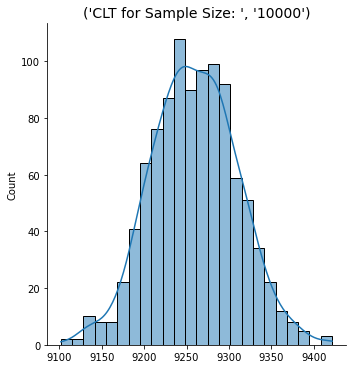

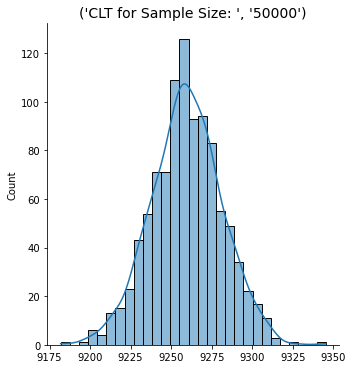

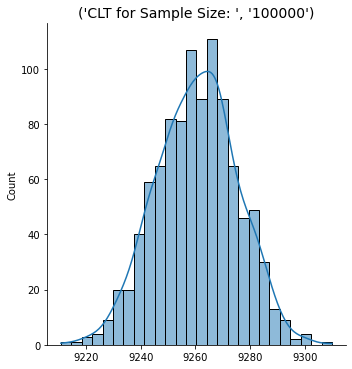

In [ ]:
print('\033[1mPurchase Analysis for Married Customers  \033[0m')
print()
for x in sample_sizeArray:
    simulate_clt(MarriedData['Purchase'], x)

Purchase Analysis for Married Customers  



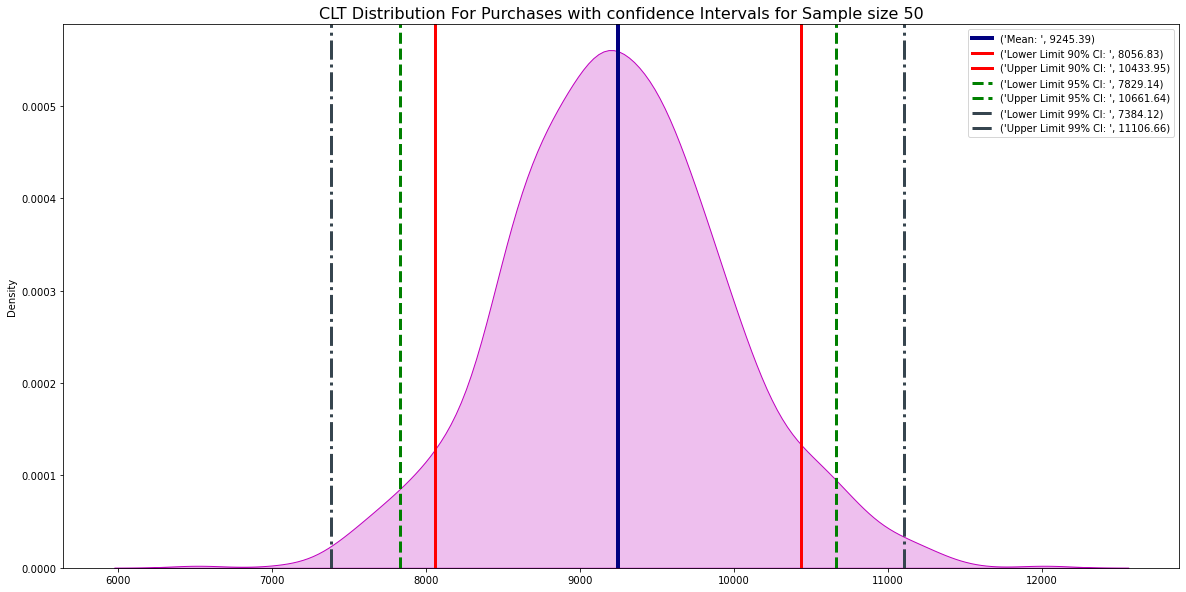


------------------------------------------------------------------------------------------------------------------------


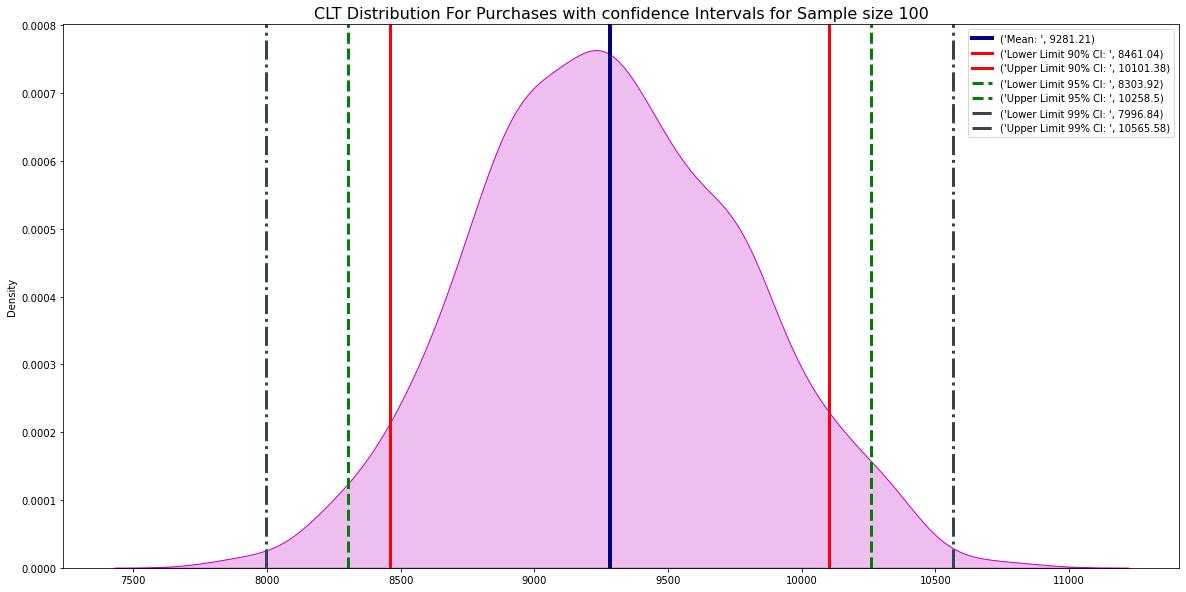


------------------------------------------------------------------------------------------------------------------------


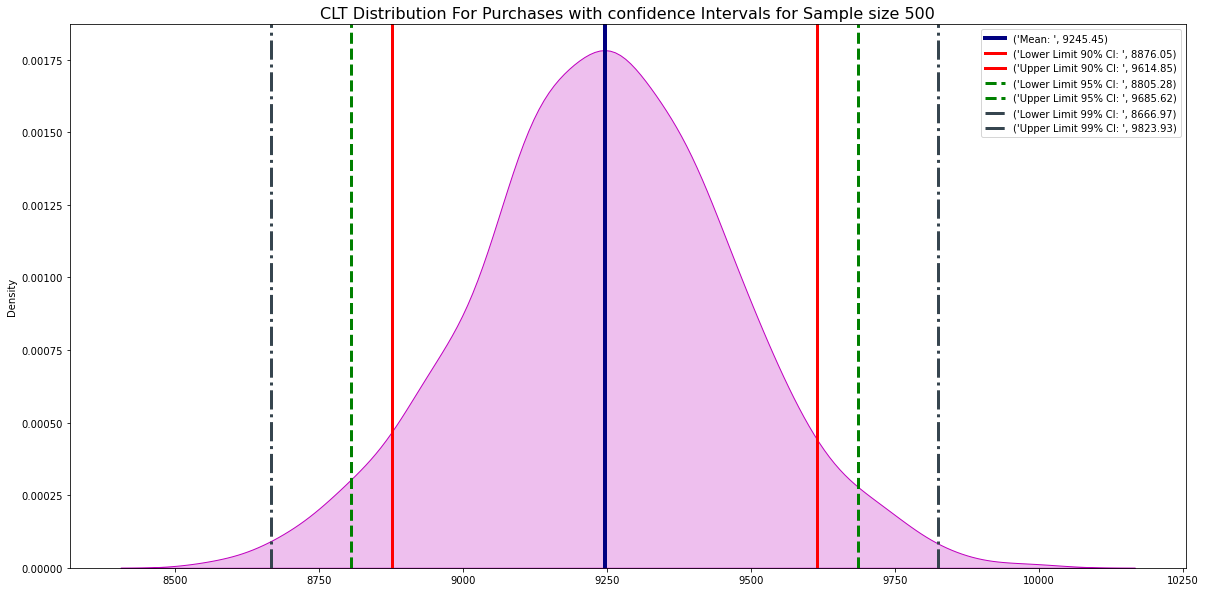


------------------------------------------------------------------------------------------------------------------------


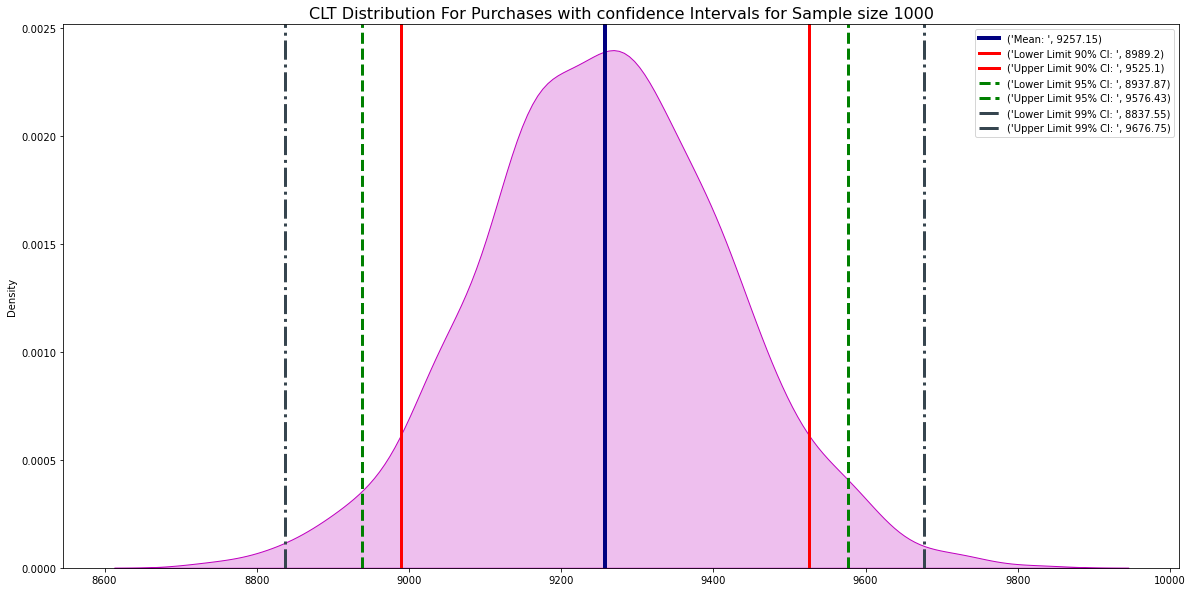


------------------------------------------------------------------------------------------------------------------------


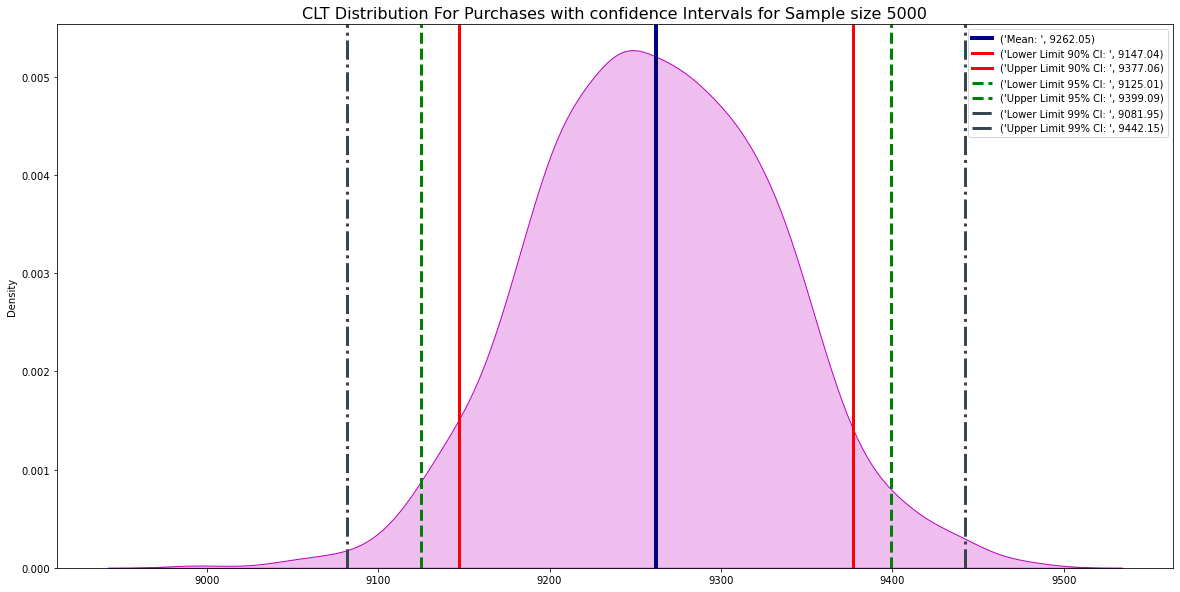


------------------------------------------------------------------------------------------------------------------------


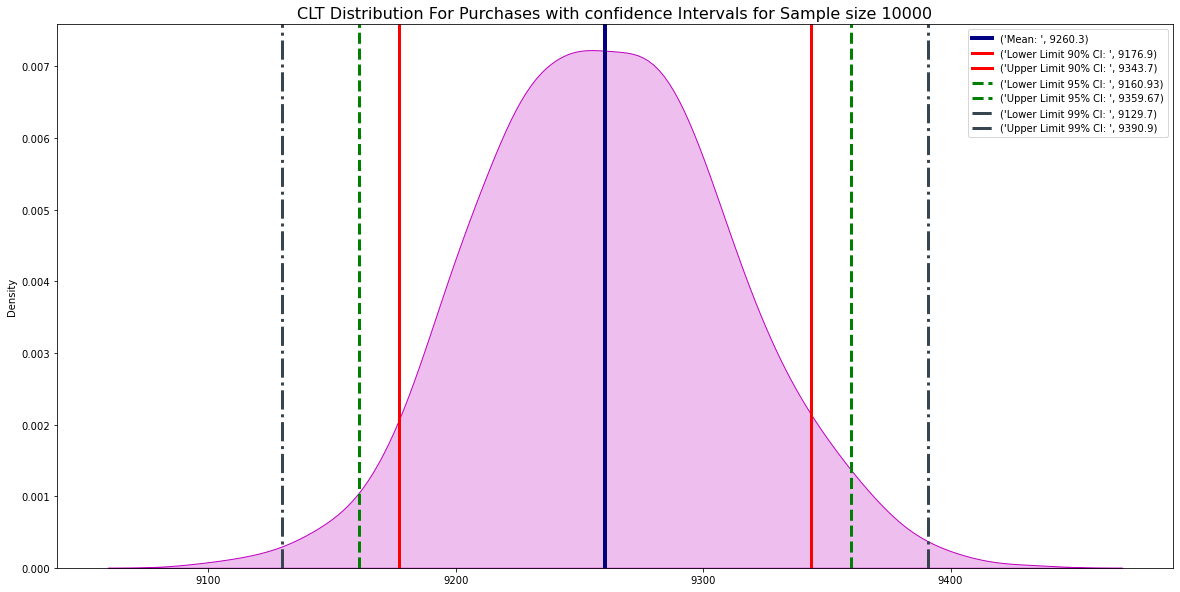


------------------------------------------------------------------------------------------------------------------------


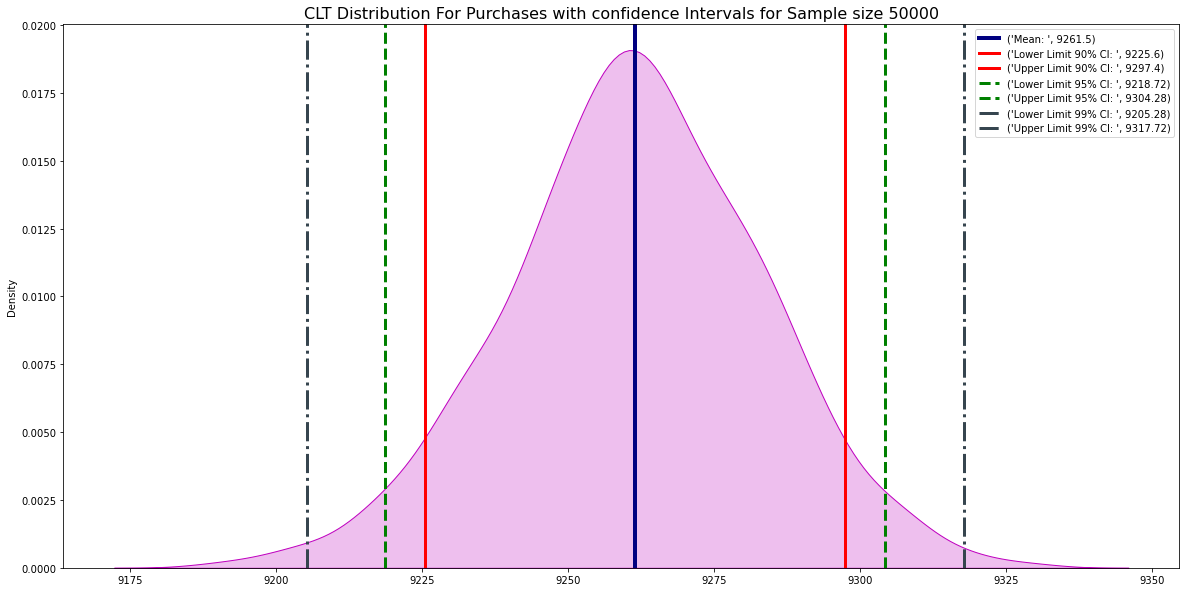


------------------------------------------------------------------------------------------------------------------------


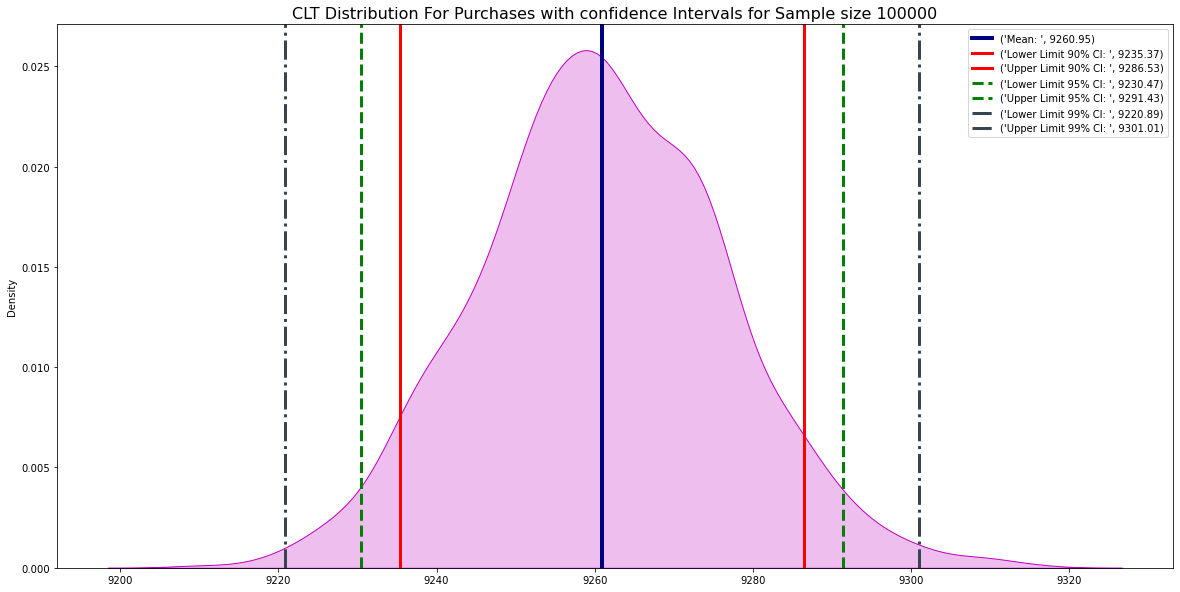


------------------------------------------------------------------------------------------------------------------------


In [ ]:
print('\033[1mPurchase Analysis for Married Customers  \033[0m')
print()
for x in sample_sizeArray:
    plotCofidenceIntervalAll(MarriedData['Purchase'], x)
    print()
    print("------------------------------------------------------------------------------------------------------------------------")

In [ ]:
print('\033[1mPurchase Analysis for Married Customers  \033[0m')
print()
for x in sample_sizeArray:
    CIUsingIQRMethod(MarriedData['Purchase'], x)
    print()
    print("------------------------------------------------------------------------------------------------------------------------")

Purchase Analysis for Married Customers  

90 Percent Confidence Interval for Given data with 50 Sample size is [ 8141.603 10443.364]
95 Percent Confidence Interval for Given data with 50 Sample size is [ 7916.8995 10736.609 ]
99 Percent Confidence Interval for Given data with 50 Sample size is [ 7565.3751 11198.8323]

------------------------------------------------------------------------------------------------------------------------
90 Percent Confidence Interval for Given data with 100 Sample size is [ 8394.428 10060.317]
95 Percent Confidence Interval for Given data with 100 Sample size is [ 8279.2985  10194.76825]
99 Percent Confidence Interval for Given data with 100 Sample size is [ 8013.3299  10525.66185]

------------------------------------------------------------------------------------------------------------------------
90 Percent Confidence Interval for Given data with 500 Sample size is [8908.9742 9632.1276]
95 Percent Confidence Interval for Given data with 500 Sampl

1. As the sample size increases, variance decreases
2. For Married (sample size 100000) range for mean purchase with
  1. confidence interval 90% is [9236.81 , 9286.58]
  2. confidence interval 95% is [9230.14 , 9291.58]
  3. confidence interval 99% is [9218.70 , 9302.14]

In [ ]:
def MarriedUnmarriedPurchaseComparison(sample_size):
    mean1 = []
    for i in range(1000):
        mean1.append(UnmarriedData['Purchase'].sample(sample_size , replace = True).mean())
    sampleMean = np.round(np.mean(mean1), 2)
    alpha90 = (1 - 0.90)/2
    z_cr90 = stats.norm.ppf(1 - alpha90)
    std_dev90 = z_cr90 * np.std(mean1)
    confidence_interval90 = [sampleMean - std_dev90 , sampleMean + std_dev90]
    alpha95 = (1 - 0.95)/2
    z_cr95 = stats.norm.ppf(1 - alpha95)
    std_dev95 = z_cr95 * np.std(mean1)
    confidence_interval95 = [sampleMean - std_dev95 , sampleMean + std_dev95]
    alpha99 = (1 - 0.99)/2
    z_cr99 = stats.norm.ppf(1 - alpha99)
    std_dev99 = z_cr99 * np.std(mean1)
    confidence_interval99 = [sampleMean - std_dev99 , sampleMean + std_dev99]
    plt.figure(figsize=(20,10))
    sns.kdeplot(pd.Series(mean1), color = "#00FFFF", fill = True )
    plt.axvline(sampleMean, label = ("Mean for Unmarried: ", sampleMean), color = "navy", linewidth = 3)
    plt.axvline(confidence_interval90[0], color = "r",linewidth = 2, linestyle = "solid", label =("Lower Limit 90% CI for Unmarried: ", np.round(confidence_interval90[0], 2)))
    plt.axvline(confidence_interval90[1], color = "r", linewidth = 2, linestyle = "solid", label = ("Upper Limit 90% CI for Unmarried: ", np.round(confidence_interval90[1], 2)))
    plt.axvline(confidence_interval95[0], color = "g",linewidth = 2, linestyle = "solid", label =("Lower Limit 95% CI for Unmarried: ", np.round(confidence_interval95[0], 2)))
    plt.axvline(confidence_interval95[1], color = "g", linewidth = 2, linestyle = "solid", label = ("Upper Limit 95% CI for Unmarried: ", np.round(confidence_interval95[1], 2)))
    plt.axvline(confidence_interval99[0], color = "#36454f", linewidth = 2, linestyle = "solid",  label =("Lower Limit 99% CI for Unmarried: ", np.round(confidence_interval99[0], 2)))
    plt.axvline(confidence_interval99[1], color = "#36454f", linewidth = 2, linestyle = "solid", label = ("Upper Limit 99% CI for Unmarried: ", np.round(confidence_interval99[1], 2)))

    mean2 = []
    for i in range(1000):
        mean2.append(MarriedData['Purchase'].sample(sample_size , replace = True).mean())
    sampleMean2 = np.round(np.mean(mean2), 2)
    alpha902 = (1 - 0.90)/2
    z_cr902 = stats.norm.ppf(1 - alpha902)
    std_dev902 = z_cr902 * np.std(mean2)
    confidence_interval902 = [sampleMean2 - std_dev902 , sampleMean2 + std_dev902]
    alpha952 = (1 - 0.95)/2
    z_cr952 = stats.norm.ppf(1 - alpha952)
    std_dev952 = z_cr952 * np.std(mean2)
    confidence_interval952 = [sampleMean2 - std_dev952 , sampleMean2 + std_dev952]
    alpha992 = (1 - 0.99)/2
    z_cr992 = stats.norm.ppf(1 - alpha992)
    std_dev992 = z_cr992 * np.std(mean2)
    confidence_interval992 = [sampleMean2 - std_dev992 , sampleMean2 + std_dev992]
    sns.kdeplot(pd.Series(mean2), color = "g", fill = True )
    plt.axvline(sampleMean2, label = ("Mean for Married: ", sampleMean2), color = "navy", linewidth = 3, linestyle = "--")
    plt.axvline(confidence_interval902[0], color = "r",linewidth = 2, linestyle = "--", label =("Lower Limit 90% CI for Married: ", np.round(confidence_interval902[0], 2)))
    plt.axvline(confidence_interval902[1], color = "r", linewidth = 2, linestyle ="--", label = ("Upper Limit 90% CI for Married: ", np.round(confidence_interval902[1], 2)))
    plt.axvline(confidence_interval952[0], color = "g",linewidth = 2, linestyle = "--", label =("Lower Limit 95% CI for Married: ", np.round(confidence_interval952[0], 2)))
    plt.axvline(confidence_interval952[1], color = "g", linewidth = 2, linestyle ="--", label = ("Upper Limit 95% CI for Married: ", np.round(confidence_interval952[1], 2)))
    plt.axvline(confidence_interval992[0], color = "#36454f",linewidth = 2, linestyle = "--", label =("Lower Limit 99% CI for Married: ", np.round(confidence_interval992[0], 2)))
    plt.axvline(confidence_interval992[1], color = "#36454f", linewidth = 2, linestyle ="--", label = ("Upper Limit 99% CI for Married: ", np.round(confidence_interval992[1], 2)))

    plt.legend(loc = 'best')
    plt.title("Married And Unmarried Comparison for Purchases")
    plt.show()

'CLT Distribution Comaprison for sample size' 50


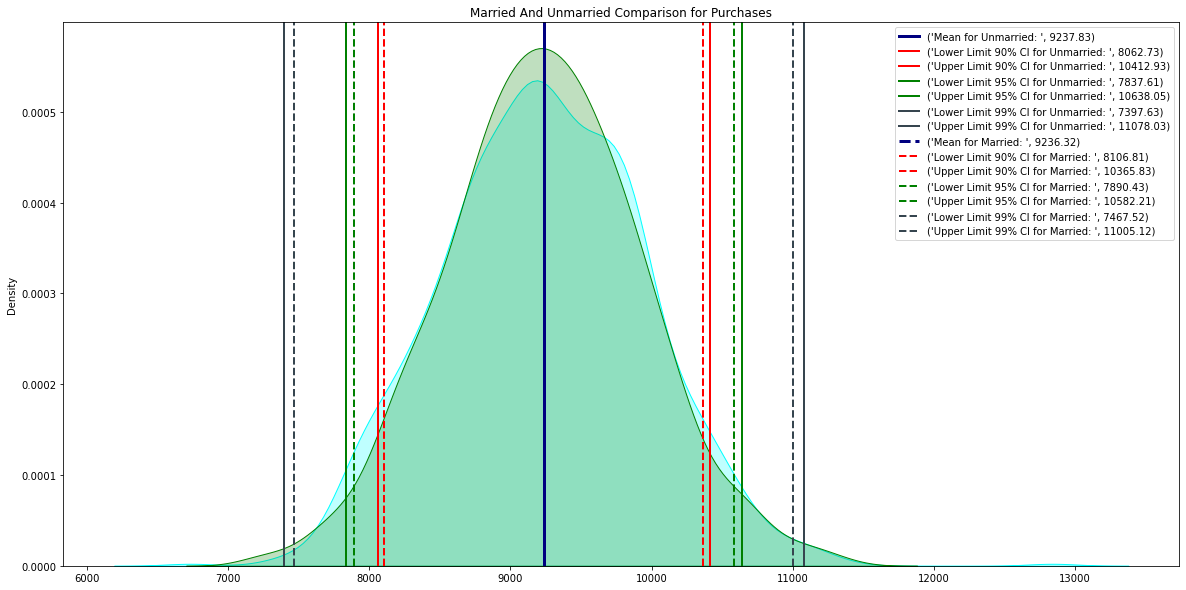

_____________________________________________________________________________________________________________________________
'CLT Distribution Comaprison for sample size' 100


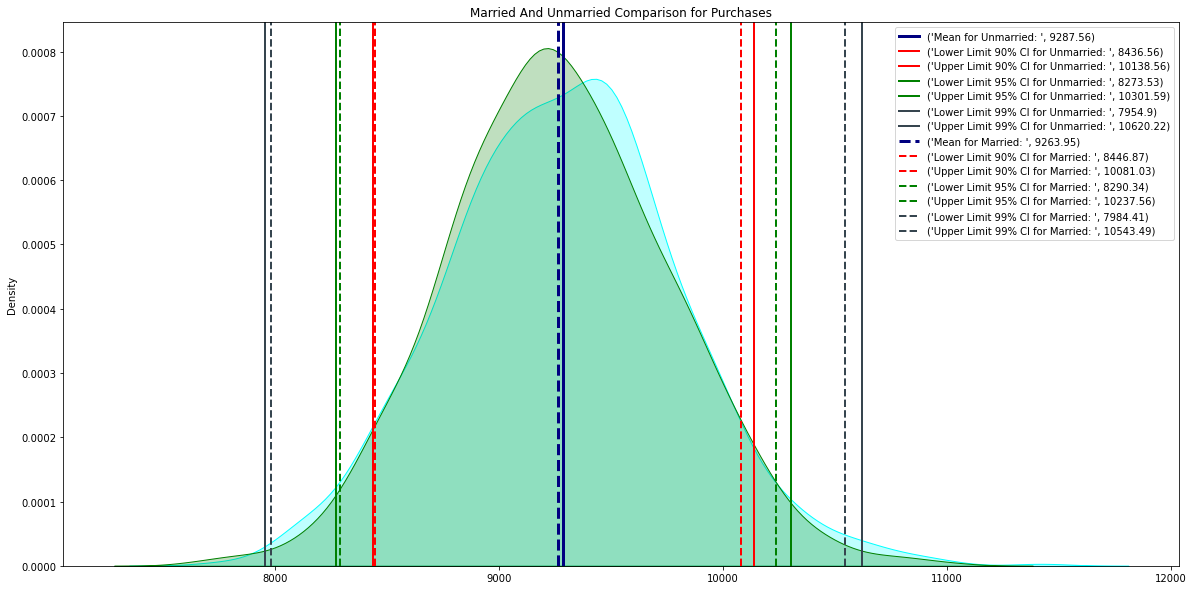

_____________________________________________________________________________________________________________________________
'CLT Distribution Comaprison for sample size' 500


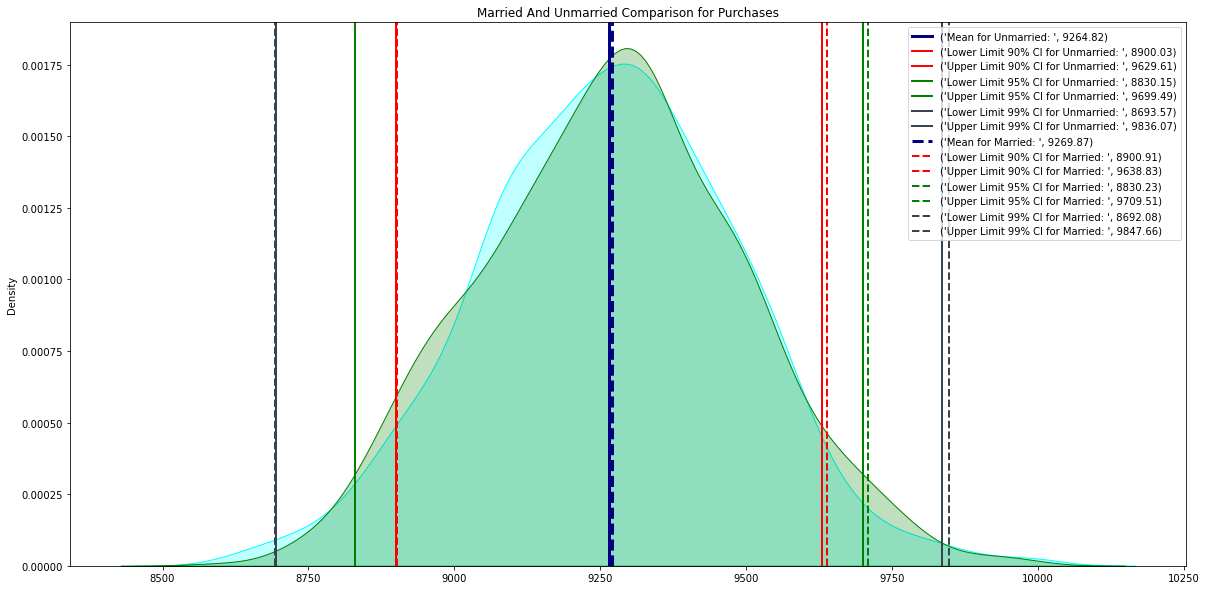

_____________________________________________________________________________________________________________________________
'CLT Distribution Comaprison for sample size' 1000


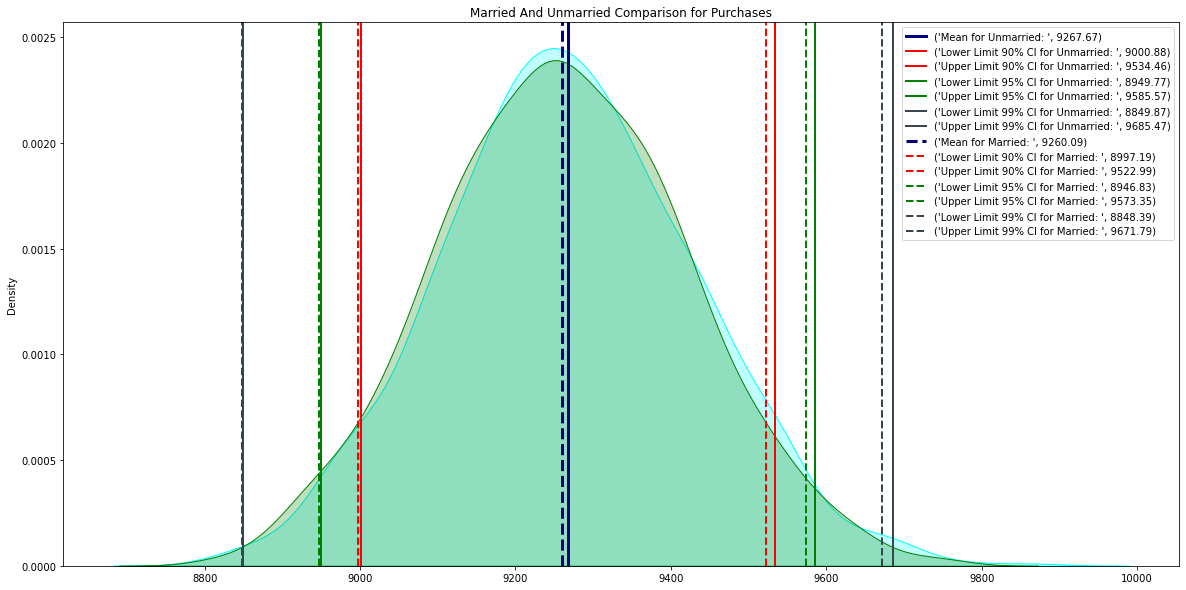

_____________________________________________________________________________________________________________________________
'CLT Distribution Comaprison for sample size' 5000


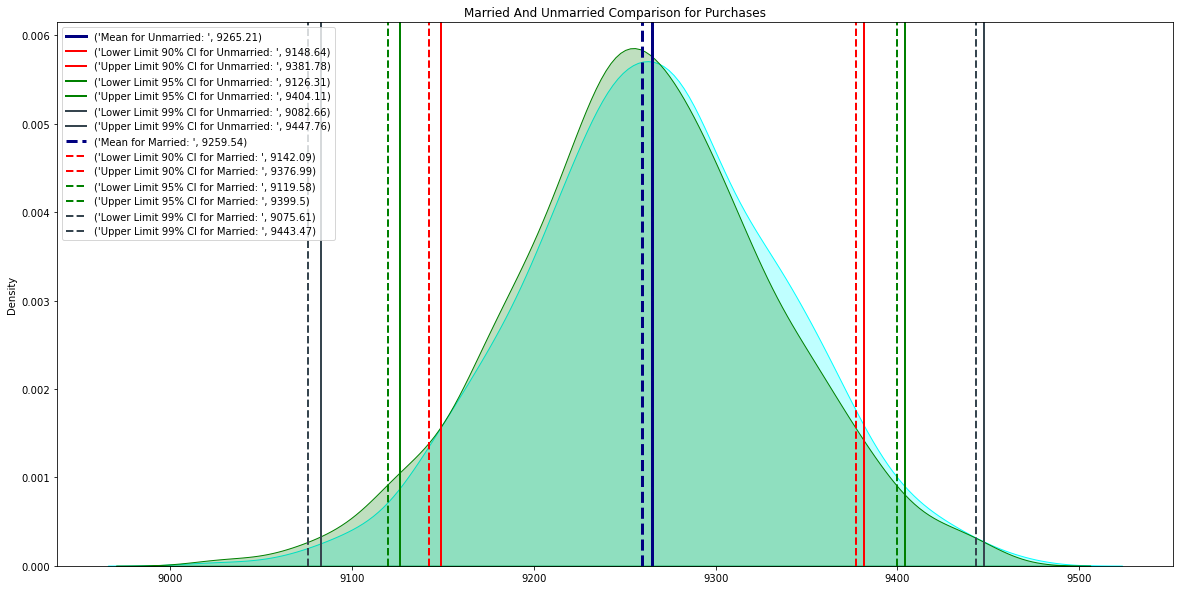

_____________________________________________________________________________________________________________________________
'CLT Distribution Comaprison for sample size' 10000


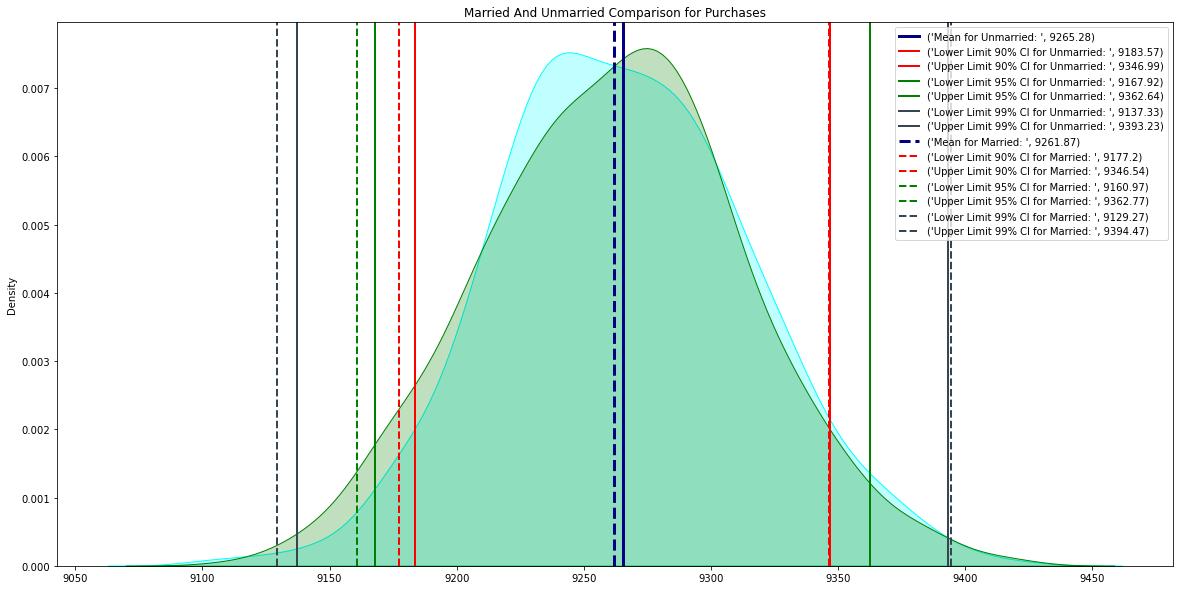

_____________________________________________________________________________________________________________________________
'CLT Distribution Comaprison for sample size' 50000


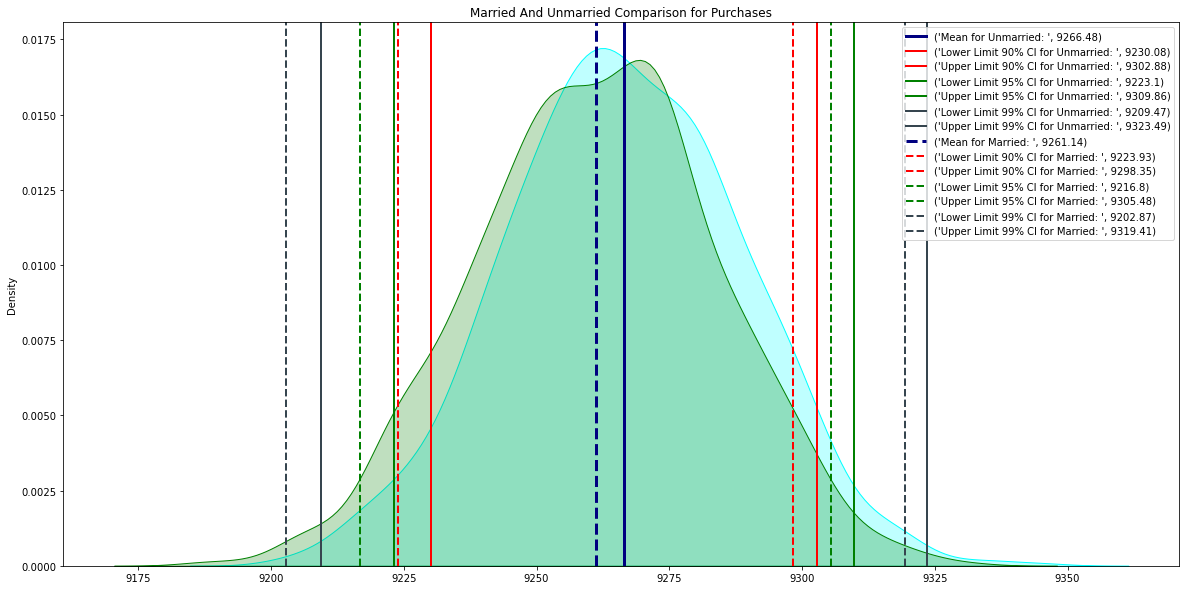

_____________________________________________________________________________________________________________________________
'CLT Distribution Comaprison for sample size' 100000


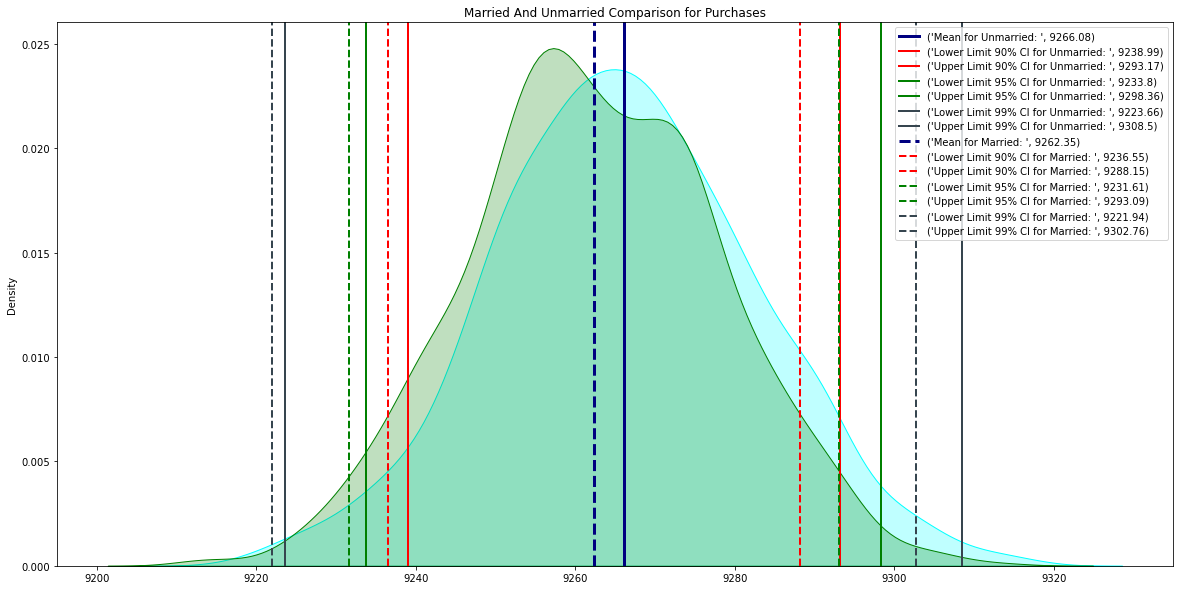

_____________________________________________________________________________________________________________________________


In [ ]:
for x in sample_sizeArray:
    print("\033[1m'CLT Distribution Comaprison for sample size'\033[0m" , x)
    MarriedUnmarriedPurchaseComparison(x)
    print("_____________________________________________________________________________________________________________________________")

There is Overlapping for Single and Married Customers even we increased sample sizes, from which we can conclude that Customer spends same regardless of whether they are single or married.

## Purchase Analysis For Different Age Groups

In [ ]:
data.groupby('Age')['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

In [ ]:
data['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [ ]:
ageGrups = ['0-17', '18-25', '26-35','36-45','46-50','51-55','55+']
samples = [5000, 100000]

In [ ]:
print("\033[1mIQR Analysis for Different Age groups \033[0m")
for age in ageGrups:
    print("\033[1mAge Analysis for Age Group ", age, "\033[0m")
    IQRAnalysis(data[data['Age'] == age]['Purchase'])

IQR Analysis for Different Age groups 
Age Analysis for Age Group  0-17 
Q1:  5328.0
Q3:  11874.0
Mean:  8933.46
Median:  7986.0
Mode:  0    6960
dtype: int64
IQR:  6546.0
Maximum Purchase Excluding Outlier:  21693.0
Minimum Purchase Excluding Outlier:  -4491.0
Age Analysis for Age Group  18-25 
Q1:  5415.0
Q3:  12028.0
Mean:  9169.66
Median:  8027.0
Mode:  0    7010
1    7089
dtype: int64
IQR:  6613.0
Maximum Purchase Excluding Outlier:  21947.5
Minimum Purchase Excluding Outlier:  -4504.5
Age Analysis for Age Group  26-35 
Q1:  5475.0
Q3:  12047.0
Mean:  9252.69
Median:  8030.0
Mode:  0    7167
dtype: int64
IQR:  6572.0
Maximum Purchase Excluding Outlier:  21905.0
Minimum Purchase Excluding Outlier:  -4383.0
Age Analysis for Age Group  36-45 
Q1:  5876.0
Q3:  12107.0
Mean:  9331.35
Median:  8061.0
Mode:  0    6978
1    7012
dtype: int64
IQR:  6231.0
Maximum Purchase Excluding Outlier:  21453.5
Minimum Purchase Excluding Outlier:  -3470.5
Age Analysis for Age Group  46-50 
Q1:  5888.0

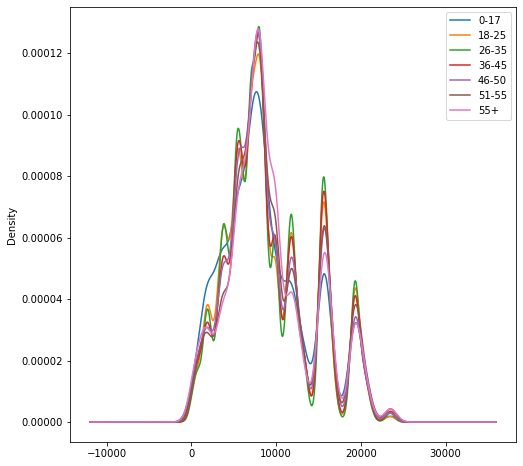

In [ ]:
for age in ageGrups:
    (data[data['Age'] == age]['Purchase']).plot(kind = 'kde', label = age)
    plt.legend()

Purchase Analysis for Different Age Group Customers  

CLT Analysis for Age Group  0-17  and sample size 5000


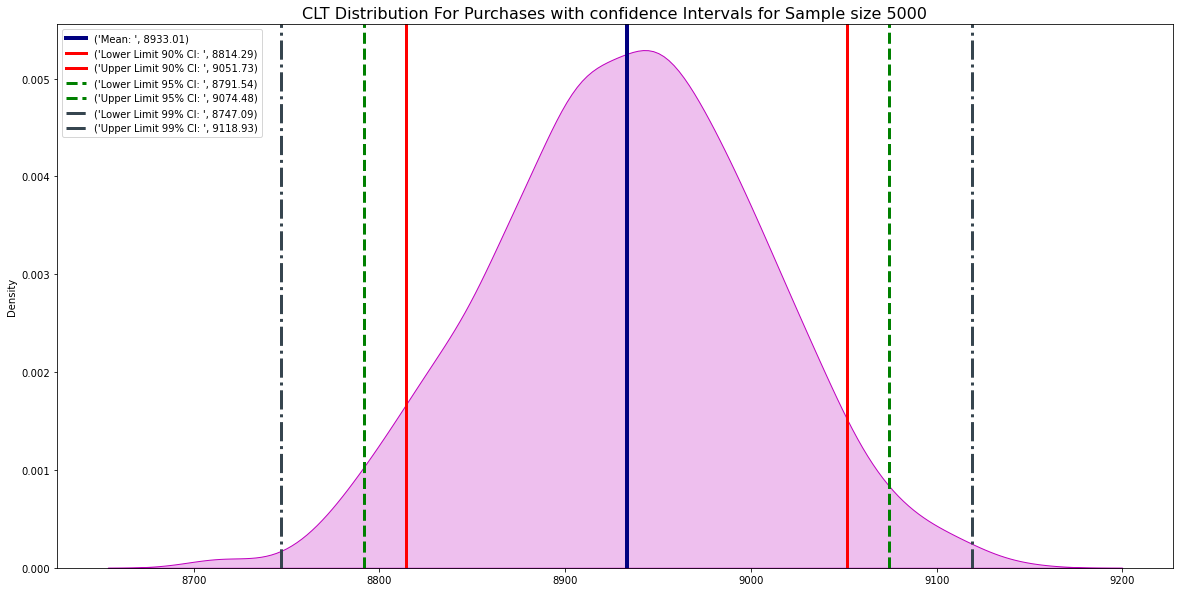

CLT Analysis for Age Group  18-25  and sample size 5000


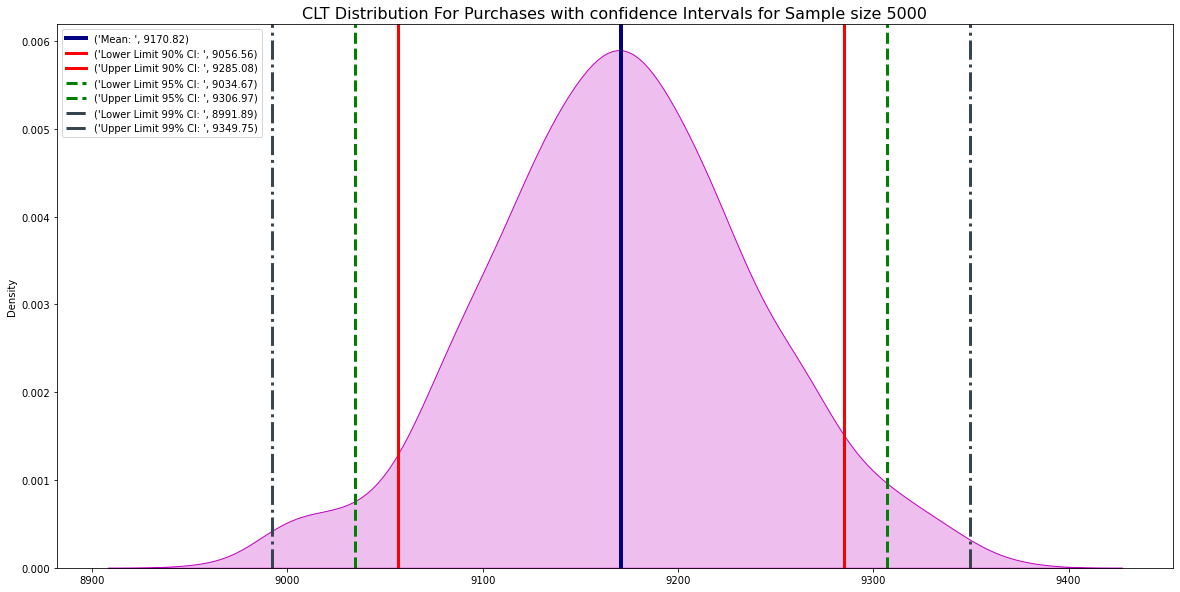

CLT Analysis for Age Group  26-35  and sample size 5000


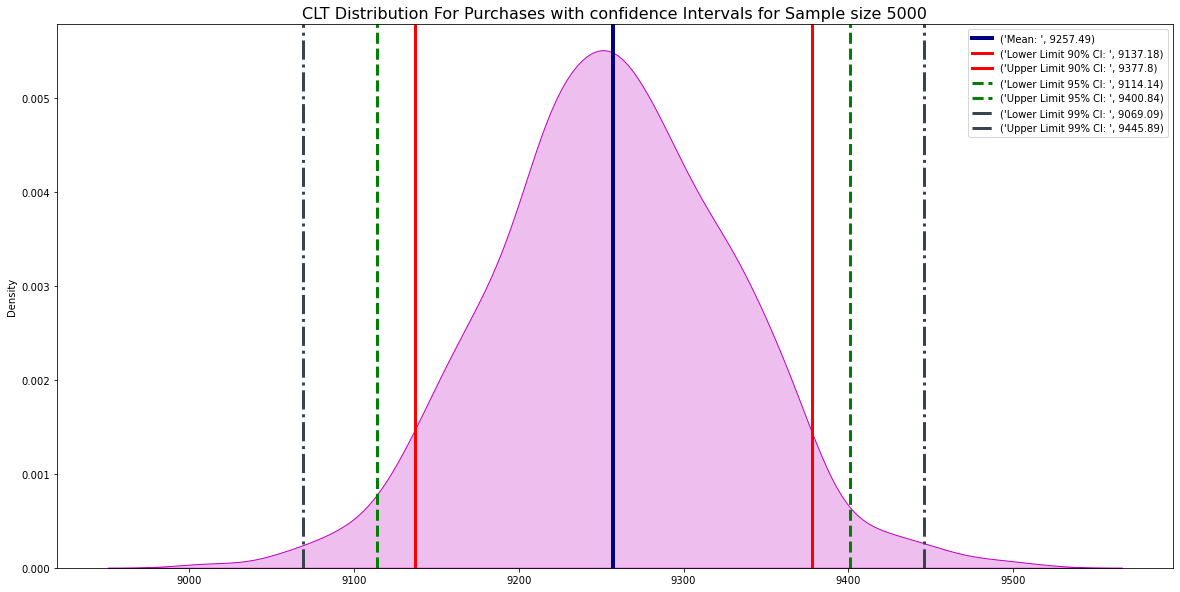

CLT Analysis for Age Group  36-45  and sample size 5000


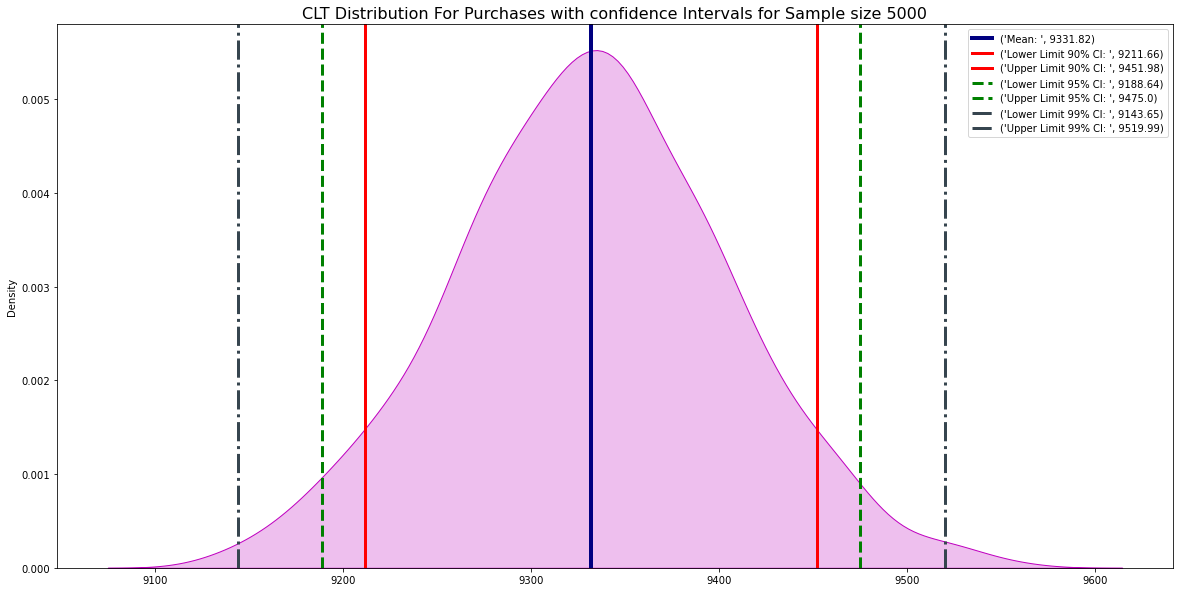

CLT Analysis for Age Group  46-50  and sample size 5000


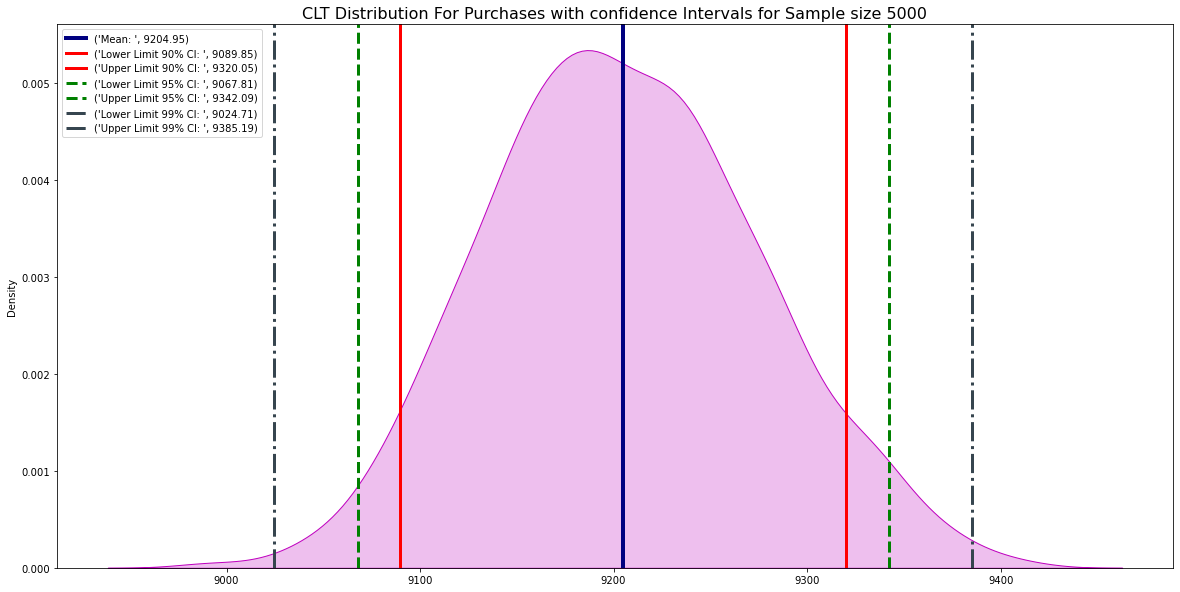

CLT Analysis for Age Group  51-55  and sample size 5000


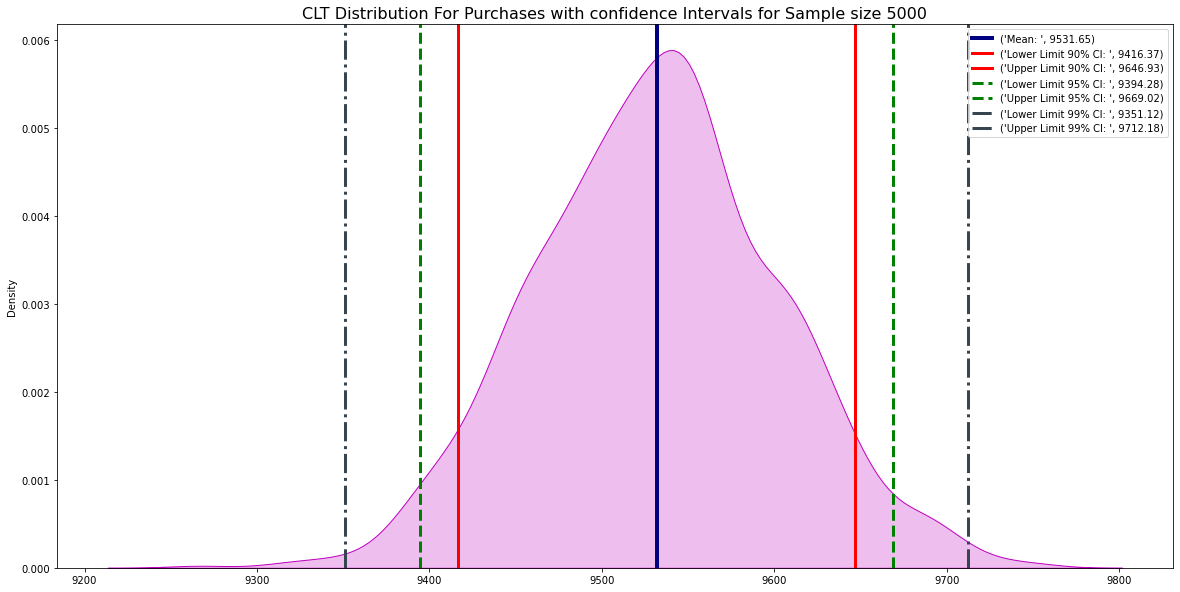

CLT Analysis for Age Group  55+  and sample size 5000


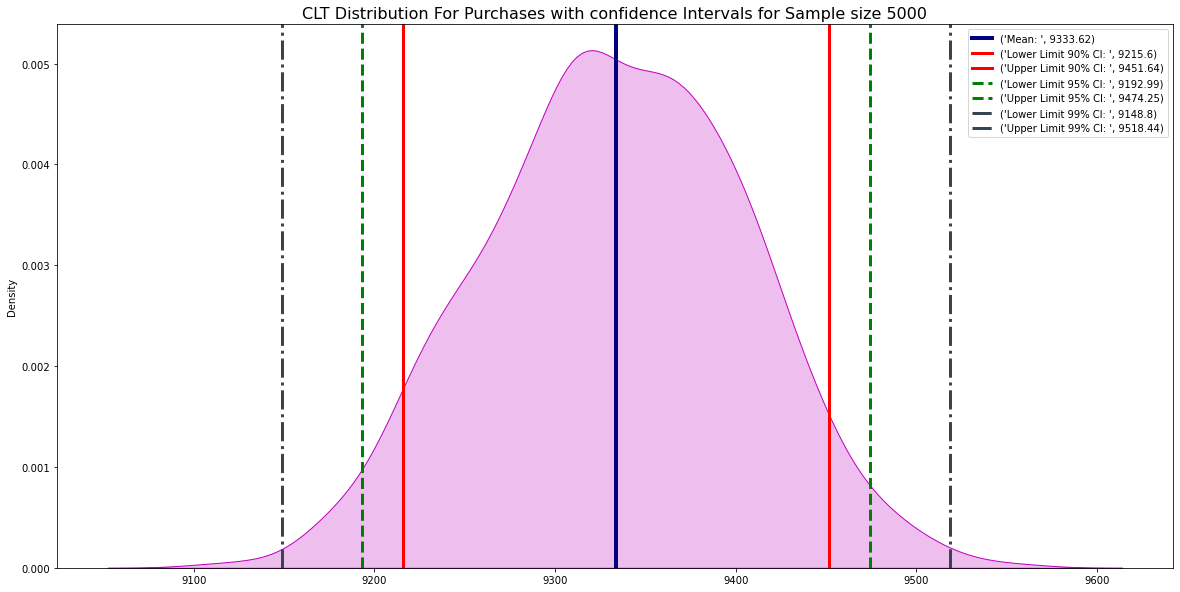

CLT Analysis for Age Group  0-17  and sample size 100000


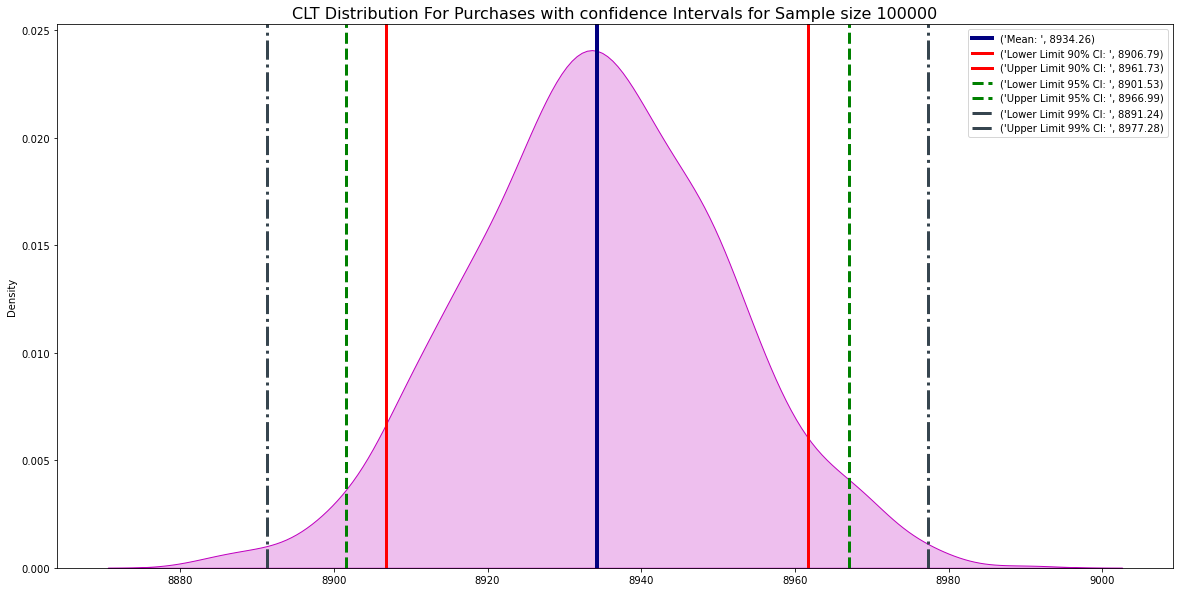

CLT Analysis for Age Group  18-25  and sample size 100000


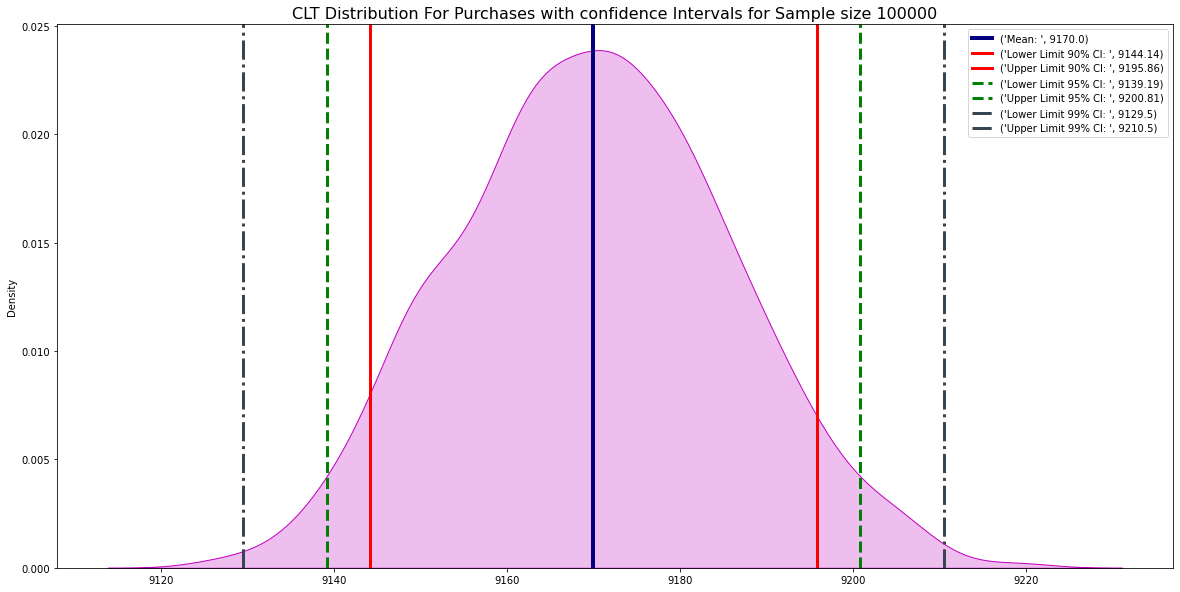

CLT Analysis for Age Group  26-35  and sample size 100000


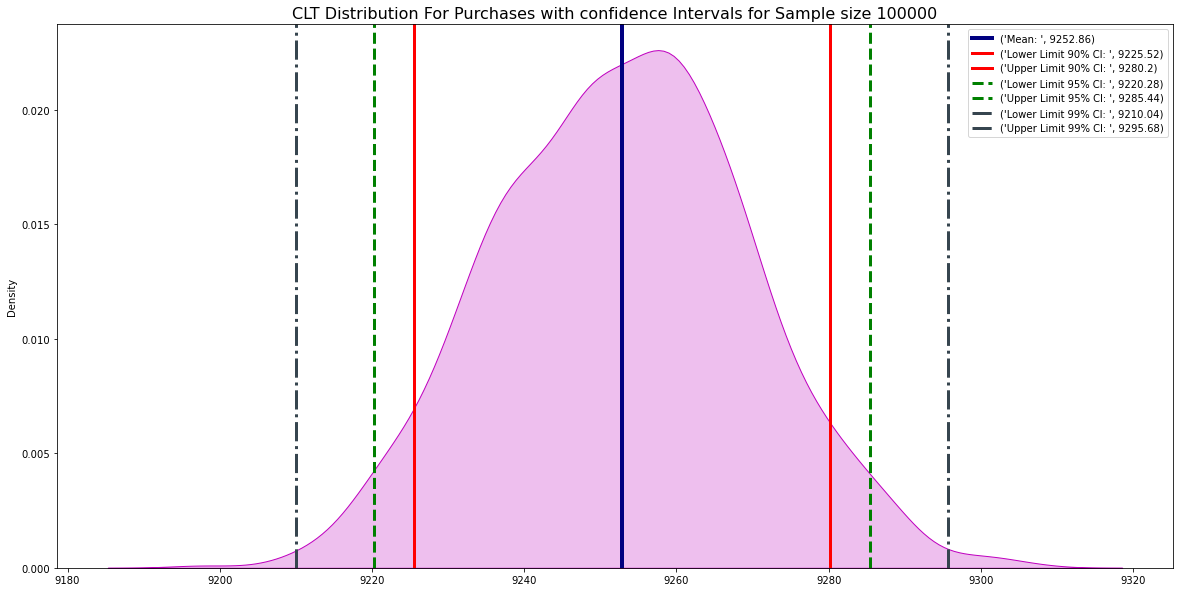

CLT Analysis for Age Group  36-45  and sample size 100000


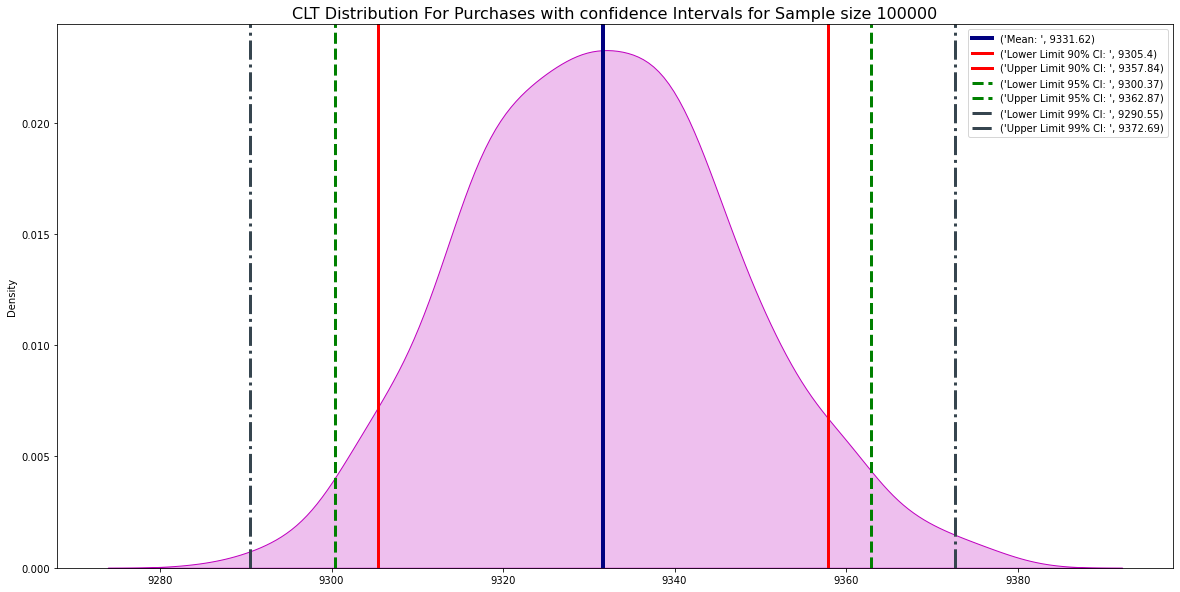

CLT Analysis for Age Group  46-50  and sample size 100000


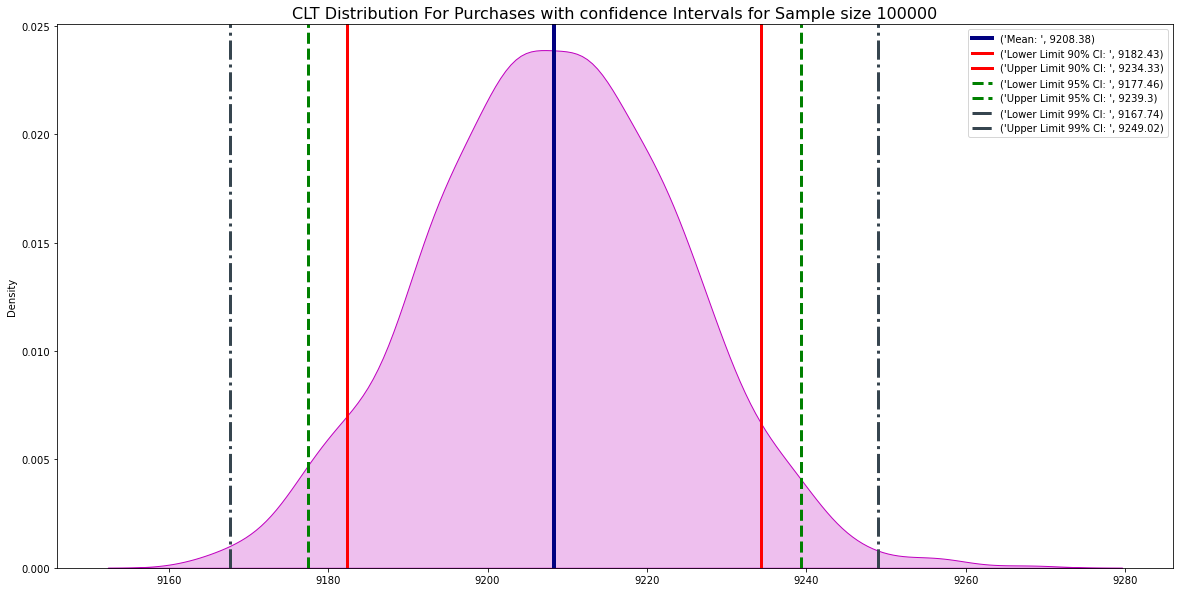

CLT Analysis for Age Group  51-55  and sample size 100000


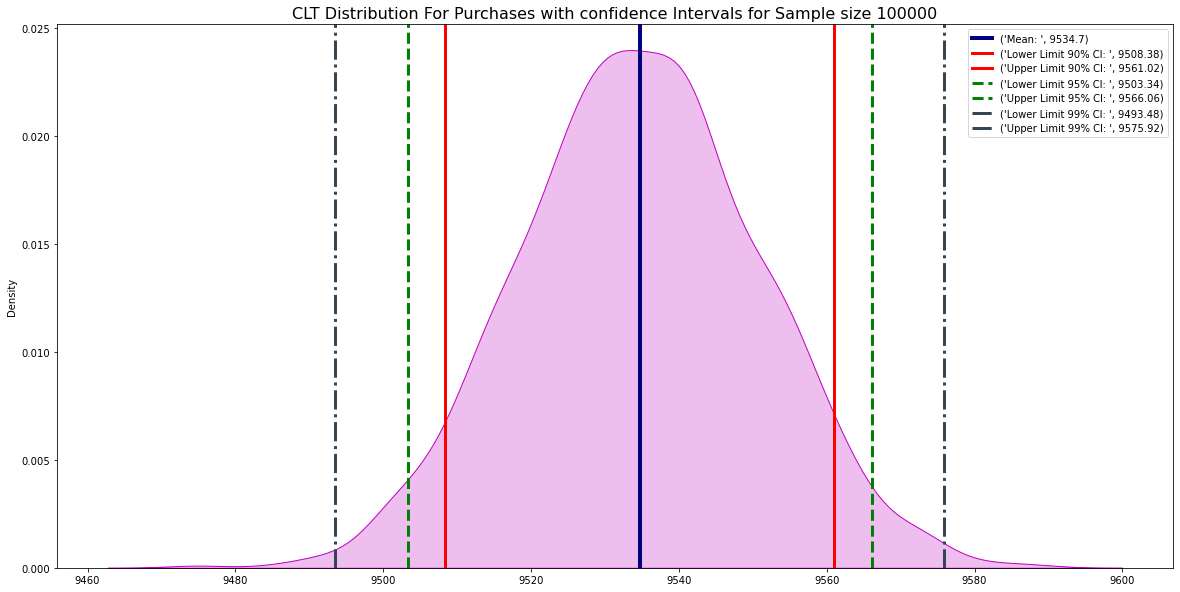

CLT Analysis for Age Group  55+  and sample size 100000


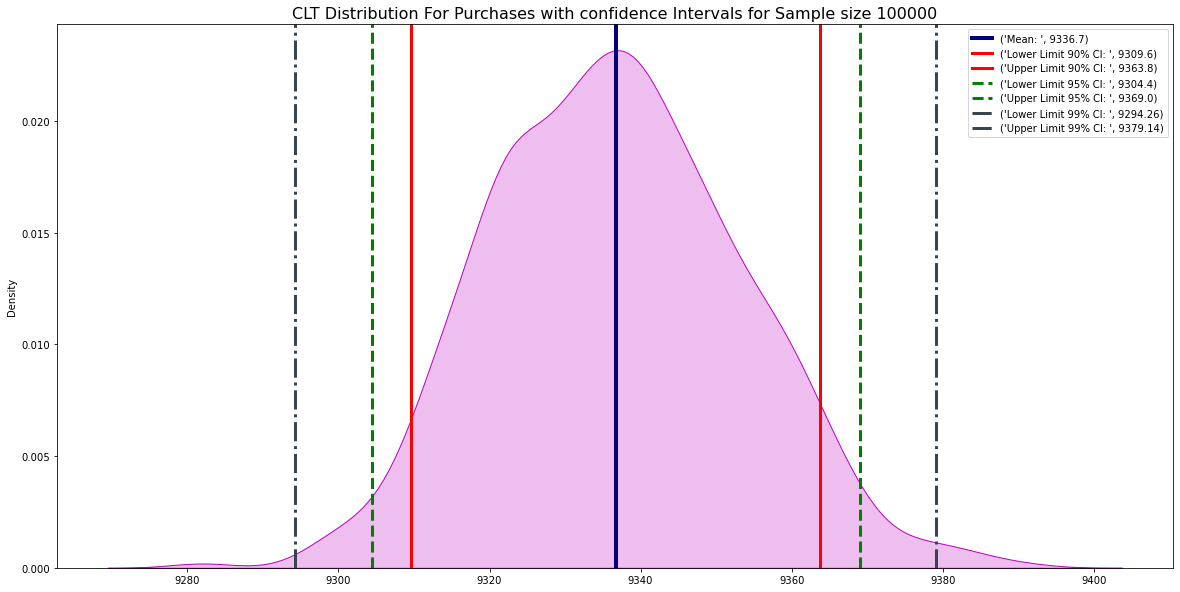

In [ ]:
print('\033[1mPurchase Analysis for Different Age Group Customers  \033[0m')
print()
for x in samples:
    for age in ageGrups:
        print("CLT Analysis for Age Group ", age, " and sample size", x)
        d = data[data['Age'] == age]['Purchase']
        plotCofidenceIntervalAll(d, x)



In [ ]:
print('\033[1mPurchase Analysis for Different Age Group Customers  \033[0m')
print()
ageGrups = ['0-17', '18-25', '26-35','36-45','46-50','51-55','55+']
samples = [5000, 100000]
for x in samples:
    for age in ageGrups:
        print("CLT Analysis for Age Group ", age)
        CIUsingIQRMethod(data[data['Age'] == age]['Purchase'], x)
        print()
        print("------------------------------------------------------------------------------------------------------------------------")

Purchase Analysis for Different Age Group Customers  

CLT Analysis for Age Group  0-17
90 Percent Confidence Interval for Given data with 5000 Sample size is [8807.7997  9043.22184]
95 Percent Confidence Interval for Given data with 5000 Sample size is [8791.168525 9080.292045]
99 Percent Confidence Interval for Given data with 5000 Sample size is [8745.719938 9127.712064]

------------------------------------------------------------------------------------------------------------------------
CLT Analysis for Age Group  18-25
90 Percent Confidence Interval for Given data with 5000 Sample size is [9054.54109 9286.60129]
95 Percent Confidence Interval for Given data with 5000 Sample size is [9033.28691 9306.76552]
99 Percent Confidence Interval for Given data with 5000 Sample size is [8997.287823 9334.816171]

------------------------------------------------------------------------------------------------------------------------
CLT Analysis for Age Group  26-35
90 Percent Confidence In

CLT Analysis for Age Group  0-17
90 Percent Confidence Interval for Given data with 100000 Sample size is [8906.11 8959.59],
95 Percent Confidence Interval for Given data with 100000 Sample size is [8900.54 , 8964.22],
99 Percent Confidence Interval for Given data with 100000 Sample size is [8892.07 ,  8972.85]

------------------------------------------------------------------------------------------------------------------------
CLT Analysis for Age Group  18-25
90 Percent Confidence Interval for Given data with 100000 Sample size is [9142.49 ,  9196.74],
95 Percent Confidence Interval for Given data with 100000 Sample size is [9137.54 ,  9200.32],
99 Percent Confidence Interval for Given data with 100000 Sample size is [9128.01 , 9208.02]

------------------------------------------------------------------------------------------------------------------------
CLT Analysis for Age Group  26-35
90 Percent Confidence Interval for Given data with 100000 Sample size is [9228.84 , 9278.20],
95 Percent Confidence Interval for Given data with 100000 Sample size is [9223.51 , 9283.08],
99 Percent Confidence Interval for Given data with 100000 Sample size is [9215.27 , 9291.96]

------------------------------------------------------------------------------------------------------------------------
CLT Analysis for Age Group  36-45
90 Percent Confidence Interval for Given data with 100000 Sample size is [9304.17 , 9356.82],
95 Percent Confidence Interval for Given data with 100000 Sample size is [9299.88,  9363.24],
99 Percent Confidence Interval for Given data with 100000 Sample size is [9288.67 , 9372.78]

------------------------------------------------------------------------------------------------------------------------
CLT Analysis for Age Group  46-50
90 Percent Confidence Interval for Given data with 100000 Sample size is [9184.08 , 9235.06],
95 Percent Confidence Interval for Given data with 100000 Sample size is [9179.02 , 9240.48 ],
99 Percent Confidence Interval for Given data with 100000 Sample size is [9166.15 , 9247.72]

------------------------------------------------------------------------------------------------------------------------
CLT Analysis for Age Group  51-55
90 Percent Confidence Interval for Given data with 100000 Sample size is [9506.65 , 9559.91],
95 Percent Confidence Interval for Given data with 100000 Sample size is [9500.38 , 9565.90],
99 Percent Confidence Interval for Given data with 100000 Sample size is [9493.06 , 9573.97]

------------------------------------------------------------------------------------------------------------------------
CLT Analysis for Age Group  55+
90 Percent Confidence Interval for Given data with 100000 Sample size is [9310.93 , 9362.84],
95 Percent Confidence Interval for Given data with 100000 Sample size is [9306.29 , 9368.47],
99 Percent Confidence Interval for Given data with 100000 Sample size is [9299.49 , 9378.46]

Spending by Age_group 0-17 is low compared to other age groups.
For others it shows to be overlapping

# Reccomendations

1. From the observations female customers spend less than males on average, so Walmart need to give attention on increasing sale from female customers. They can run campaigns for female customers, can give special discounts for them and also Provide some offers which gives free gifts.
2. Maximum Purchases are from Type C city category, to increase sales in other city Categories A and B management can offer Services like one day delivery, Less delivery charges or build Subscription models in order to increase sales.
3. Spending by Age_group 0-17 is low compared to other age groups. For others it shows to be overlapping, walmart can increase this sales by different offers for kids.